# **Supply Chain Analysis**

![](https://www.rfgen.com/wp-content/uploads/2021/01/supply-chain-hero-banner-masthead.jpg)

# **About Dataset**

A DataSet of Supply Chains used by the company DataCo Global was used for the analysis. Dataset of Supply Chain , which allows the use of Machine Learning Algorithms and R Software.
Areas of important registered activities : Provisioning , Production , Sales , Commercial Distribution.It also allows the correlation of Structured Data with Unstructured Data for knowledge generation.

Type Data :
Structured Data : DataCoSupplyChainDataset.csv
Unstructured Data : tokenized_access_logs.csv (Clickstream)

Types of Products : Clothing , Sports , and Electronic Supplies

Additionally it is attached in another file called DescriptionDataCoSupplyChain.csv, the description of each of the variables of the DataCoSupplyChainDatasetc.csv.

# **Initial Exploration**

We'll begin by loading the necessary libraries and examining the structure of the dataset to identify important variables and check for missing values.

## **What we need to know:**
- Understand the overall structure of the data.
- Identify any missing values and address them.
- Explore basic statistical summaries of numeric and categorical variables.

In [60]:
# Install necessary packages if not already installed
install.packages(c("tidyverse", "skimr", "corrplot", "maps", "ggmap"))
install.packages("gridExtra")
install.packages("plotly")


# Load libraries
library(tidyverse)  # For data manipulation and visualization
library(skimr)      # For quick summary statistics
library(corrplot)   # For correlation matrix
library(scales)  # Load scales package for number formatting
library(plotly)


options(repr.plot.width = 16, repr.plot.height = 12)
options(warn=-1)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [61]:
FILL_COLOR <- "#1E3E62"

In [62]:
data <- read.csv('/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv')

In [63]:
glimpse(data)

Rows: 180,519
Columns: 53
$ Type                          <chr> "DEBIT", "TRANSFER", "CASH", "DEBIT", "P…
$ Days.for.shipping..real.      <int> 3, 5, 4, 3, 2, 6, 2, 2, 3, 2, 6, 5, 4, 2…
$ Days.for.shipment..scheduled. <int> 4, 4, 4, 4, 4, 4, 1, 1, 2, 1, 2, 2, 2, 1…
$ Benefit.per.order             <dbl> 91.25, -249.09, -247.78, 22.86, 134.21, …
$ Sales.per.customer            <dbl> 314.64, 311.36, 309.72, 304.81, 298.25, …
$ Delivery.Status               <chr> "Advance shipping", "Late delivery", "Sh…
$ Late_delivery_risk            <int> 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1…
$ Category.Id                   <int> 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, …
$ Category.Name                 <chr> "Sporting Goods", "Sporting Goods", "Spo…
$ Customer.City                 <chr> "Caguas", "Caguas", "San Jose", "Los Ang…
$ Customer.Country              <chr> "Puerto Rico", "Puerto Rico", "EE. UU.",…
$ Customer.Email                <chr> "XXXXXXXXX", "XXXXXXXXX", "XXXXXXXXX", "…
$ Customer.Fna

In [64]:
df = tibble(data)

In [65]:
head(df)

Type     Days.for.shipping..real. Days.for.shipment..scheduled.
1 DEBIT    3                        4                            
2 TRANSFER 5                        4                            
3 CASH     4                        4                            
4 DEBIT    3                        4                            
5 PAYMENT  2                        4                            
6 TRANSFER 6                        4                            
  Benefit.per.order Sales.per.customer Delivery.Status   Late_delivery_risk
1   91.25           314.64             Advance shipping  0                 
2 -249.09           311.36             Late delivery     1                 
3 -247.78           309.72             Shipping on time  0                 
4   22.86           304.81             Advance shipping  0                 
5  134.21           298.25             Advance shipping  0                 
6   18.58           294.98             Shipping canceled 0                 
  Category.Id Category.Name  Customer.City ⋯ Order.Zipcode Product.Card.Id
1 73          Sporting Goods Caguas        ⋯ NA            1360           
2 73          Sporting Goods Caguas        ⋯ NA            1360           
3 73          Sporting Goods San Jose      ⋯ NA            1360           
4 73          Sporting Goods Los Angeles   ⋯ NA            1360           
5 73          Sporting Goods Caguas        ⋯ NA            1360           
6 73          Sporting Goods Tonawanda     ⋯ NA            1360           
  Product.Category.Id Product.Description
1 73                  NA                 
2 73                  NA                 
3 73                  NA                 
4 73                  NA                 
5 73                  NA                 
6 73                  NA                 
  Product.Image                                Product.Name Product.Price
1 http://images.acmesports.sports/Smart+watch  Smart watch  327.75       
2 http://images.acmesports.sports/Smart+watch  Smart watch  327.75       
3 http://images.acmesports.sports/Smart+watch  Smart watch  327.75       
4 http://images.acmesports.sports/Smart+watch  Smart watch  327.75       
5 http://images.acmesports.sports/Smart+watch  Smart watch  327.75       
6 http://images.acmesports.sports/Smart+watch  Smart watch  327.75       
  Product.Status shipping.date..DateOrders. Shipping.Mode 
1 0              2/3/2018 22:56             Standard Class
2 0              1/18/2018 12:27            Standard Class
3 0              1/17/2018 12:06            Standard Class
4 0              1/16/2018 11:45            Standard Class
5 0              1/15/2018 11:24            Standard Class
6 0              1/19/2018 11:03            Standard Class

In [66]:
summary(df)

     Type           Days.for.shipping..real. Days.for.shipment..scheduled.
 Length:180519      Min.   :0.000            Min.   :0.000                
 Class :character   1st Qu.:2.000            1st Qu.:2.000                
 Mode  :character   Median :3.000            Median :4.000                
                    Mean   :3.498            Mean   :2.932                
                    3rd Qu.:5.000            3rd Qu.:4.000                
                    Max.   :6.000            Max.   :4.000                
                                                                          
 Benefit.per.order  Sales.per.customer Delivery.Status    Late_delivery_risk
 Min.   :-4274.98   Min.   :   7.49    Length:180519      Min.   :0.0000    
 1st Qu.:    7.00   1st Qu.: 104.38    Class :character   1st Qu.:0.0000    
 Median :   31.52   Median : 163.99    Mode  :character   Median :1.0000    
 Mean   :   21.98   Mean   : 183.11                       Mean   :0.5483    
 3rd Qu.:   64.

In [67]:
# Check for Missing Values
colSums(is.na(df))

Type      Days.for.shipping..real. 
                            0                             0 
Days.for.shipment..scheduled.             Benefit.per.order 
                            0                             0 
           Sales.per.customer               Delivery.Status 
                            0                             0 
           Late_delivery_risk                   Category.Id 
                            0                             0 
                Category.Name                 Customer.City 
                            0                             0 
             Customer.Country                Customer.Email 
                            0                             0 
               Customer.Fname                   Customer.Id 
                            0                             0 
               Customer.Lname             Customer.Password 
                            0                             0 
             Customer.Segment                Customer.State 
                            0                             0 
              Customer.Street              Customer.Zipcode 
                            0                             3 
                Department.Id               Department.Name 
                            0                             0 
                     Latitude                     Longitude 
                            0                             0 
                       Market                    Order.City 
                            0                             0 
                Order.Country             Order.Customer.Id 
                            0                             0 
      order.date..DateOrders.                      Order.Id 
                            0                             0 
       Order.Item.Cardprod.Id           Order.Item.Discount 
                            0                             0 
     Order.Item.Discount.Rate                 Order.Item.Id 
                            0                             0 
     Order.Item.Product.Price       Order.Item.Profit.Ratio 
                            0                             0 
          Order.Item.Quantity                         Sales 
                            0                             0 
             Order.Item.Total        Order.Profit.Per.Order 
                            0                             0 
                 Order.Region                   Order.State 
                            0                             0 
                 Order.Status                 Order.Zipcode 
                            0                        155679 
              Product.Card.Id           Product.Category.Id 
                            0                             0 
          Product.Description                 Product.Image 
                       180519                             0 
                 Product.Name                 Product.Price 
                            0                             0 
               Product.Status    shipping.date..DateOrders. 
                            0                             0 
                Shipping.Mode 
                            0

Note: I will remove useless columns and also there are some similar cols so I will remove them. I discovered them in the correlation map.

In [68]:
print(sum(df$Order.Profit.Per.Order == df$Benefit.per.order))
print(sum(df$Sales == df$Product.Price))
print(sum(df$Order.Item.Product.Price == df$Product.Price))
print(sum(df$Sales.per.customer == df$Order.Item.Total))
print(sum(df$Sales.per.customer == df$Product.Price))

# you can also use cor()
cor(df$Order.Profit.Per.Order, df$Benefit.per.order)
cor(df$Sales, df$Product.Price)

[1] 180519
[1] 99134
[1] 180519
[1] 180519
[1] 5486


[1] 1

[1] 0.7899482

In [69]:
# Remove unwanted columns
df <- df |>
  select(-Customer.Email, 
         -Customer.Password, 
         -Product.Image, 
         -Category.Id, 
         -Customer.Fname, 
         -Customer.Lname, 
         -Customer.Zipcode, 
         -Department.Id, 
         -Order.Customer.Id,
         -Customer.Id,
         -Order.Id, 
         -Order.Item.Cardprod.Id, 
         -Order.Item.Id, 
         -Order.Zipcode, 
         -Product.Card.Id, 
         -Product.Category.Id, 
         -Product.Description,
         -Order.Item.Product.Price,
         -Order.Item.Total,
         -Benefit.per.order)

In [70]:
glimpse(df)

Rows: 180,519
Columns: 33
$ Type                          <chr> "DEBIT", "TRANSFER", "CASH", "DEBIT", "P…
$ Days.for.shipping..real.      <int> 3, 5, 4, 3, 2, 6, 2, 2, 3, 2, 6, 5, 4, 2…
$ Days.for.shipment..scheduled. <int> 4, 4, 4, 4, 4, 4, 1, 1, 2, 1, 2, 2, 2, 1…
$ Sales.per.customer            <dbl> 314.64, 311.36, 309.72, 304.81, 298.25, …
$ Delivery.Status               <chr> "Advance shipping", "Late delivery", "Sh…
$ Late_delivery_risk            <int> 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1…
$ Category.Name                 <chr> "Sporting Goods", "Sporting Goods", "Spo…
$ Customer.City                 <chr> "Caguas", "Caguas", "San Jose", "Los Ang…
$ Customer.Country              <chr> "Puerto Rico", "Puerto Rico", "EE. UU.",…
$ Customer.Segment              <chr> "Consumer", "Consumer", "Consumer", "Hom…
$ Customer.State                <chr> "PR", "PR", "CA", "CA", "PR", "NY", "PR"…
$ Customer.Street               <chr> "5365 Noble Nectar Island", "2679 Rustic…
$ Department.N

In [71]:
colSums(is.na(df))

Type      Days.for.shipping..real. 
                            0                             0 
Days.for.shipment..scheduled.            Sales.per.customer 
                            0                             0 
              Delivery.Status            Late_delivery_risk 
                            0                             0 
                Category.Name                 Customer.City 
                            0                             0 
             Customer.Country              Customer.Segment 
                            0                             0 
               Customer.State               Customer.Street 
                            0                             0 
              Department.Name                      Latitude 
                            0                             0 
                    Longitude                        Market 
                            0                             0 
                   Order.City                 Order.Country 
                            0                             0 
      order.date..DateOrders.           Order.Item.Discount 
                            0                             0 
     Order.Item.Discount.Rate       Order.Item.Profit.Ratio 
                            0                             0 
          Order.Item.Quantity                         Sales 
                            0                             0 
       Order.Profit.Per.Order                  Order.Region 
                            0                             0 
                  Order.State                  Order.Status 
                            0                             0 
                 Product.Name                 Product.Price 
                            0                             0 
               Product.Status    shipping.date..DateOrders. 
                            0                             0 
                Shipping.Mode 
                            0

In [72]:
# Removing duplicates if any
df <- distinct(df)

# **Date Conversion and Shipping Duration**

We'll now convert the order.date..DateOrders. and shipping.date..DateOrders. into proper date formats and calculate the shipping duration to explore delivery trends.

## **What we need to know:**
- How long does it take to ship an order?
- Explore any delay patterns in shipping compared to the scheduled time.

### **Summary:**
- Date columns have been converted for analysis.
- Shipping duration is now calculated for further exploration.

In [73]:
# Convert date columns and calculate shipping duration
df$order_date <- mdy_hms(df$order.date..DateOrders.)
df$shipping_date <- mdy_hms(df$shipping.date..DateOrders.)

# Calculate shipping duration
df$shipping_duration <- as.numeric(difftime(df$shipping_date, df$order_date, units = "days"))

# Convert Product.Status to a factor for better labeling in the plot
df$Product.Status <- factor(df$Product.Status, levels = c(0, 1), labels = c("Available", "Not Available"))

In [74]:
# Remove unwanted columns
df <- df |>
  select(-order.date..DateOrders., -shipping.date..DateOrders.)

# **Exploring Categorical Variables**

We will analyze the distribution of important categorical variables like **Type**, **Delivery.Status**, and **Shipping.Mode** to understand the nature of the transactions and deliveries.

## **What we need to know:**
- What types of transactions are most common?
- What are the most frequent delivery statuses and shipping modes?

### **Summary:**
- Most transactions are of type "DEBIT".
- Delivery status is mostly in "Late delivery."
- "Standard Class" is the most common shipping mode.

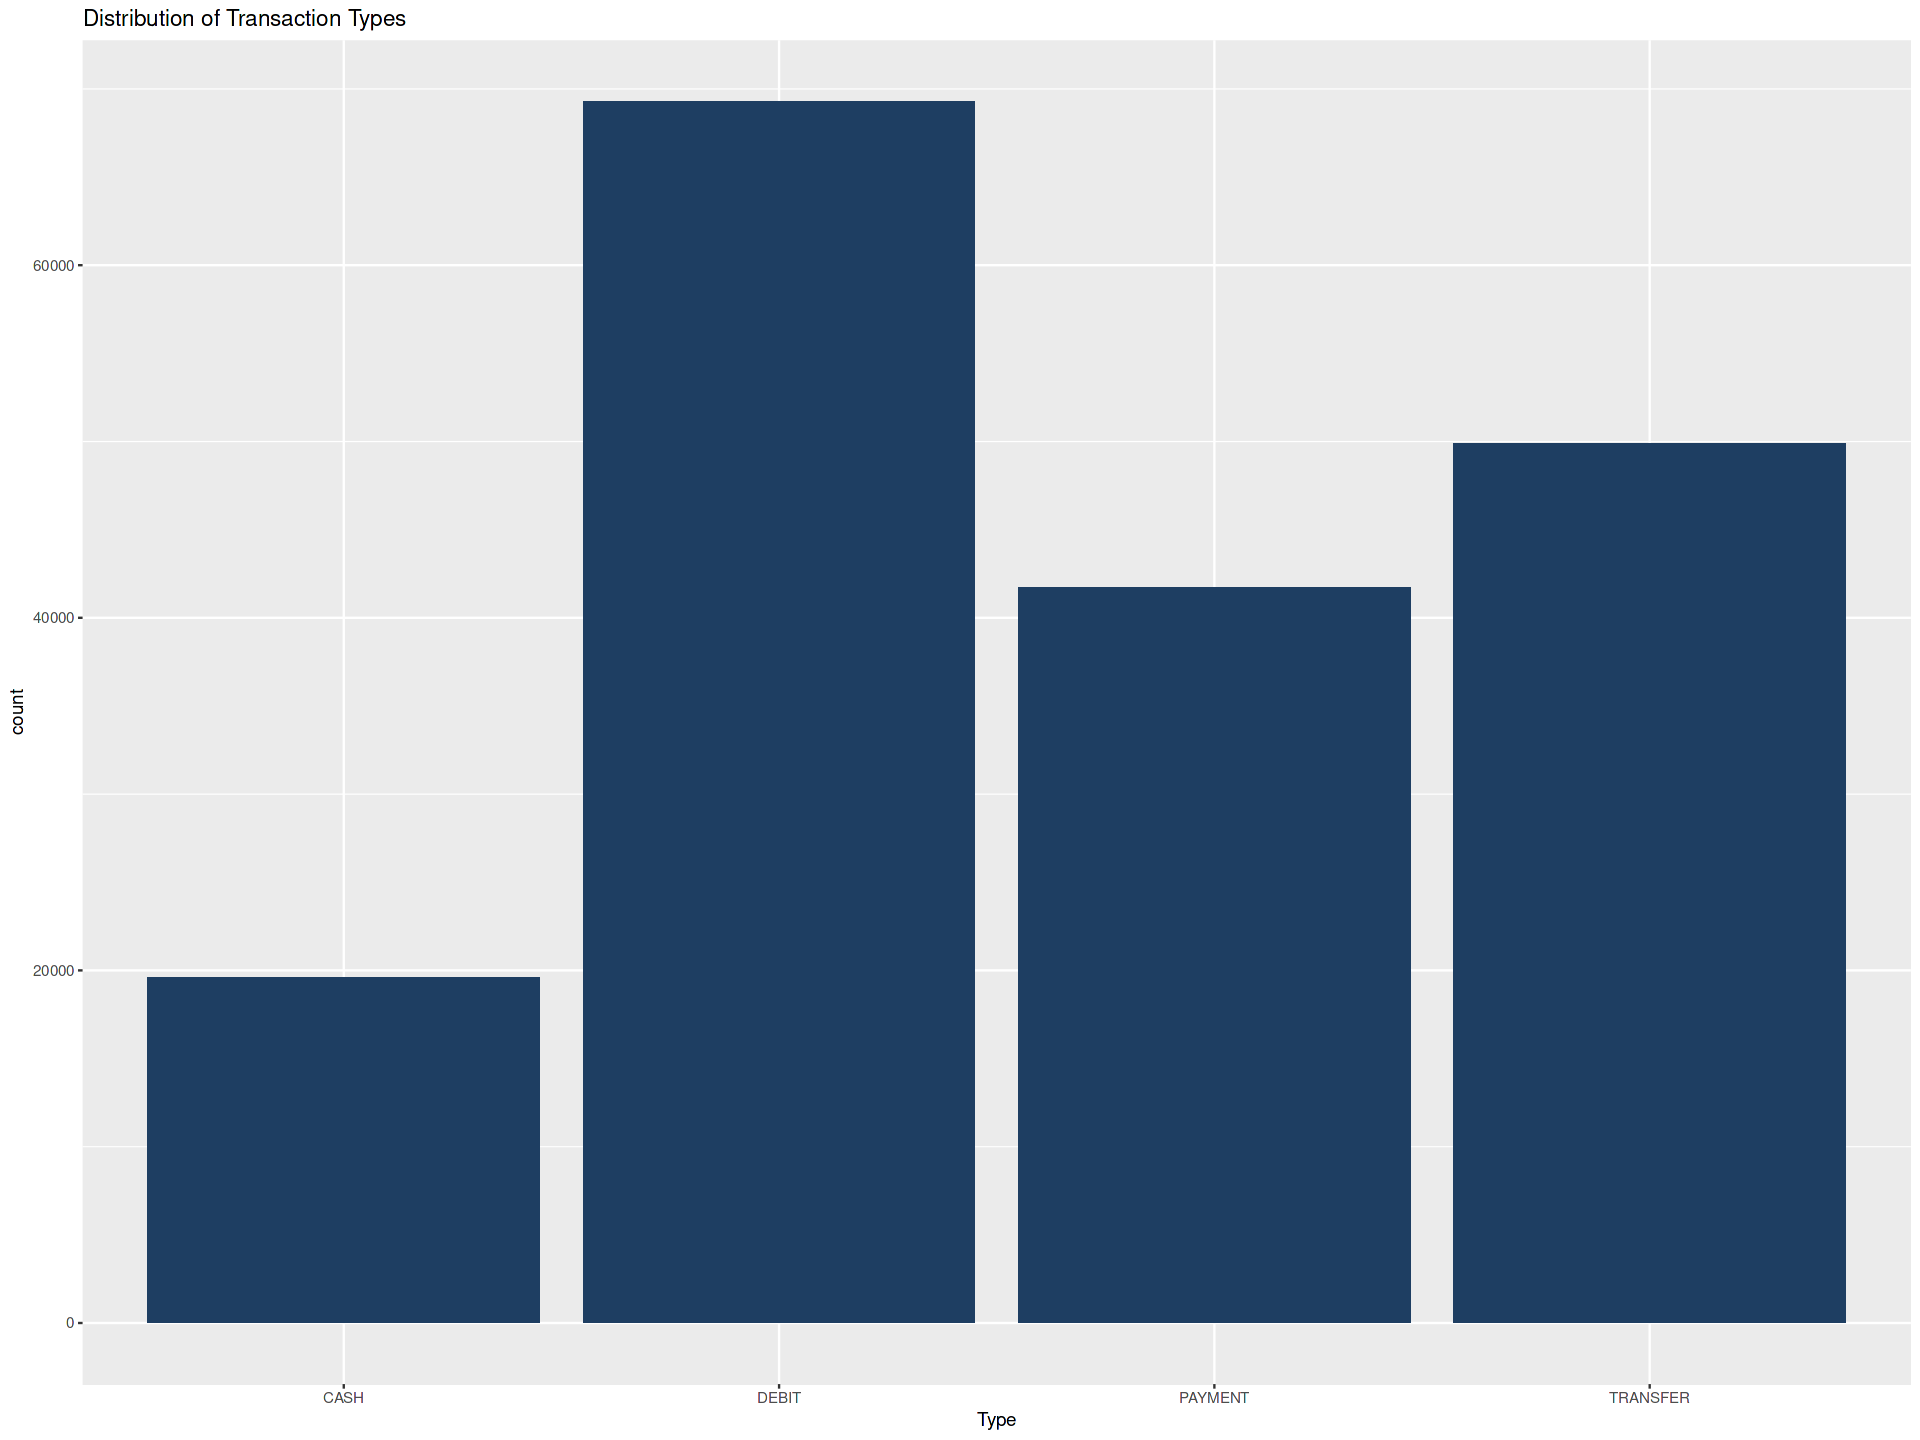

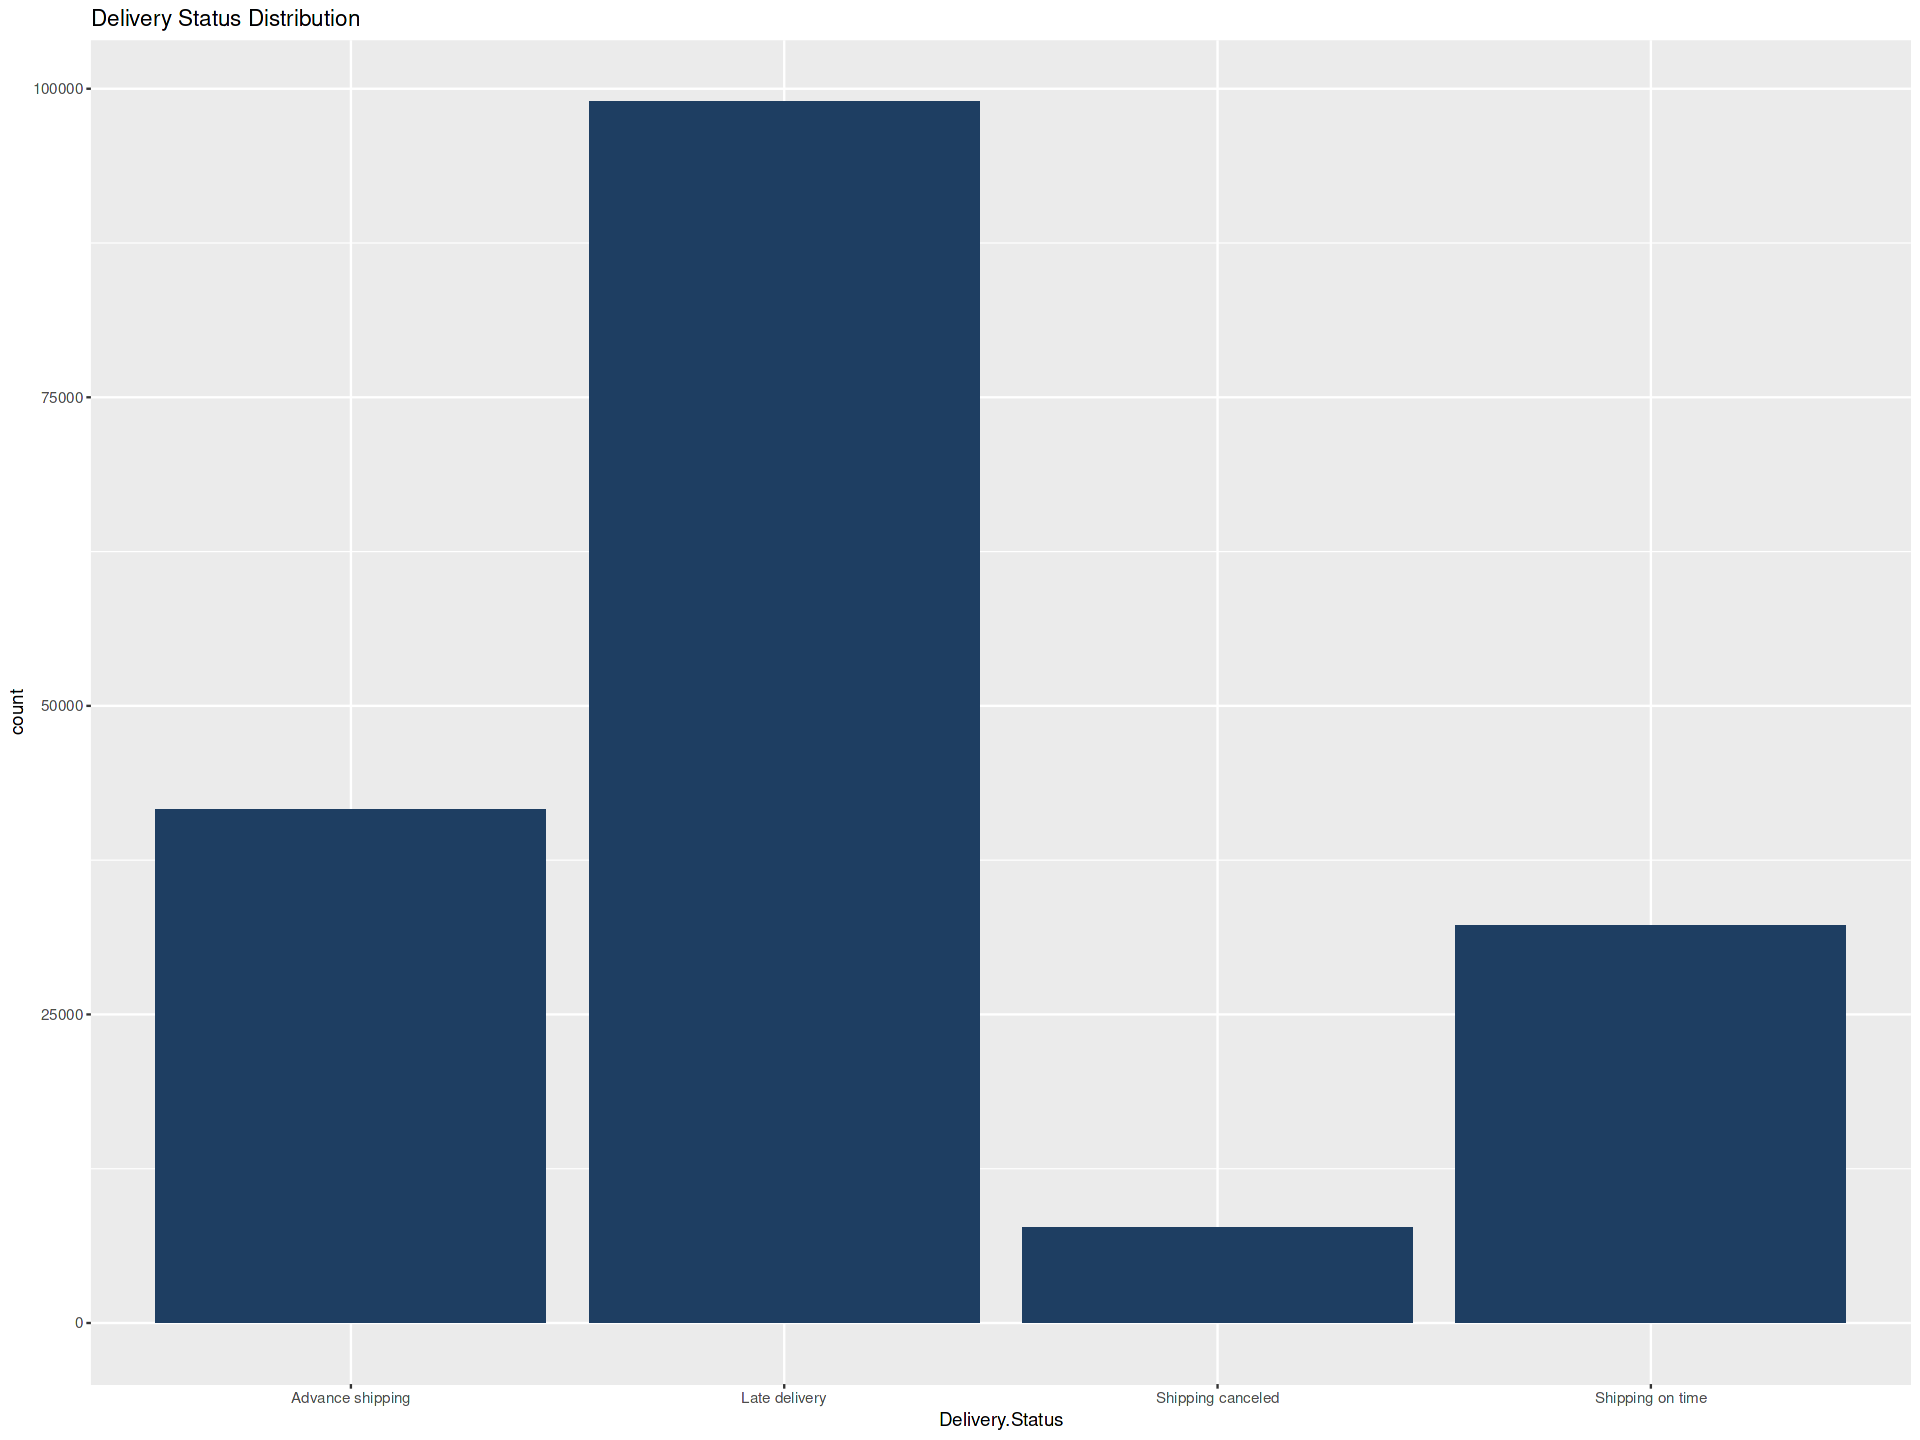

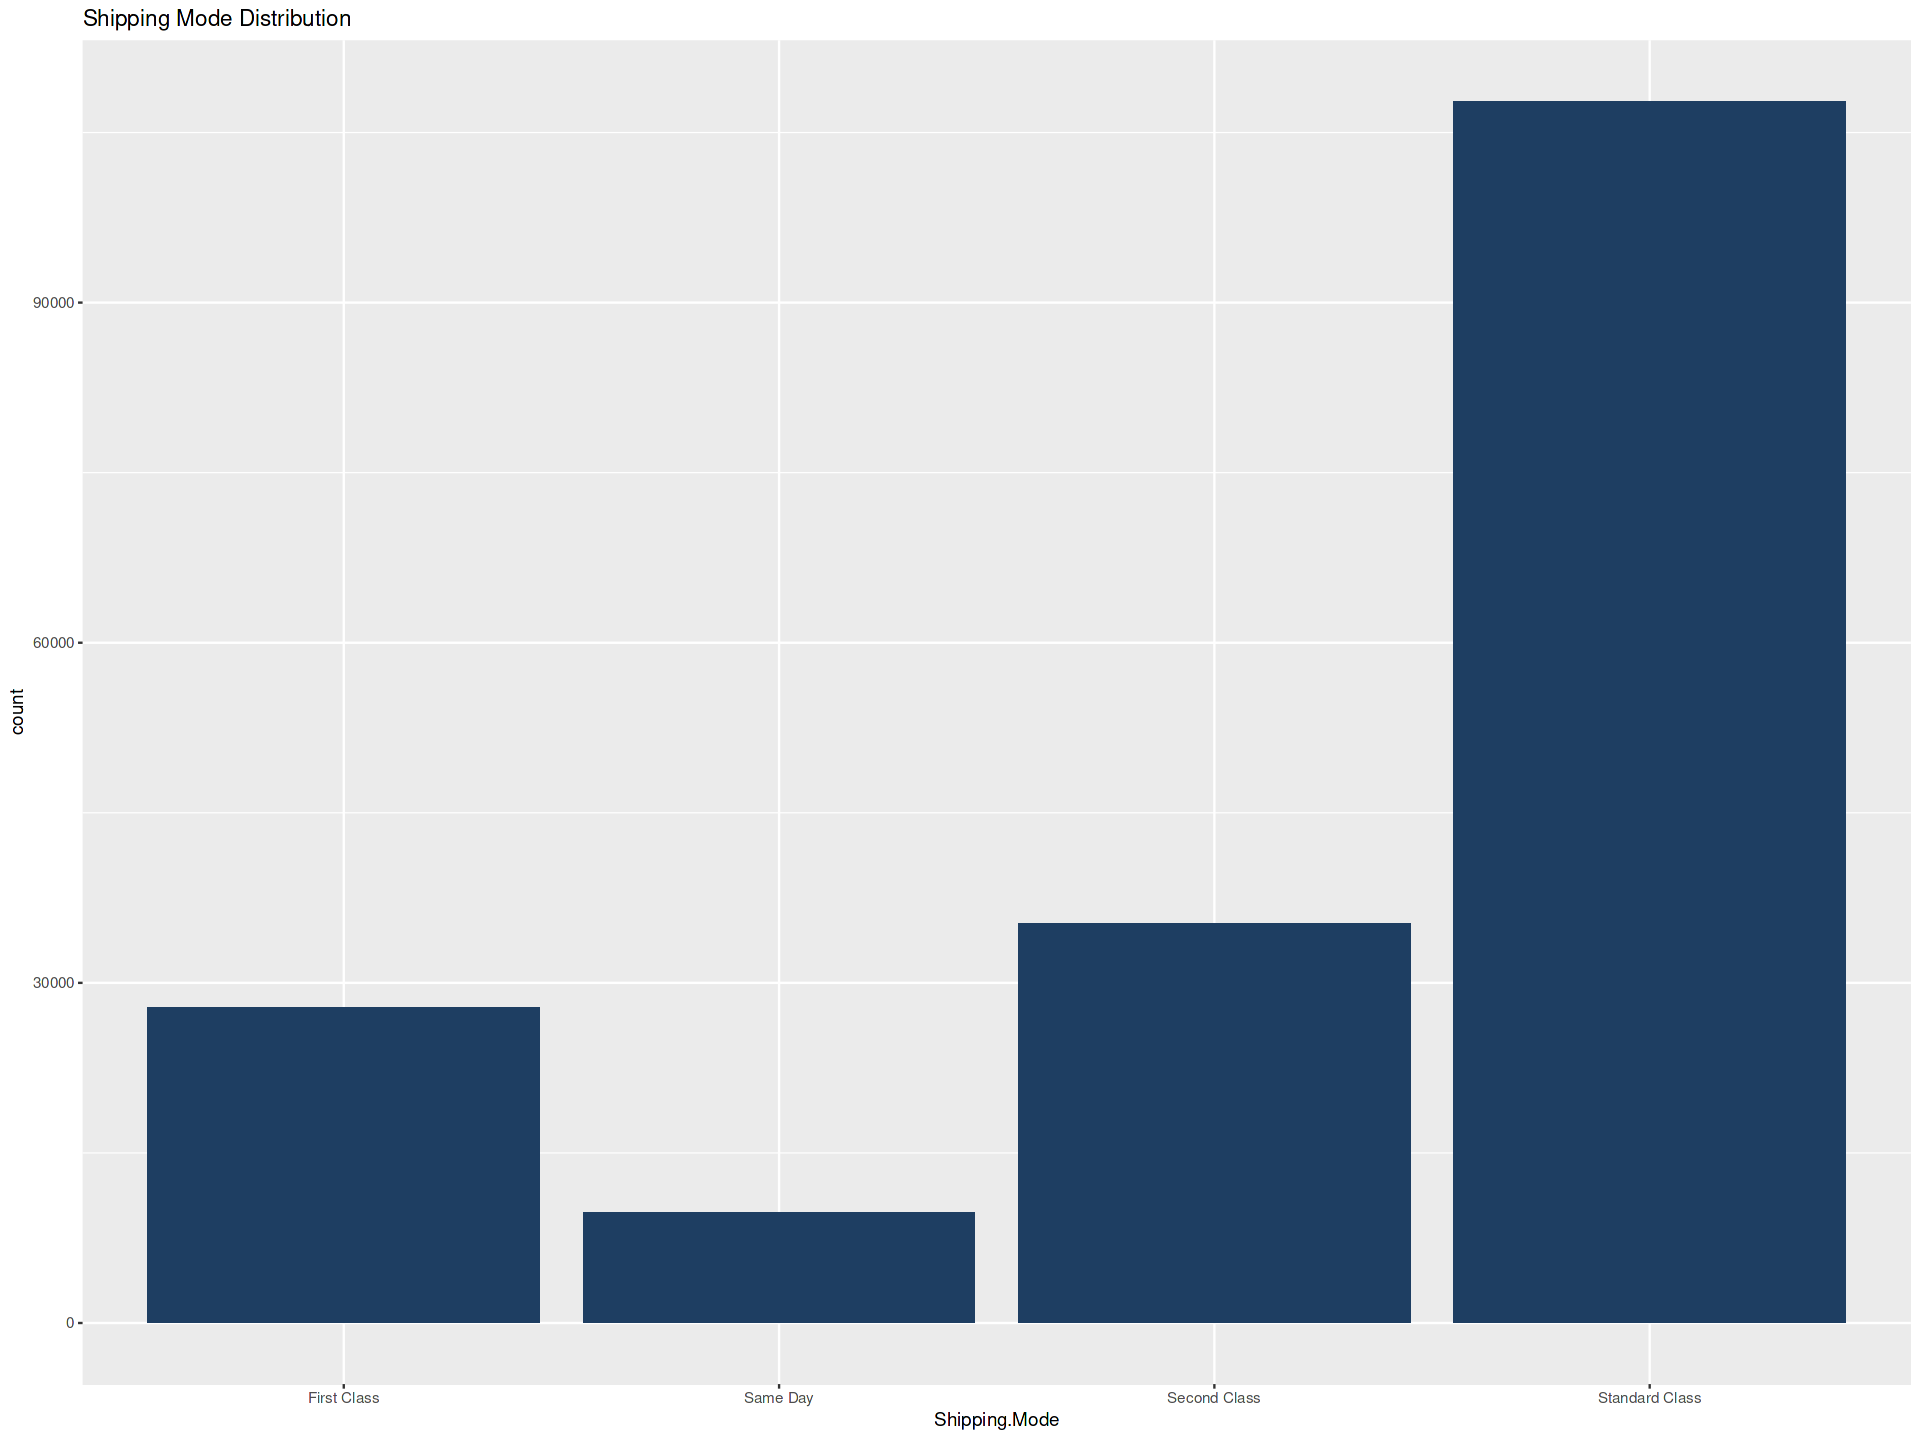

In [75]:
# Plot the distribution of categorical variables
ggplot(df, aes(x = Type)) + geom_bar(fill = FILL_COLOR) + ggtitle("Distribution of Transaction Types")
ggplot(df, aes(x = Delivery.Status)) + geom_bar(fill = FILL_COLOR) + ggtitle("Delivery Status Distribution")
ggplot(df, aes(x = Shipping.Mode)) + geom_bar(fill = FILL_COLOR) + ggtitle("Shipping Mode Distribution")

# **Summary Statistics for Numeric Columns**

Next, we will generate summary statistics for numeric variables, such as **Benefit.per.order**, **Sales.per.customer**, and **Order.Item.Discount**.

## **What we need to know:**
- What are the ranges and typical values for these numeric variables?
- Are there any interesting patterns in the benefit per order and sales per customer?

### **Summary:**
- Most benefits per order are positive, but there are outliers with negative benefits.
- Sales per customer vary widely, with some customers generating significantly higher sales.

In [76]:
df %>%
  select(Order.Profit.Per.Order, Sales.per.customer, Order.Item.Discount) %>%
  summary()

 Order.Profit.Per.Order Sales.per.customer Order.Item.Discount
 Min.   :-4274.98       Min.   :   7.49    Min.   :  0.00     
 1st Qu.:    7.00       1st Qu.: 104.38    1st Qu.:  5.40     
 Median :   31.52       Median : 163.99    Median : 14.00     
 Mean   :   21.98       Mean   : 183.11    Mean   : 20.66     
 3rd Qu.:   64.80       3rd Qu.: 247.40    3rd Qu.: 29.99     
 Max.   :  911.80       Max.   :1939.99    Max.   :500.00     

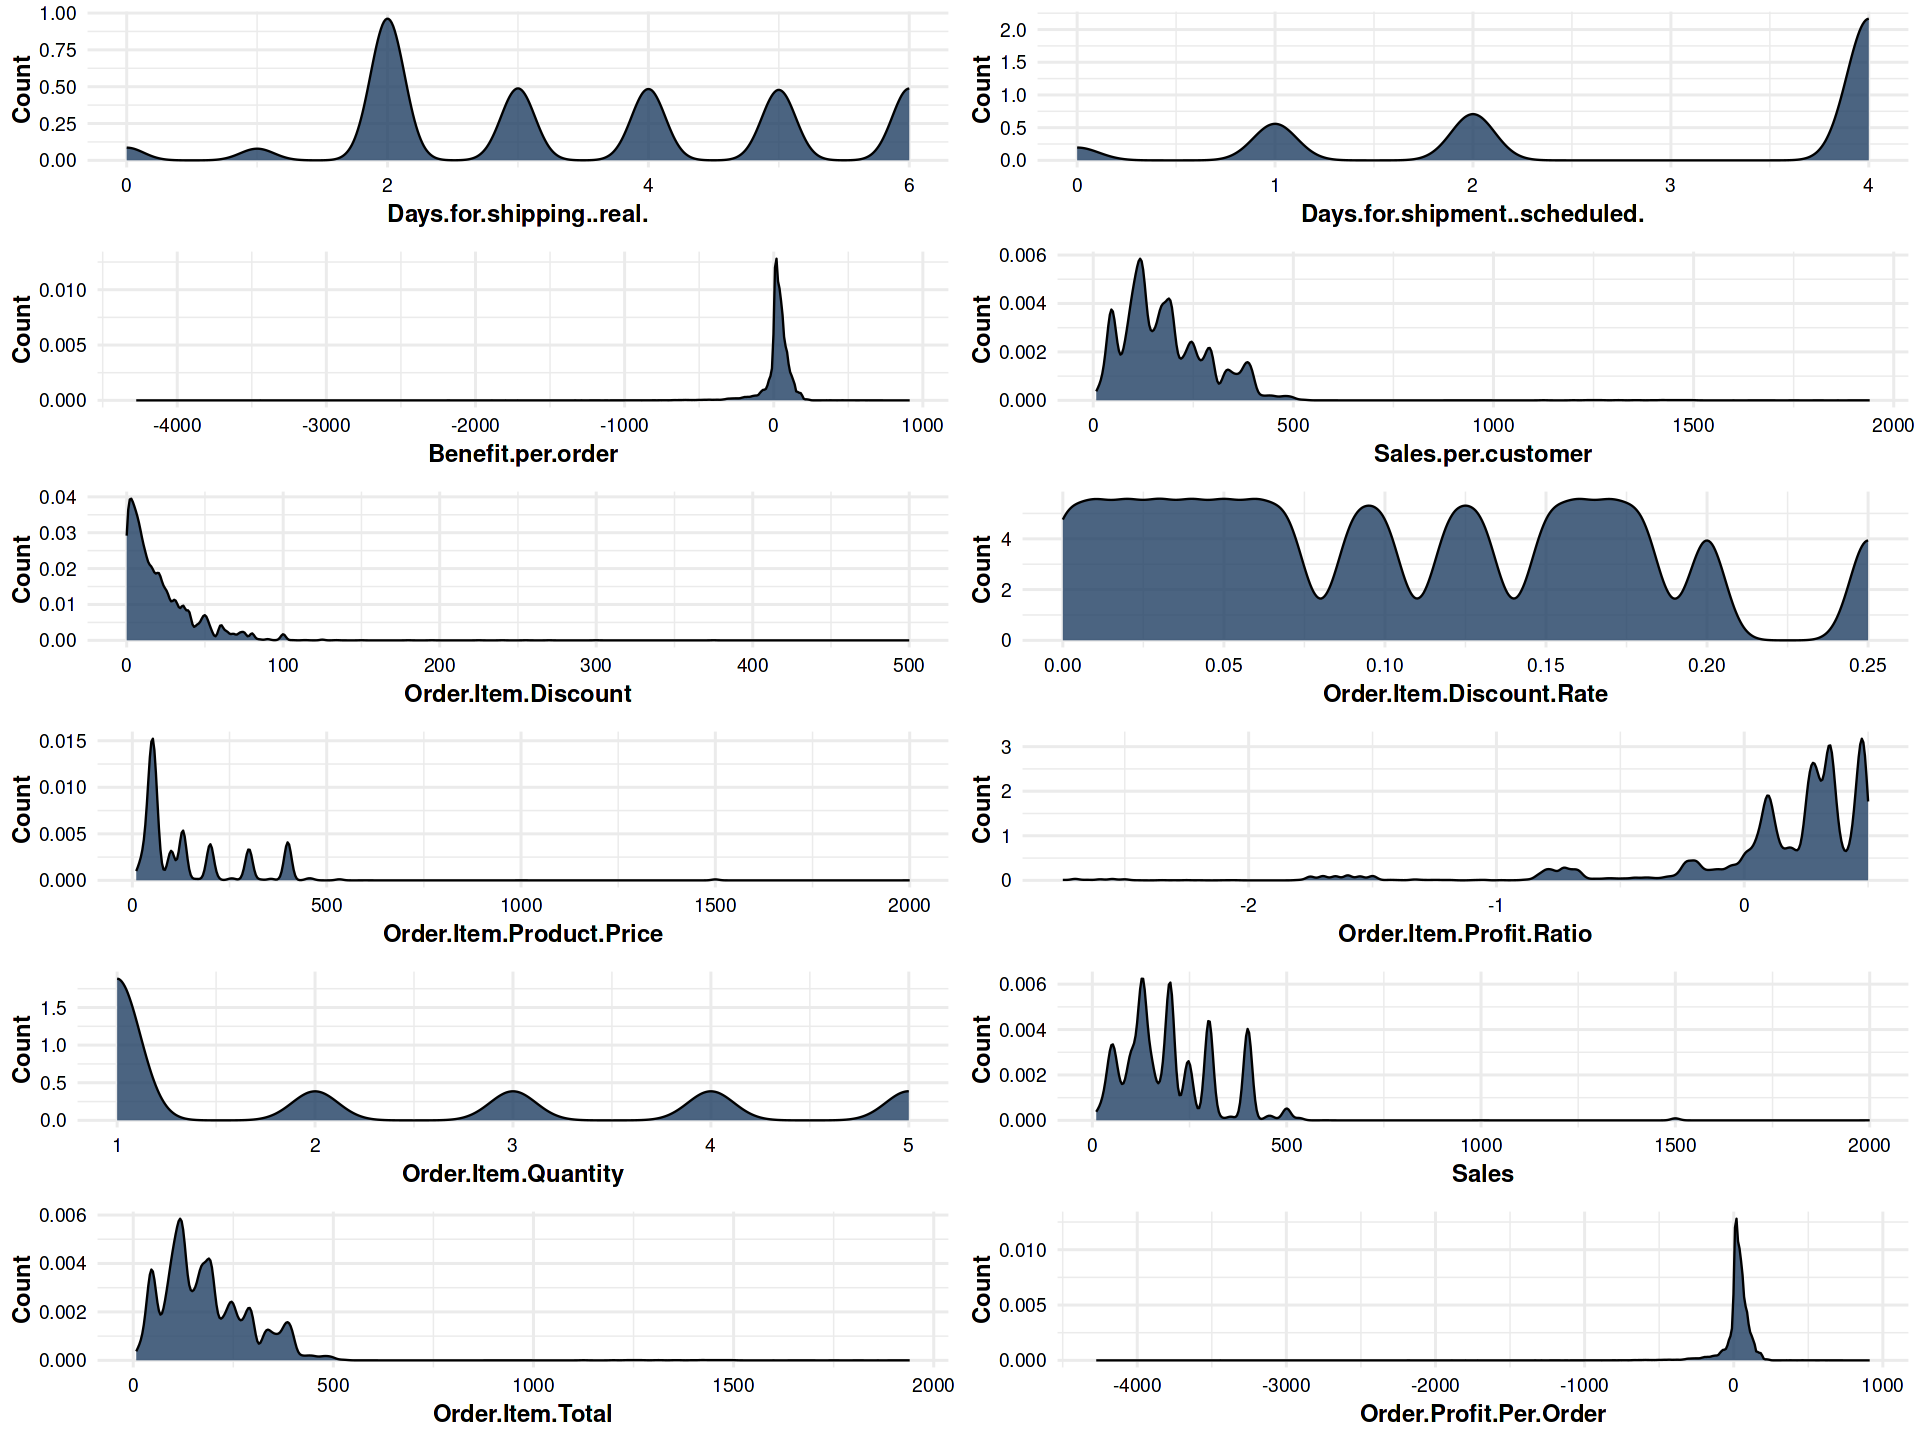

In [77]:
library(gridExtra)

# Selecting the numeric columns from the dataset
numeric_vars <- data %>% 
  select(Days.for.shipping..real., Days.for.shipment..scheduled., Benefit.per.order, 
         Sales.per.customer, Order.Item.Discount, Order.Item.Discount.Rate, 
         Order.Item.Product.Price, Order.Item.Profit.Ratio, Order.Item.Quantity, 
         Sales, Order.Item.Total, Order.Profit.Per.Order)

# Create a list to store histogram plots
hist_plots <- list()

# Loop through numeric variables and create histograms
for (var in colnames(numeric_vars)) {
  hist_plots[[var]] <- ggplot(data, aes_string(x = var)) +
    geom_density(fill = FILL_COLOR, alpha = 0.8) +
    labs(x = var,
         y = "Count") +
    theme_minimal(base_size = 14) +
    theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
          axis.title.x = element_text(face = "bold"),
          axis.title.y = element_text(face = "bold"),
          axis.text = element_text(color = "black"))
}

# Arrange histograms side by side
grid.arrange(grobs = hist_plots, ncol = 2)  # Change ncol to adjust the number of columns

# **Exploring Correlations Between Numeric Variables**

We will explore the correlations between numeric variables to identify relationships. This will help understand how variables such as **Benefit.per.order** and **Sales.per.customer** are related.

## **What we need to know:**
- Are there any strong correlations between numeric variables?
- Can we detect potential multicollinearity between certain variables?

### **Summary:**
- Most benefits per order are positive, but there are outliers with negative benefits.
- Sales per customer vary widely, with some customers generating significantly higher sales.

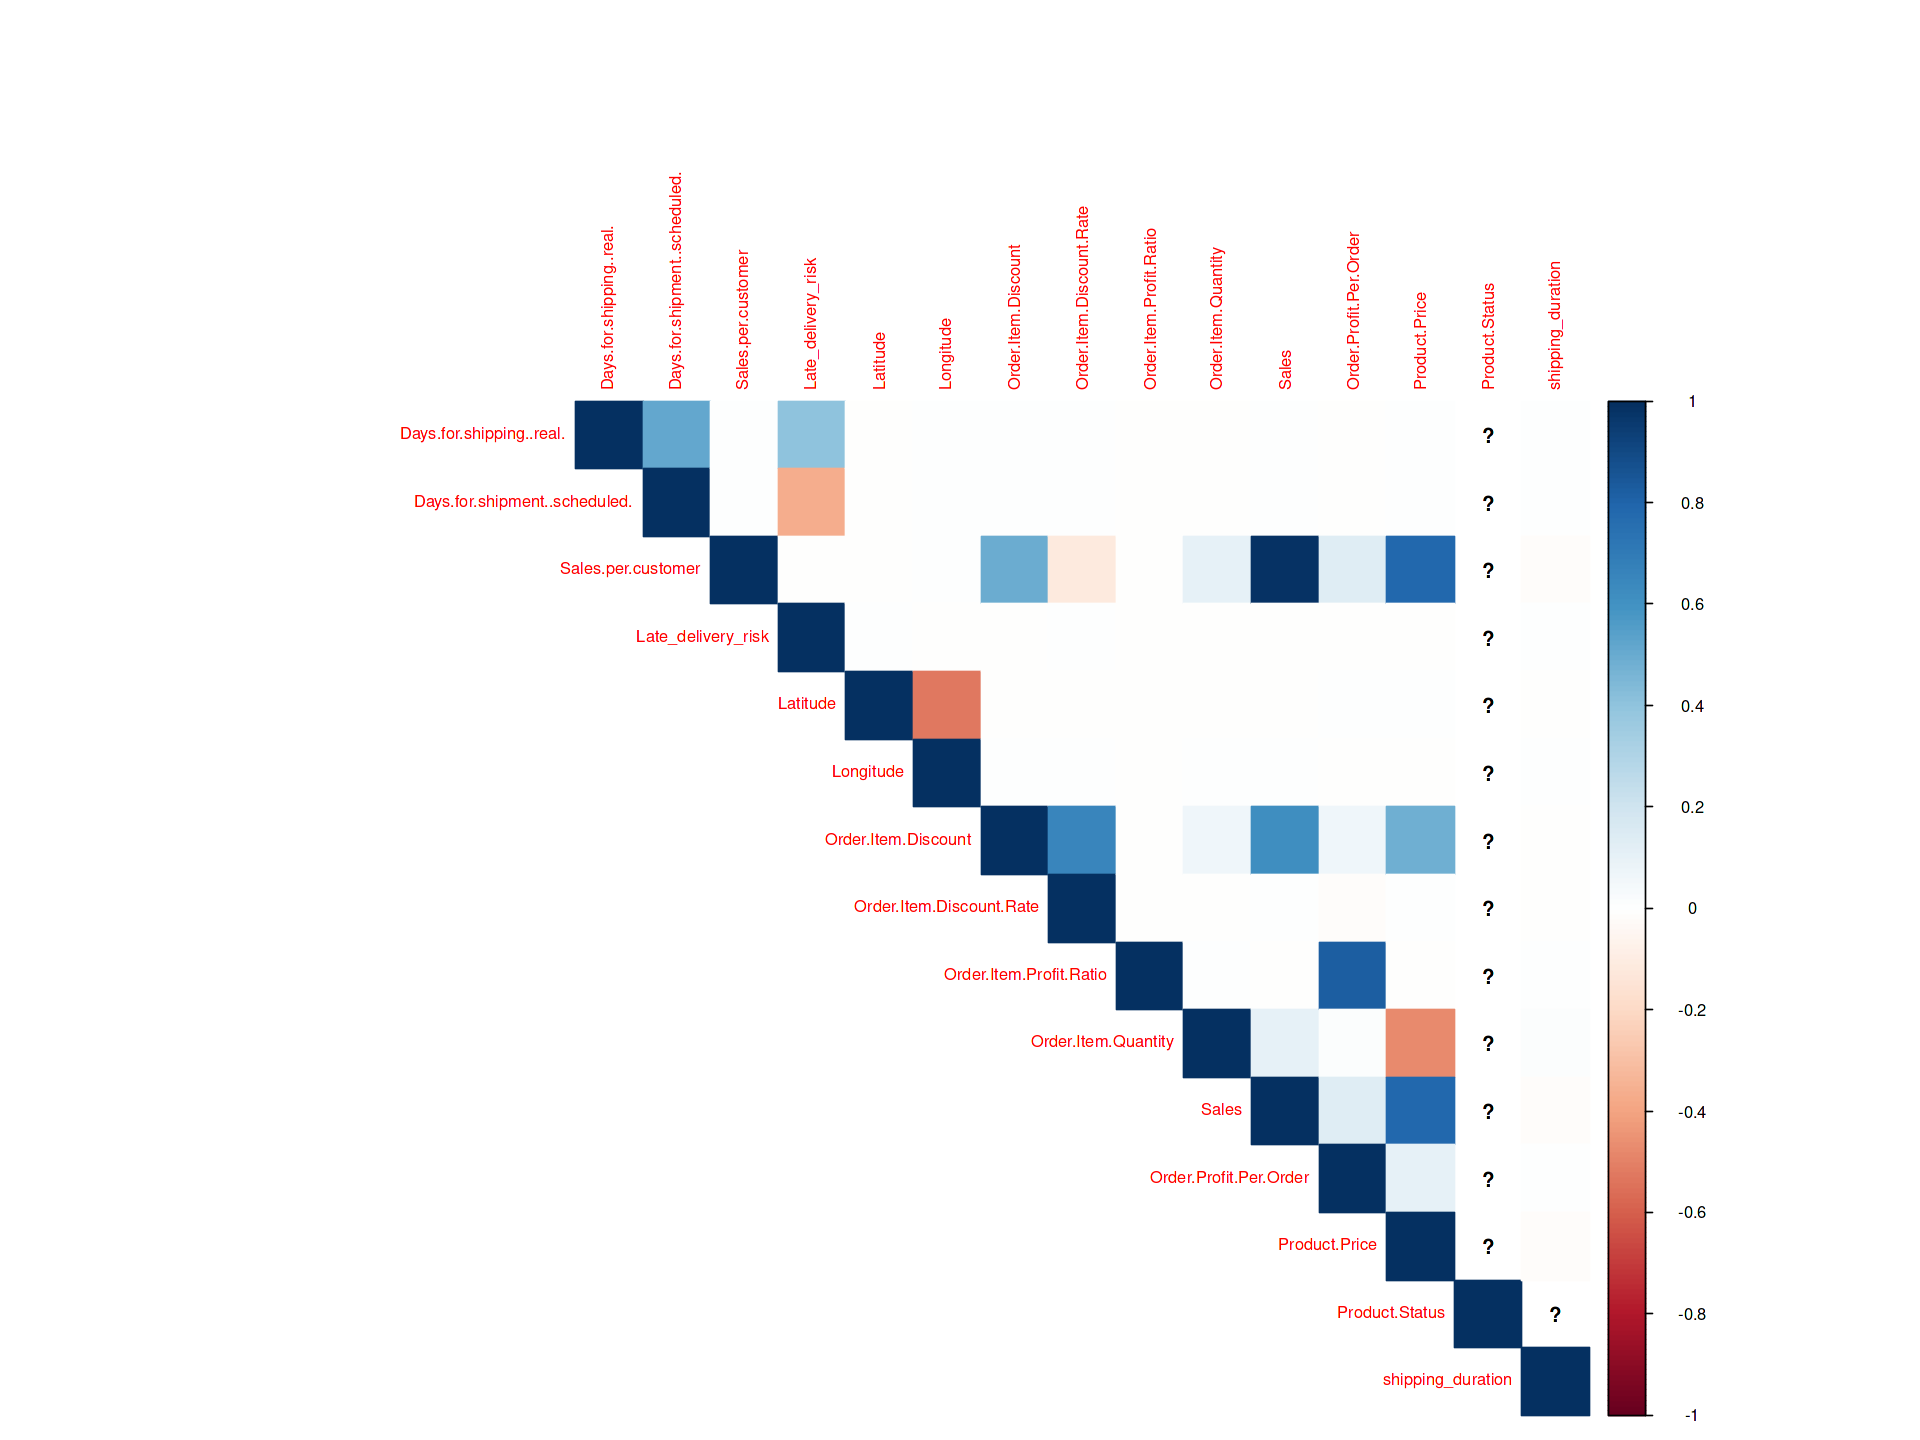

In [78]:
# Select numeric columns
numeric_cols <- df %>%
  select_if(is.numeric)

# Compute the correlation matrix
cor_matrix <- cor(numeric_cols, use = "complete.obs")

# Plot the correlation matrix
corrplot(cor_matrix, method = "color", type = "upper", tl.cex = 0.8)

# **Lets answer some business questions**

---
- Which category has the most frequent late deliveries?

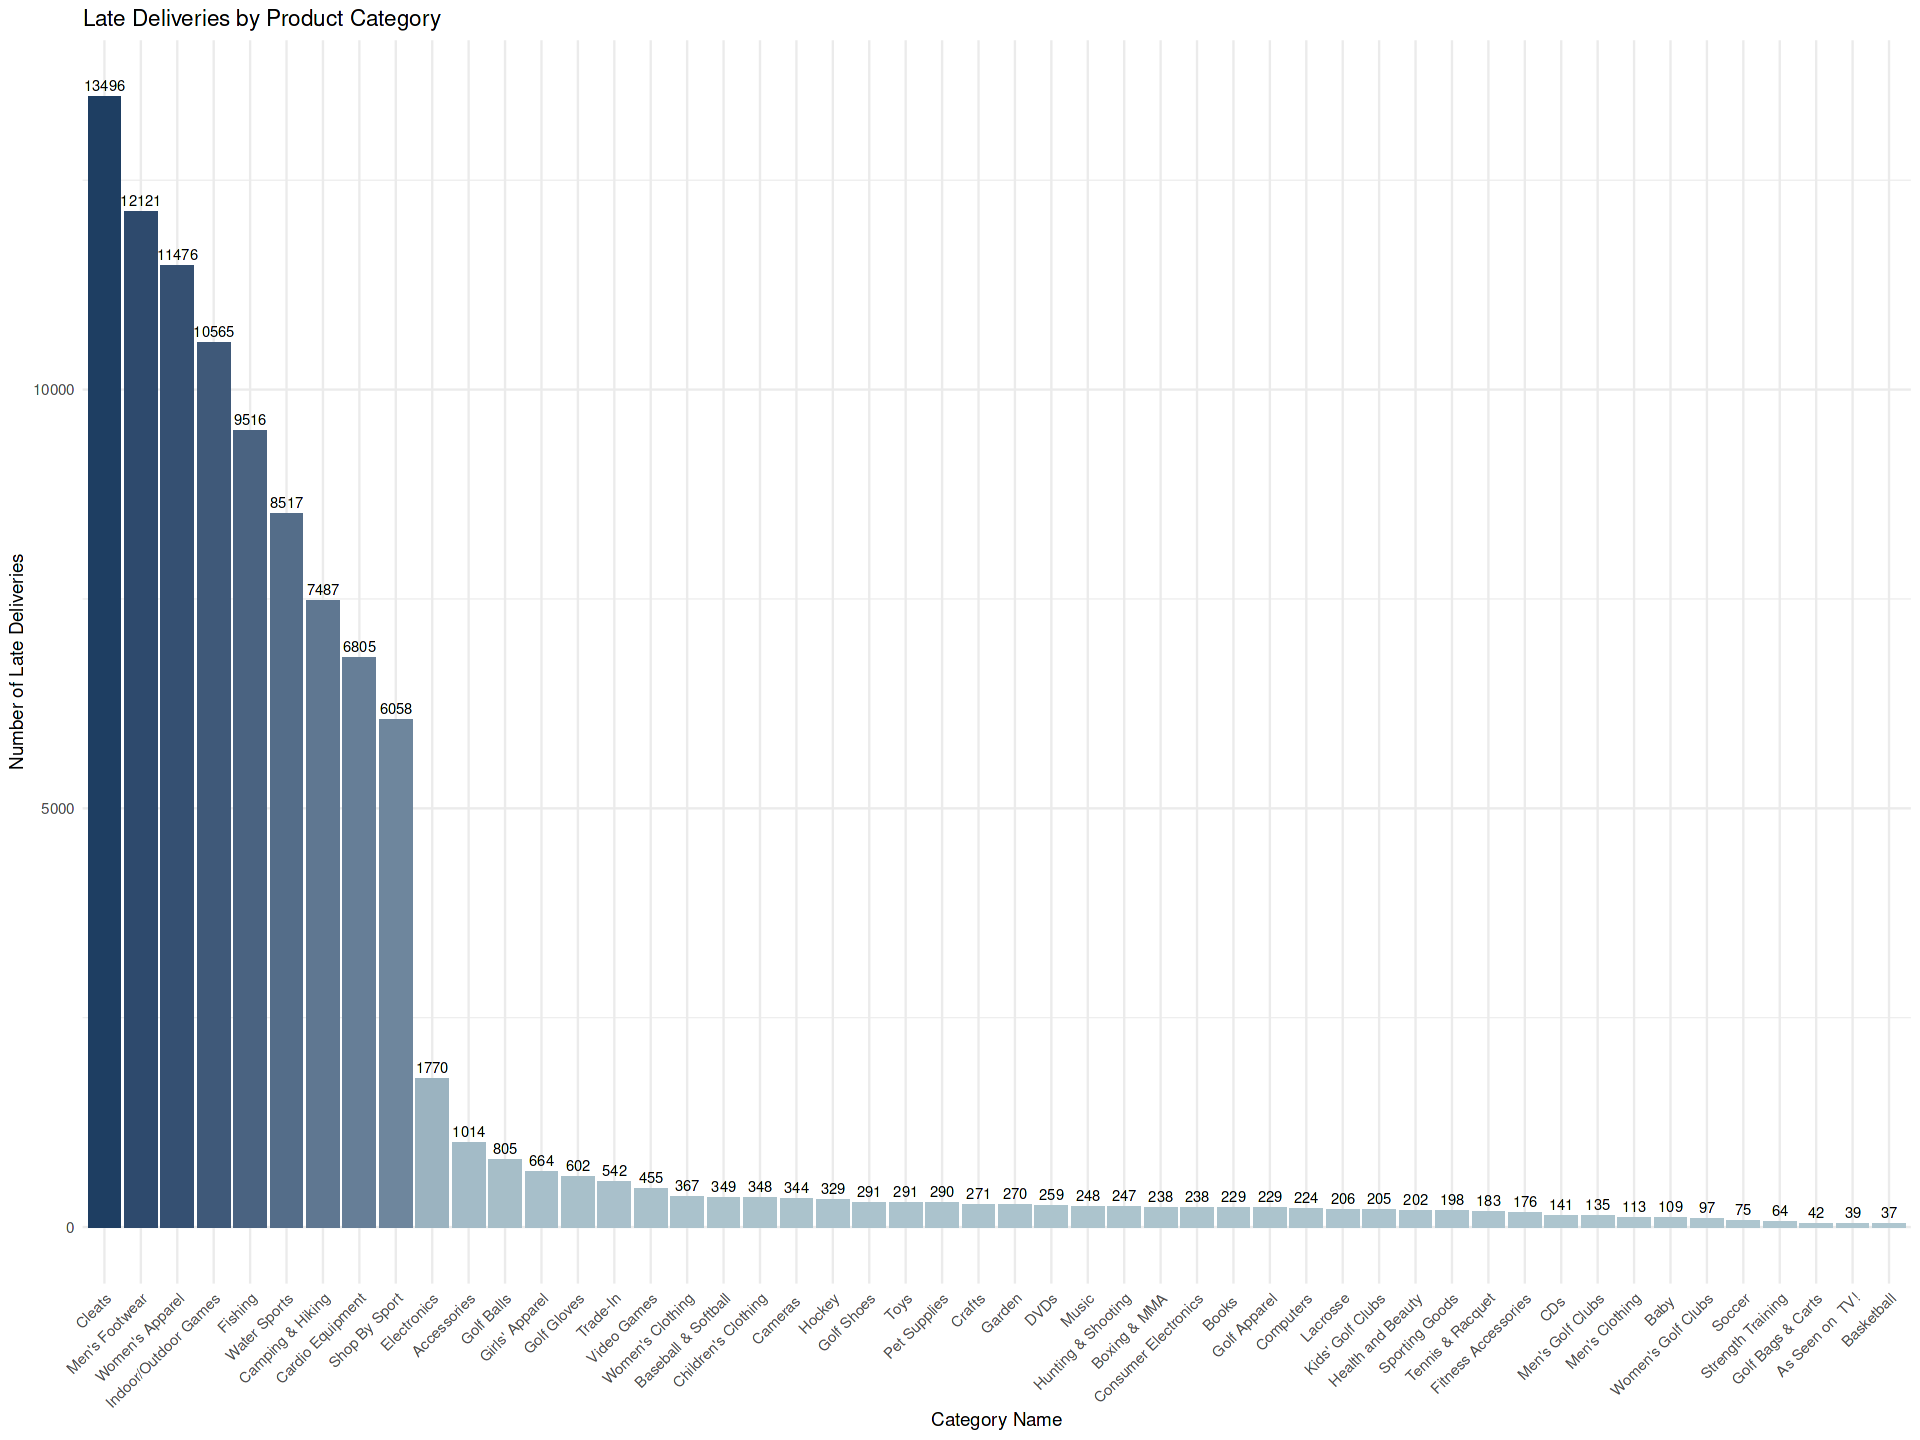

In [79]:
# Summarizing late deliveries by category
category_late_deliveries <- df %>%
  group_by(Category.Name) %>%
  summarise(late_count = sum(Late_delivery_risk == 1, na.rm = TRUE))

# Plotting the data with a heatmap effect
ggplot(category_late_deliveries, aes(x = reorder(Category.Name, -late_count), y = late_count, fill = late_count)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = late_count), vjust = -0.5, size = 3) +  # Adjust text size
  labs(title = "Late Deliveries by Product Category", 
       y = "Number of Late Deliveries", 
       x = "Category Name") +
  scale_fill_gradient(low = "#AEC6CF", high = "#1E3E62") +  # Heatmap effect with gradient
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels
  theme(legend.position = "none") 

- Answer: **Cleats** , **Mon's foolwear** , **Women's Apparel** etc.. has the most frequent late deliveries

---
- Which countries have the highest average sales per customer?

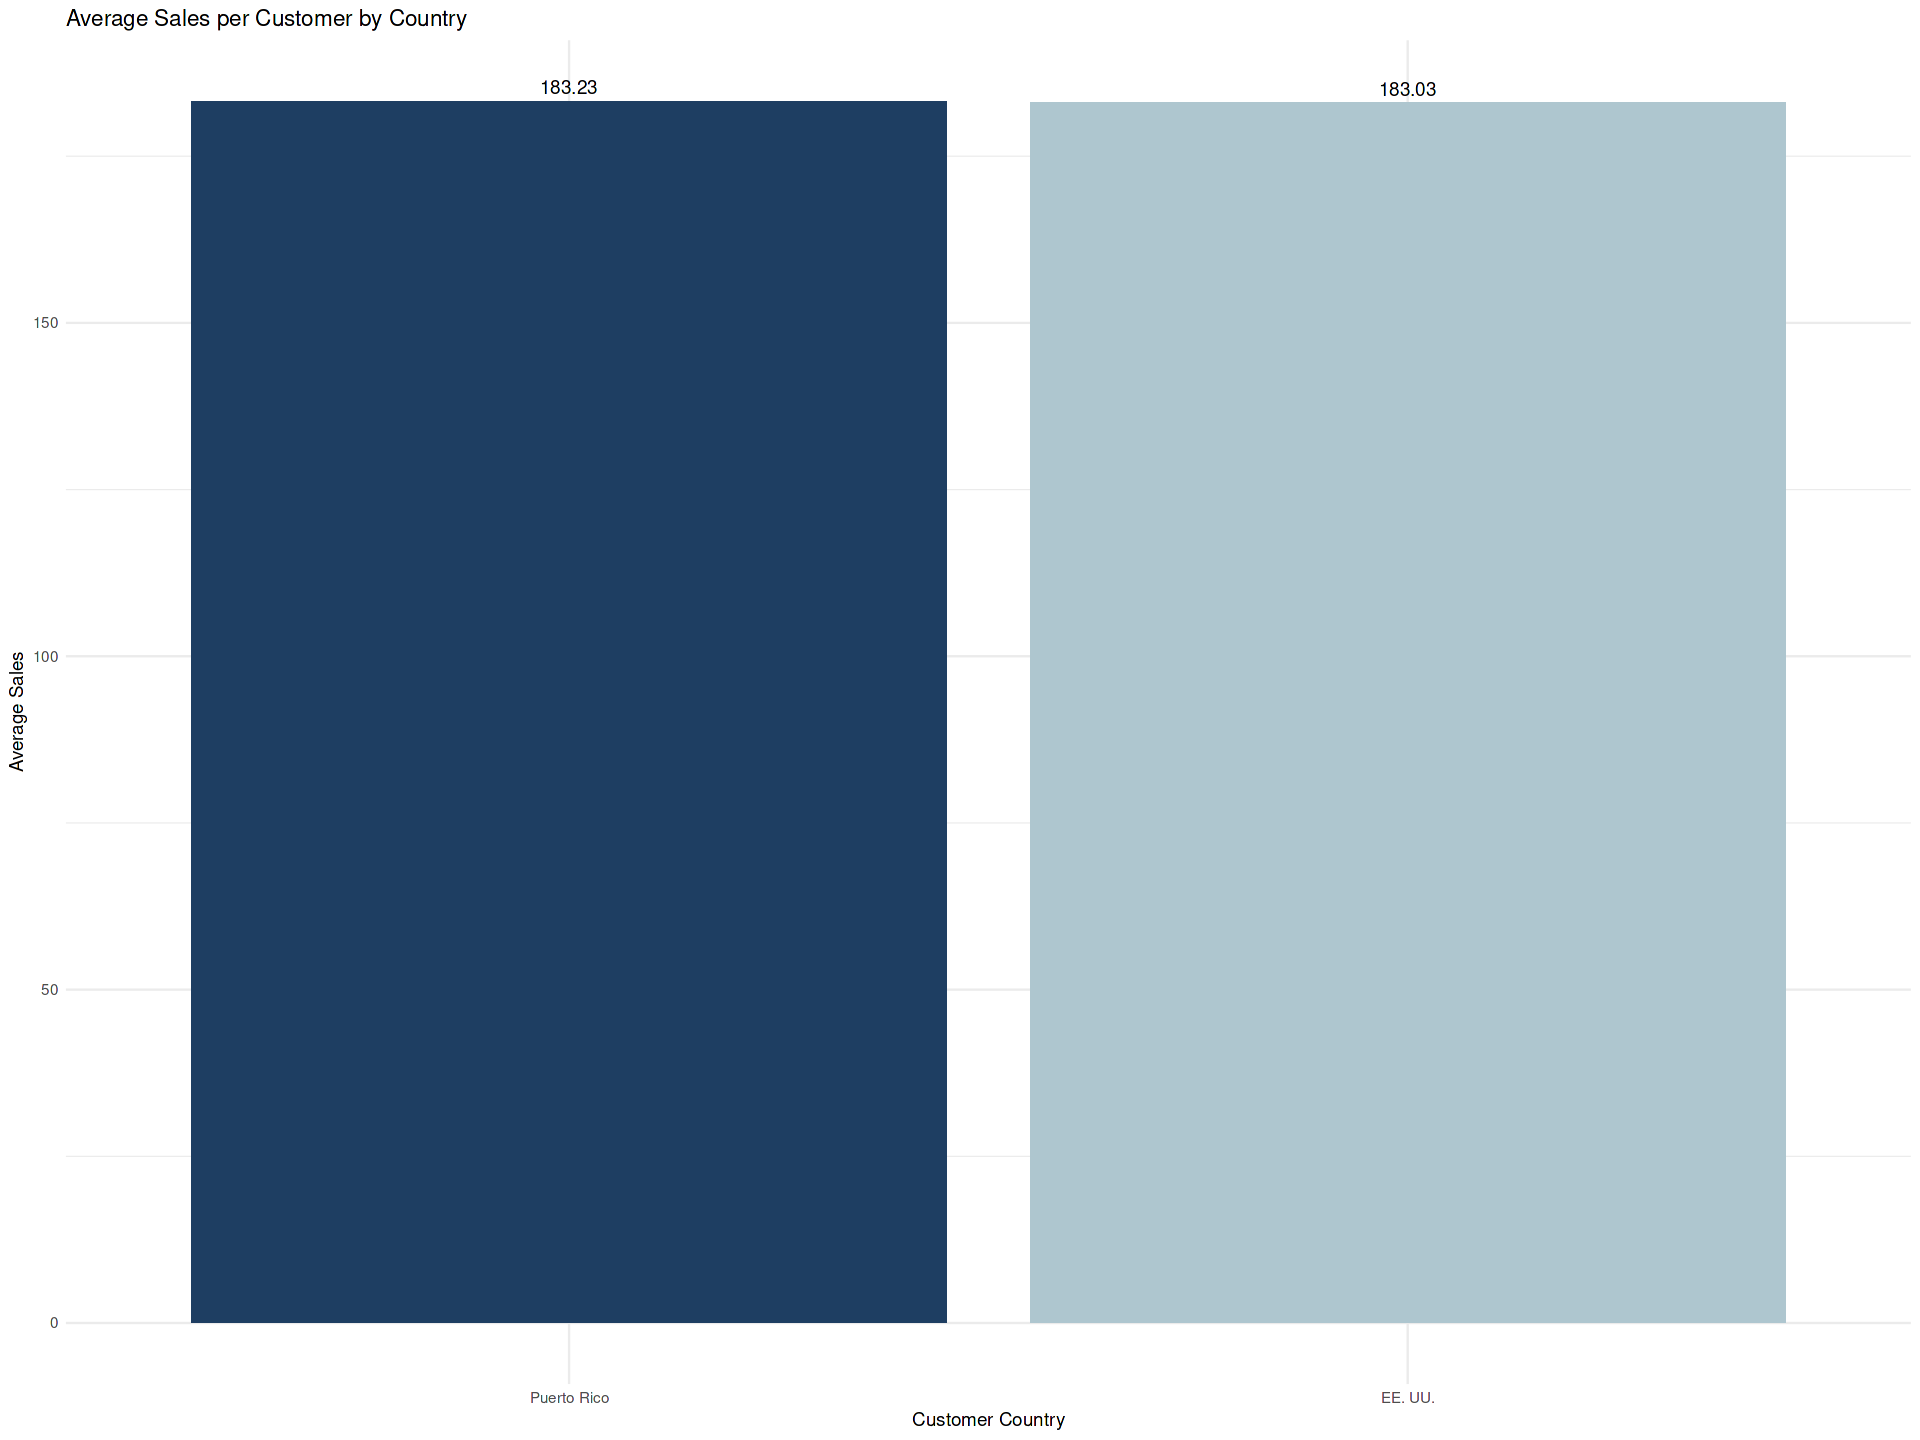

In [80]:
# Summarizing average sales by country
sales_by_country <- df %>%
  group_by(Customer.Country) %>%
  summarise(avg_sales = mean(Sales.per.customer, na.rm = TRUE))

# Plotting the data with a heatmap effect
ggplot(sales_by_country, aes(x = reorder(Customer.Country, -avg_sales), y = avg_sales, fill = avg_sales)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = round(avg_sales, 2)), vjust = -0.5) +
  labs(title = "Average Sales per Customer by Country", y = "Average Sales", x = "Customer Country") +
  scale_fill_gradient(low = "#AEC6CF", high = "#1E3E62") +  # Heatmap effect with gradient
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme_minimal() +
  theme(legend.position = "none")

- Answer: I think there is one country **EE. UU**. **EE UU** is the Spanish acronym for **Estados Unidos** or **United States** and **Puerto Rico**  is a Caribbean island and unincorporated U.S. territory with a landscape of mountains,. Spanish often doubles the letters to indicate a plural acronym. And they almost equal.

# **Customer Analysis**

Customer analysis is a critical component in understanding business performance and making informed decisions. It involves examining customer behavior, segmentation, profitability, and preferences. 

---
- Which customer segment contributes the most to profit?

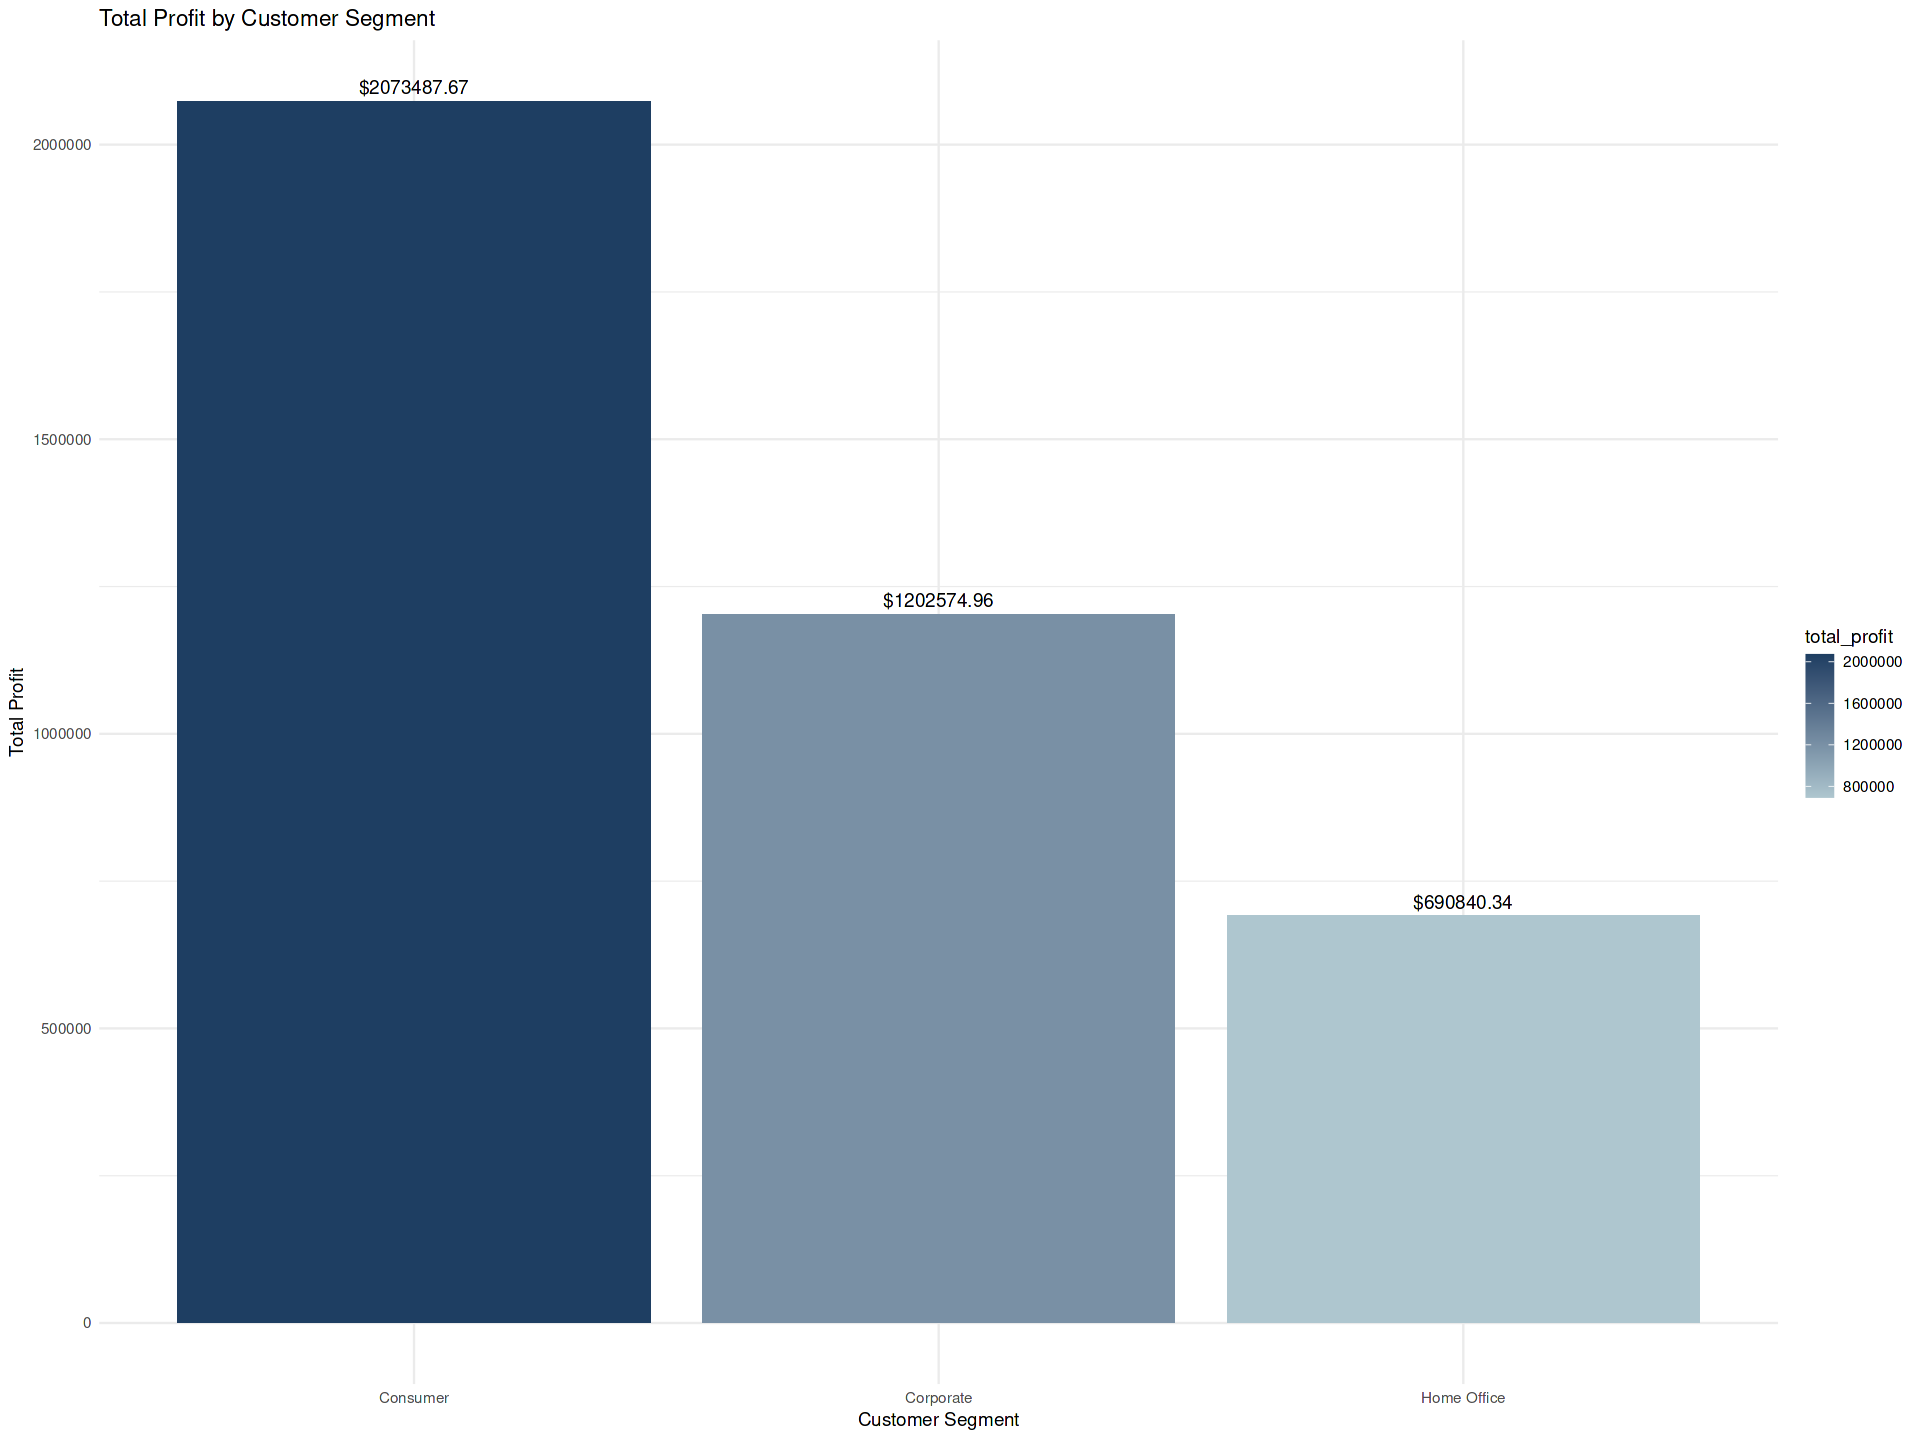

In [81]:
# Create the customer_profit dataframe
customer_profit <- df %>%
  group_by(Customer.Segment) %>%
  summarise(total_profit = sum(Order.Profit.Per.Order, na.rm = TRUE))

# Plot with a heatmap effect using a gradient
ggplot(customer_profit, aes(x = Customer.Segment, y = total_profit, fill = total_profit)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste("$", round(total_profit, 2), sep='')), vjust = -0.5) +
  labs(title = "Total Profit by Customer Segment", y = "Total Profit", x = "Customer Segment") +
  scale_fill_gradient(low = "#AEC6CF", high = "#1E3E62") +  # Heatmap effect with gradient
  theme_minimal()

- Answer: the most customer seg contributes to profit is **Consumer**

---
- Average sales per customer in each segment?

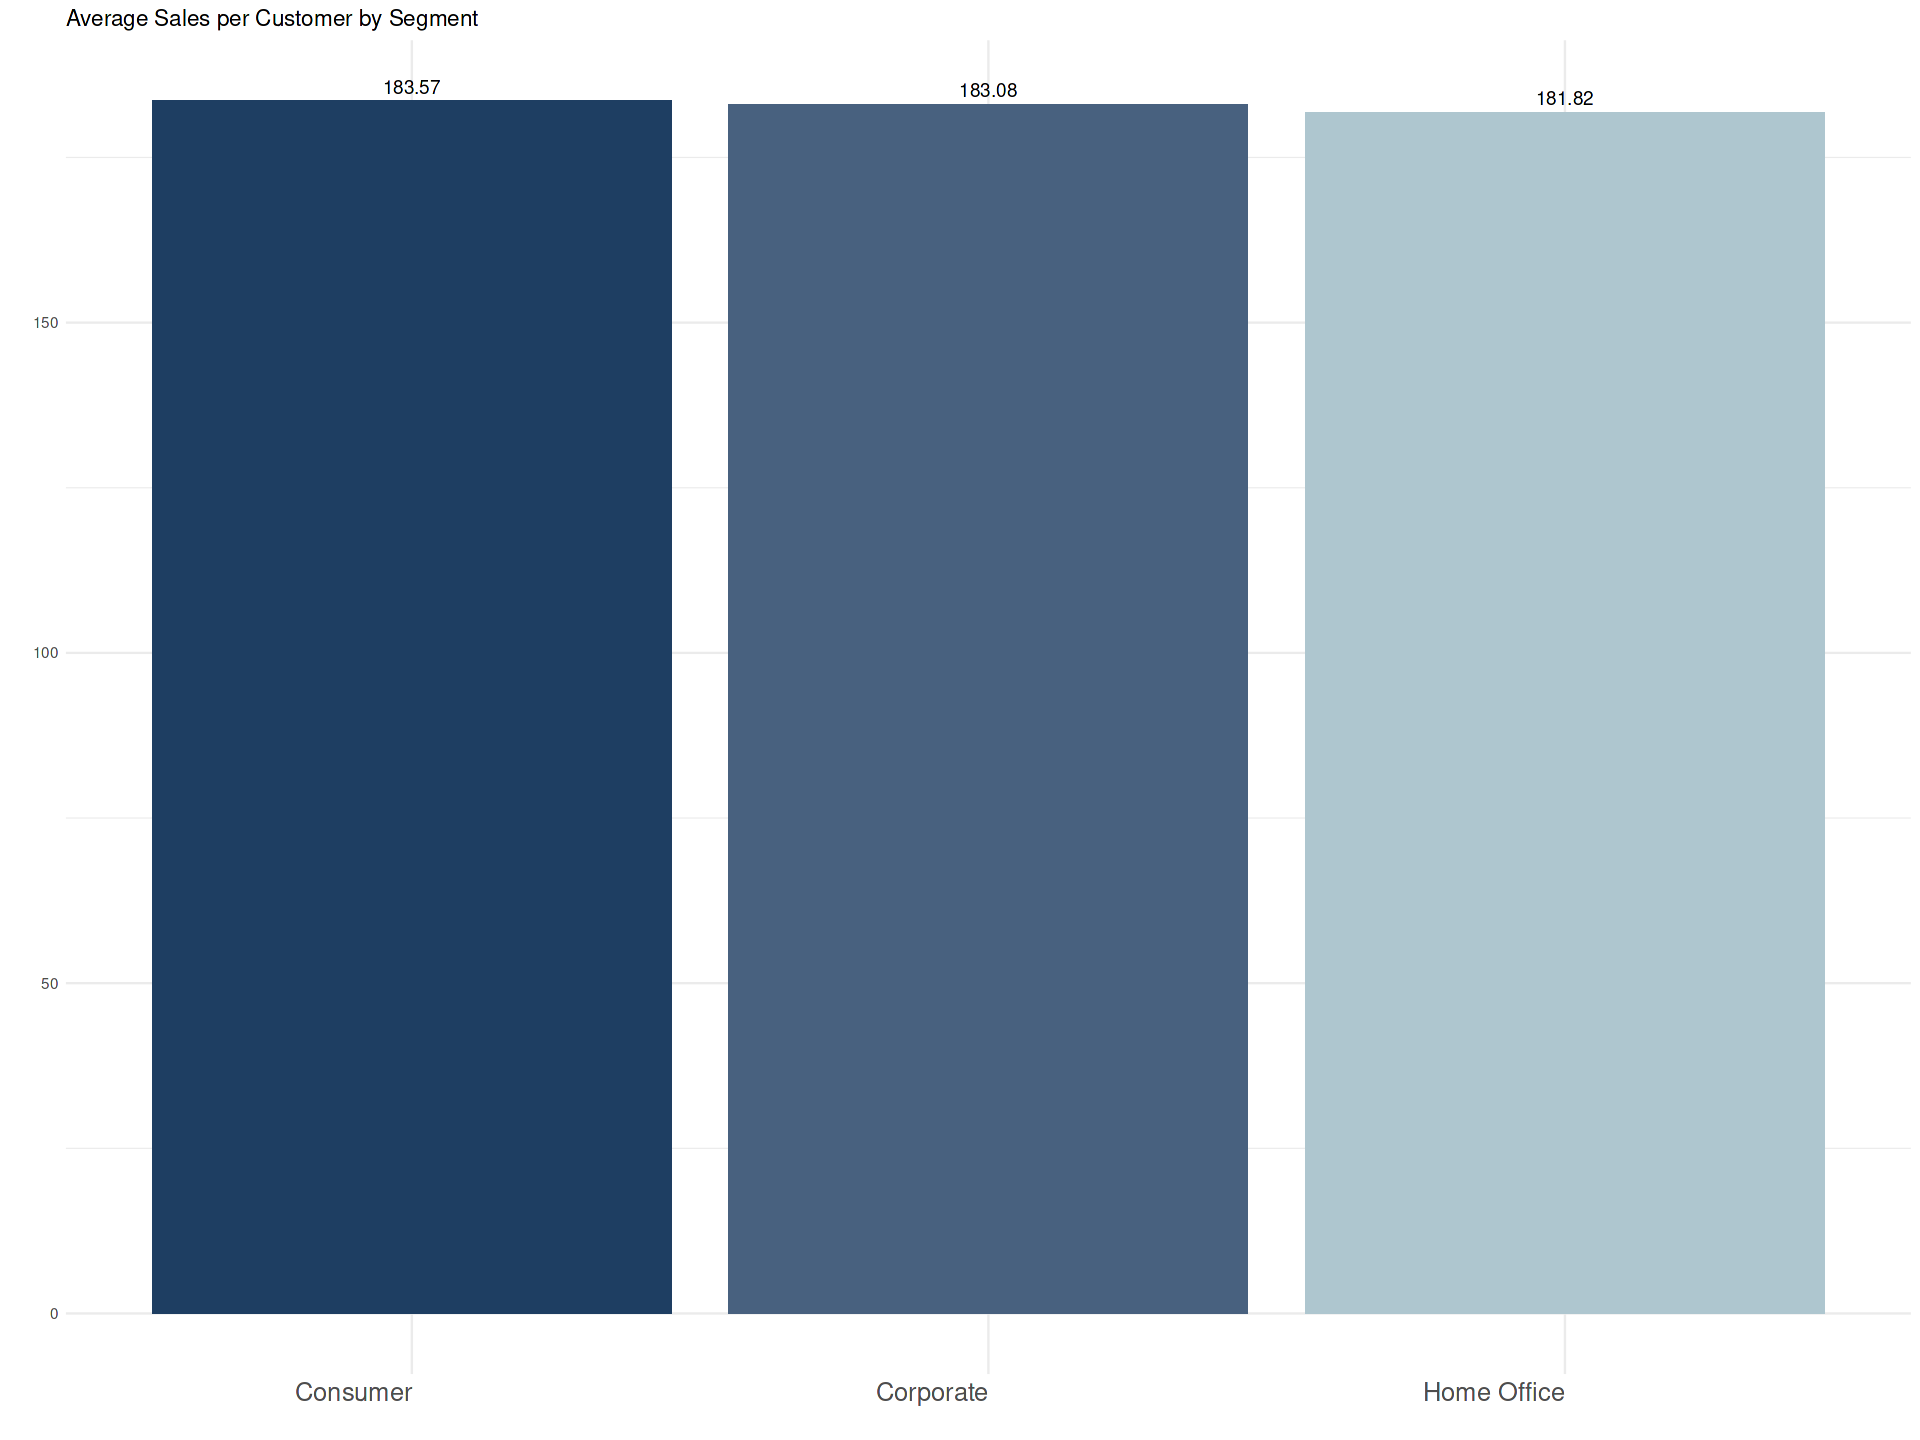

In [82]:
# Summarizing average sales by customer segment
segment_sales <- df %>%
  group_by(Customer.Segment) %>%
  summarise(avg_sales = mean(Sales.per.customer, na.rm = TRUE))

# Plotting the data with a heatmap effect
ggplot(segment_sales, aes(x = Customer.Segment, y = avg_sales, fill = avg_sales)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = round(avg_sales, 2)), vjust = -0.5) +
  labs(title = "Average Sales per Customer by Segment", y = "", x = "") +
  scale_fill_gradient(low = "#AEC6CF", high = "#1E3E62") +  # Heatmap effect with gradient
  theme_minimal() +
  theme(axis.text.x = element_text(hjust = 1, size = 15)) +
  theme(legend.position = "none") 

## **Geographic Analysis of Customers**

Customers' geographical distribution can be analyzed by their location attributes like city, state, or country.

---
- Which states have the highest sales per customer?

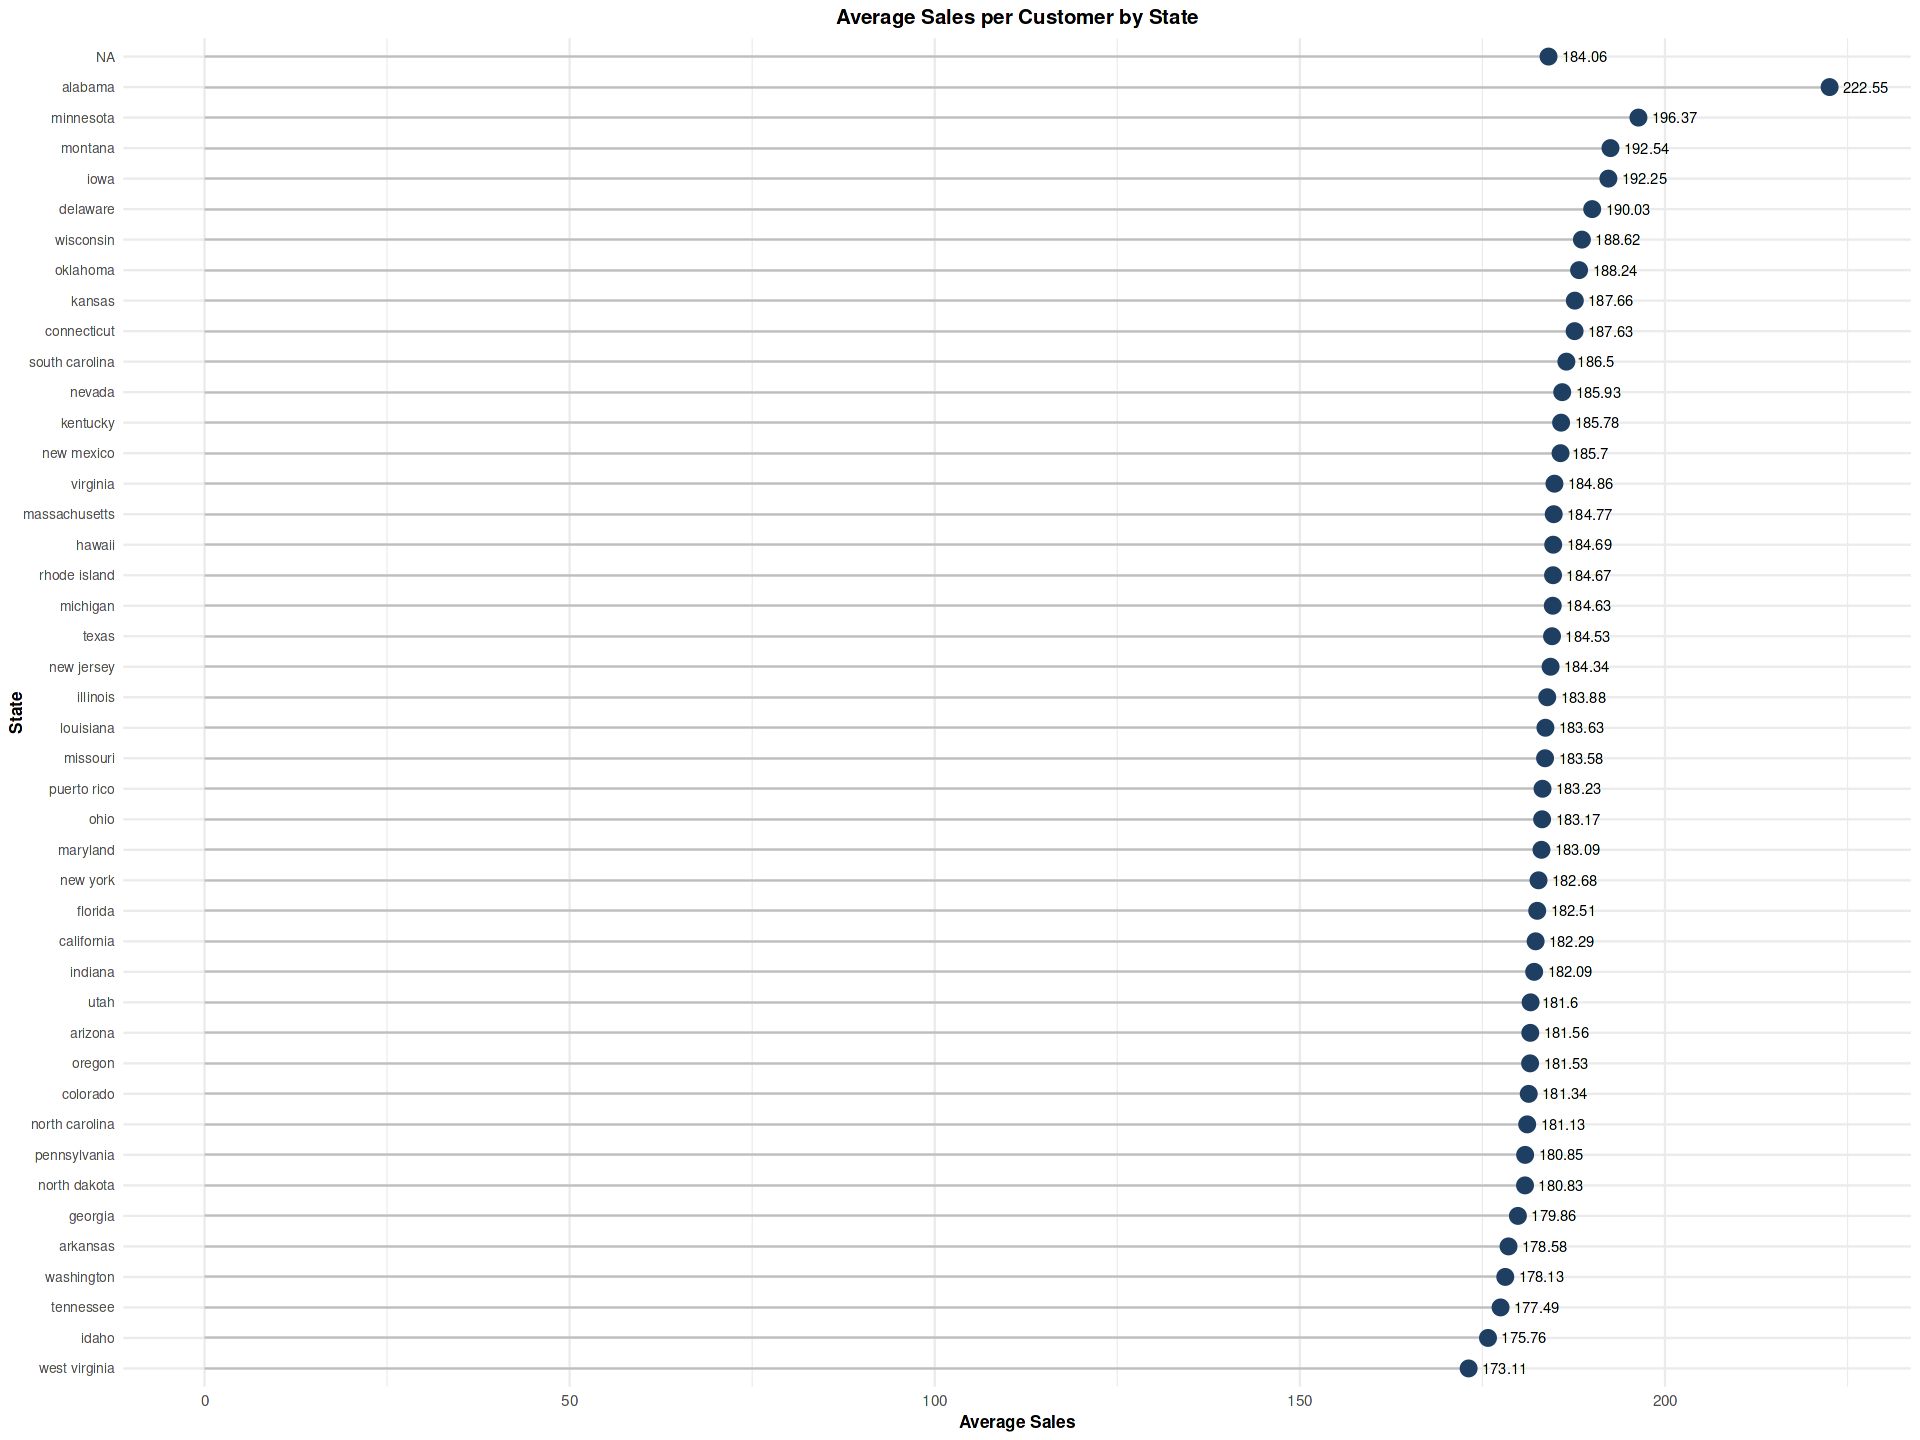

In [83]:
# Step 1: Create a conversion table for state abbreviations and full names
state_abbreviations <- data.frame(
  state = tolower(c(state.name, "puerto rico")),  # Add "Puerto Rico" to U.S. state names
  abb = c(state.abb, "PR")  # Add "PR" abbreviation for Puerto Rico
)

# Step 2: Summarizing average sales per customer by state
# Merge the conversion table with your data to get full state names
state_sales <- df %>%
  left_join(state_abbreviations, by = c("Customer.State" = "abb")) %>%  # Convert abbreviations to full names
  group_by(state) %>%  # Group by the full state name now
  summarise(avg_sales = mean(Sales.per.customer, na.rm = TRUE)) %>%
  arrange(desc(avg_sales))  # Order states by average sales

# Step 3: Create a lollipop chart
ggplot(state_sales, aes(x = reorder(state, avg_sales), y = avg_sales)) +
  geom_segment(aes(x = reorder(state, avg_sales), xend = reorder(state, avg_sales), 
                   y = 0, yend = avg_sales), color = "gray") +  # Lollipop stick
  geom_point(color = FILL_COLOR, size = 4) +  # Lollipop circle
  geom_text(aes(label = round(avg_sales, 2)), hjust = -0.3, size = 3) +  # Add text labels
  labs(title = "Average Sales per Customer by State", y = "Average Sales", x = "State") +
  coord_flip() +  # Flip the chart for better readability
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 8),  # Adjust y-axis text size for readability
    axis.title.x = element_text(size = 10, face = "bold"),  # Bold x-axis title
    axis.title.y = element_text(size = 10, face = "bold"),  # Bold y-axis title
    plot.title = element_text(size = 12, face = "bold", hjust = 0.5)  # Title centered and bold
  )

## **Customer Retention and Delivery Performance**

Analyze how late delivery risk impacts customer segments or geographic areas. This is essential for improving service quality and customer satisfaction.

---
- Which customer segments have the highest late delivery risk?

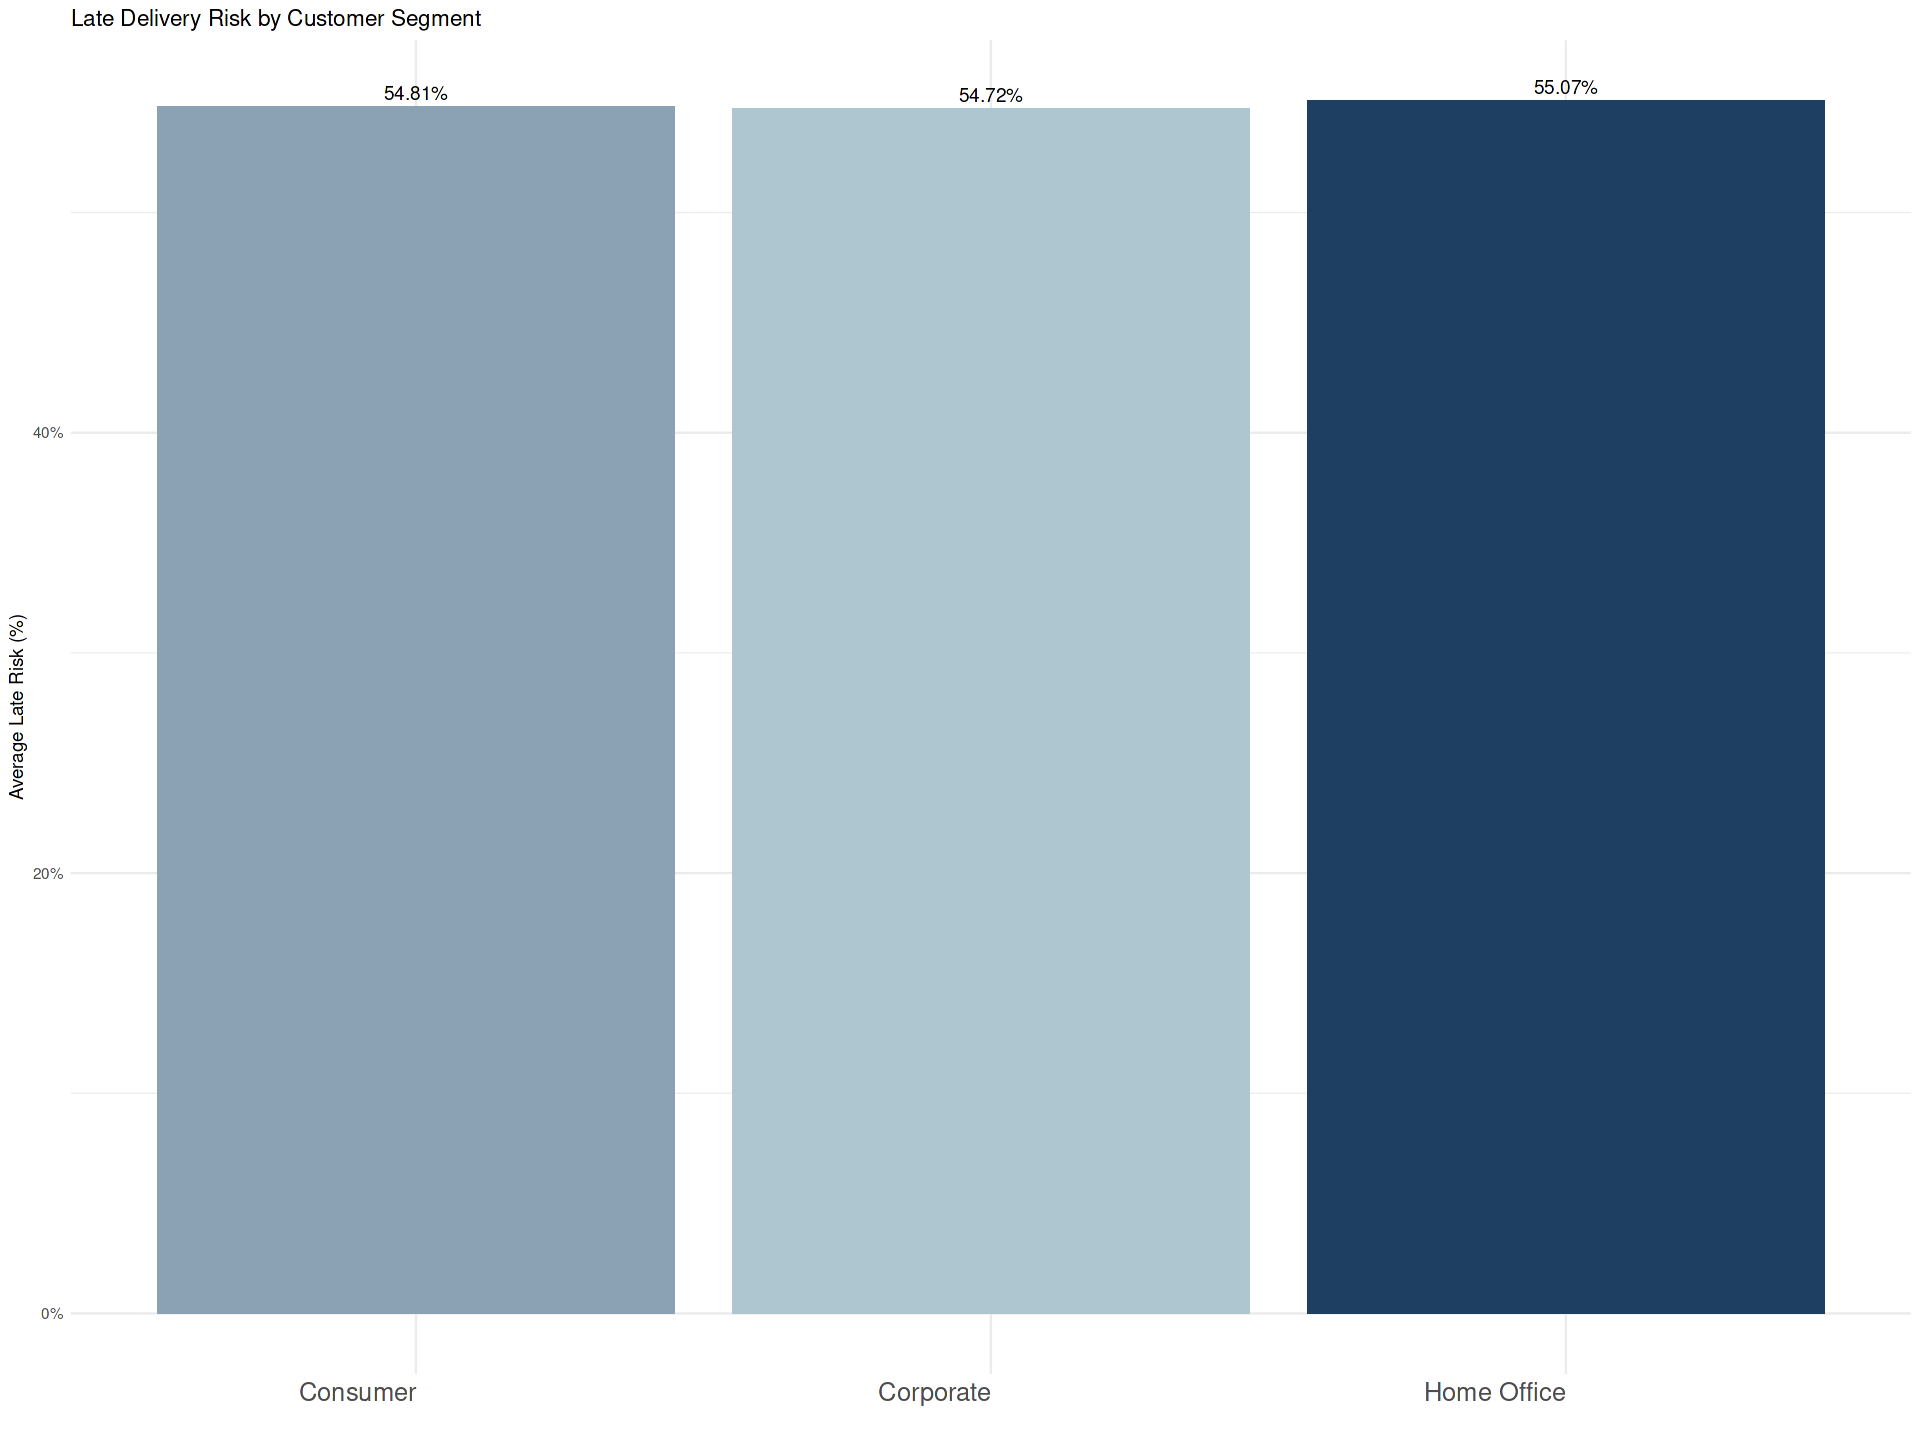

In [84]:
# Calculate average late delivery risk by customer segment
segment_late_risk <- df %>%
  group_by(Customer.Segment) %>%
  summarise(late_risk = mean(Late_delivery_risk, na.rm = TRUE)) %>%
  ungroup()

# Plotting the average late delivery risk with a heatmap effect
ggplot(segment_late_risk, aes(x = Customer.Segment, y = late_risk, fill = late_risk)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = scales::percent(late_risk, accuracy = 0.01)), vjust = -0.5) +  # Formatting the label as percentage
  labs(title = "Late Delivery Risk by Customer Segment", 
       y = "Average Late Risk (%)",  # Updated y-axis label
       x = "") +
  scale_y_continuous(labels = scales::percent) +  # Formatting y-axis as percentage
  scale_fill_gradient(low = "#AEC6CF", high = "#1E3E62") +  # Heatmap effect with gradient
  theme_minimal() +
  theme(axis.text.x = element_text(hjust = 1, size = 15)) +
  theme(
    legend.position = "none"
  )

## **Customer Profitability**

Understanding how much profit each customer generates is essential to focus on high-value customers.

---
- Top 10 customer cities by total profit?

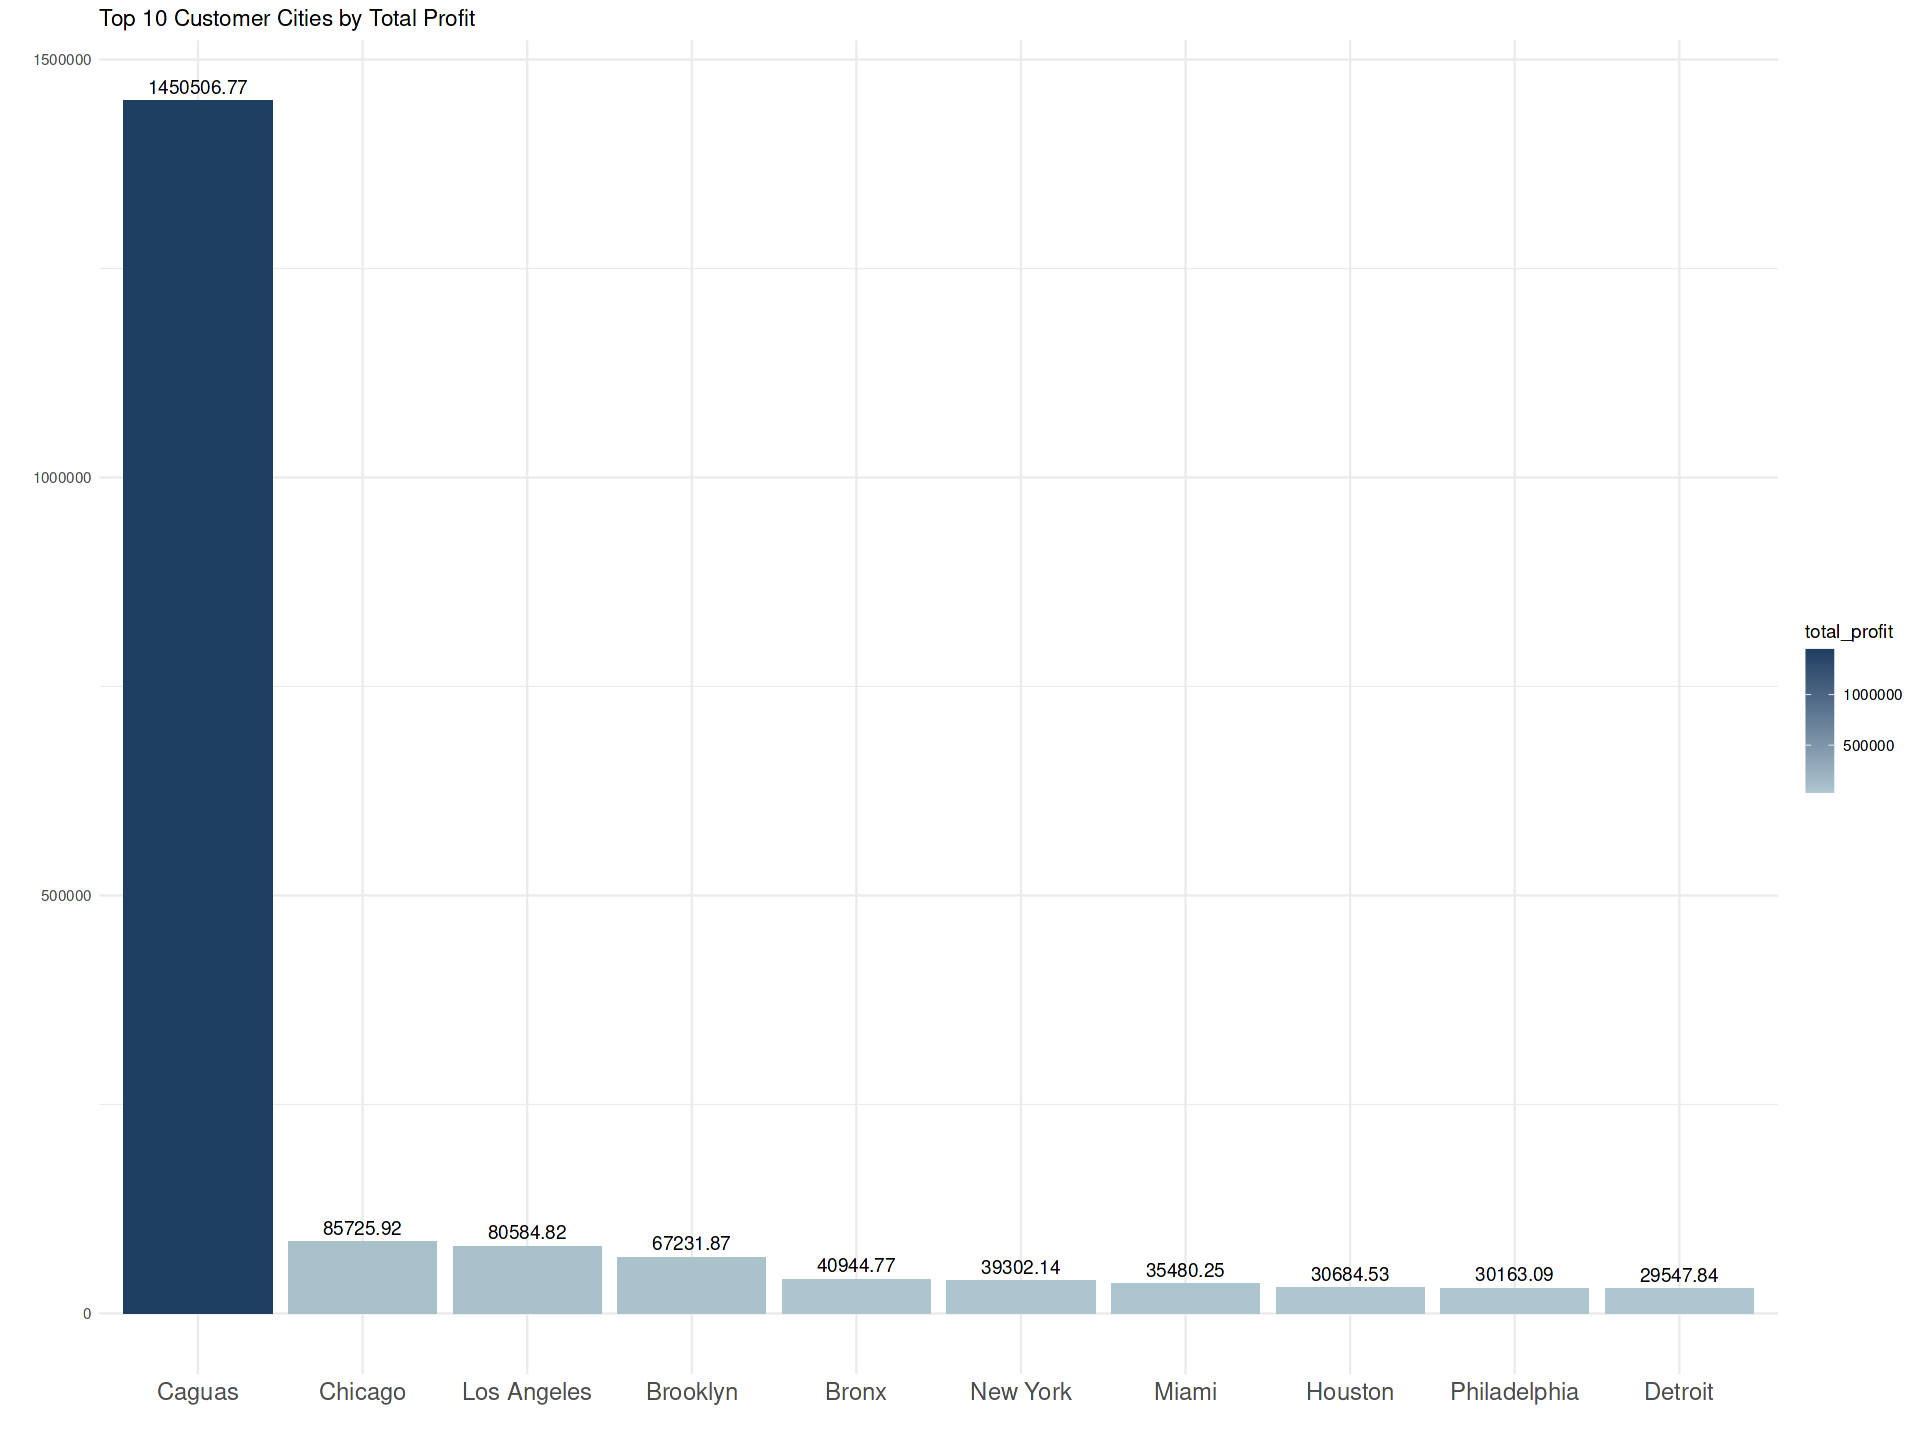

In [85]:
# Create a palette based on the base color #1E3E62
base_color <- "#1E3E62"
palette <- colorRampPalette(c(base_color, "#AEC6CF", "#D9EAD3", "#FFE599", "#B6D7A8"))(10)

# Create the top_customers dataframe
top_customers <- df %>%
  group_by(Customer.City) %>%
  summarise(total_profit = sum(Order.Profit.Per.Order, na.rm = TRUE)) %>%
  arrange(desc(total_profit)) %>%
  head(10)

# Plot with a heatmap effect using a gradient
ggplot(top_customers, aes(x = reorder(Customer.City, -total_profit), y = total_profit, fill = total_profit)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = round(total_profit, 2)), vjust = -0.5) +
  labs(title = "Top 10 Customer Cities by Total Profit", y = "", x = "") +
  scale_fill_gradient(low = "#AEC6CF", high = base_color) +  # Heatmap effect with gradient
  theme_minimal() +
  theme(axis.text.x = element_text(hjust = 0.5, size = 14))

# **Product Analysis**

Product analysis helps businesses understand the performance of their products and identify opportunities for improvement or expansion. 

---
- Top 10 Categories by Profit

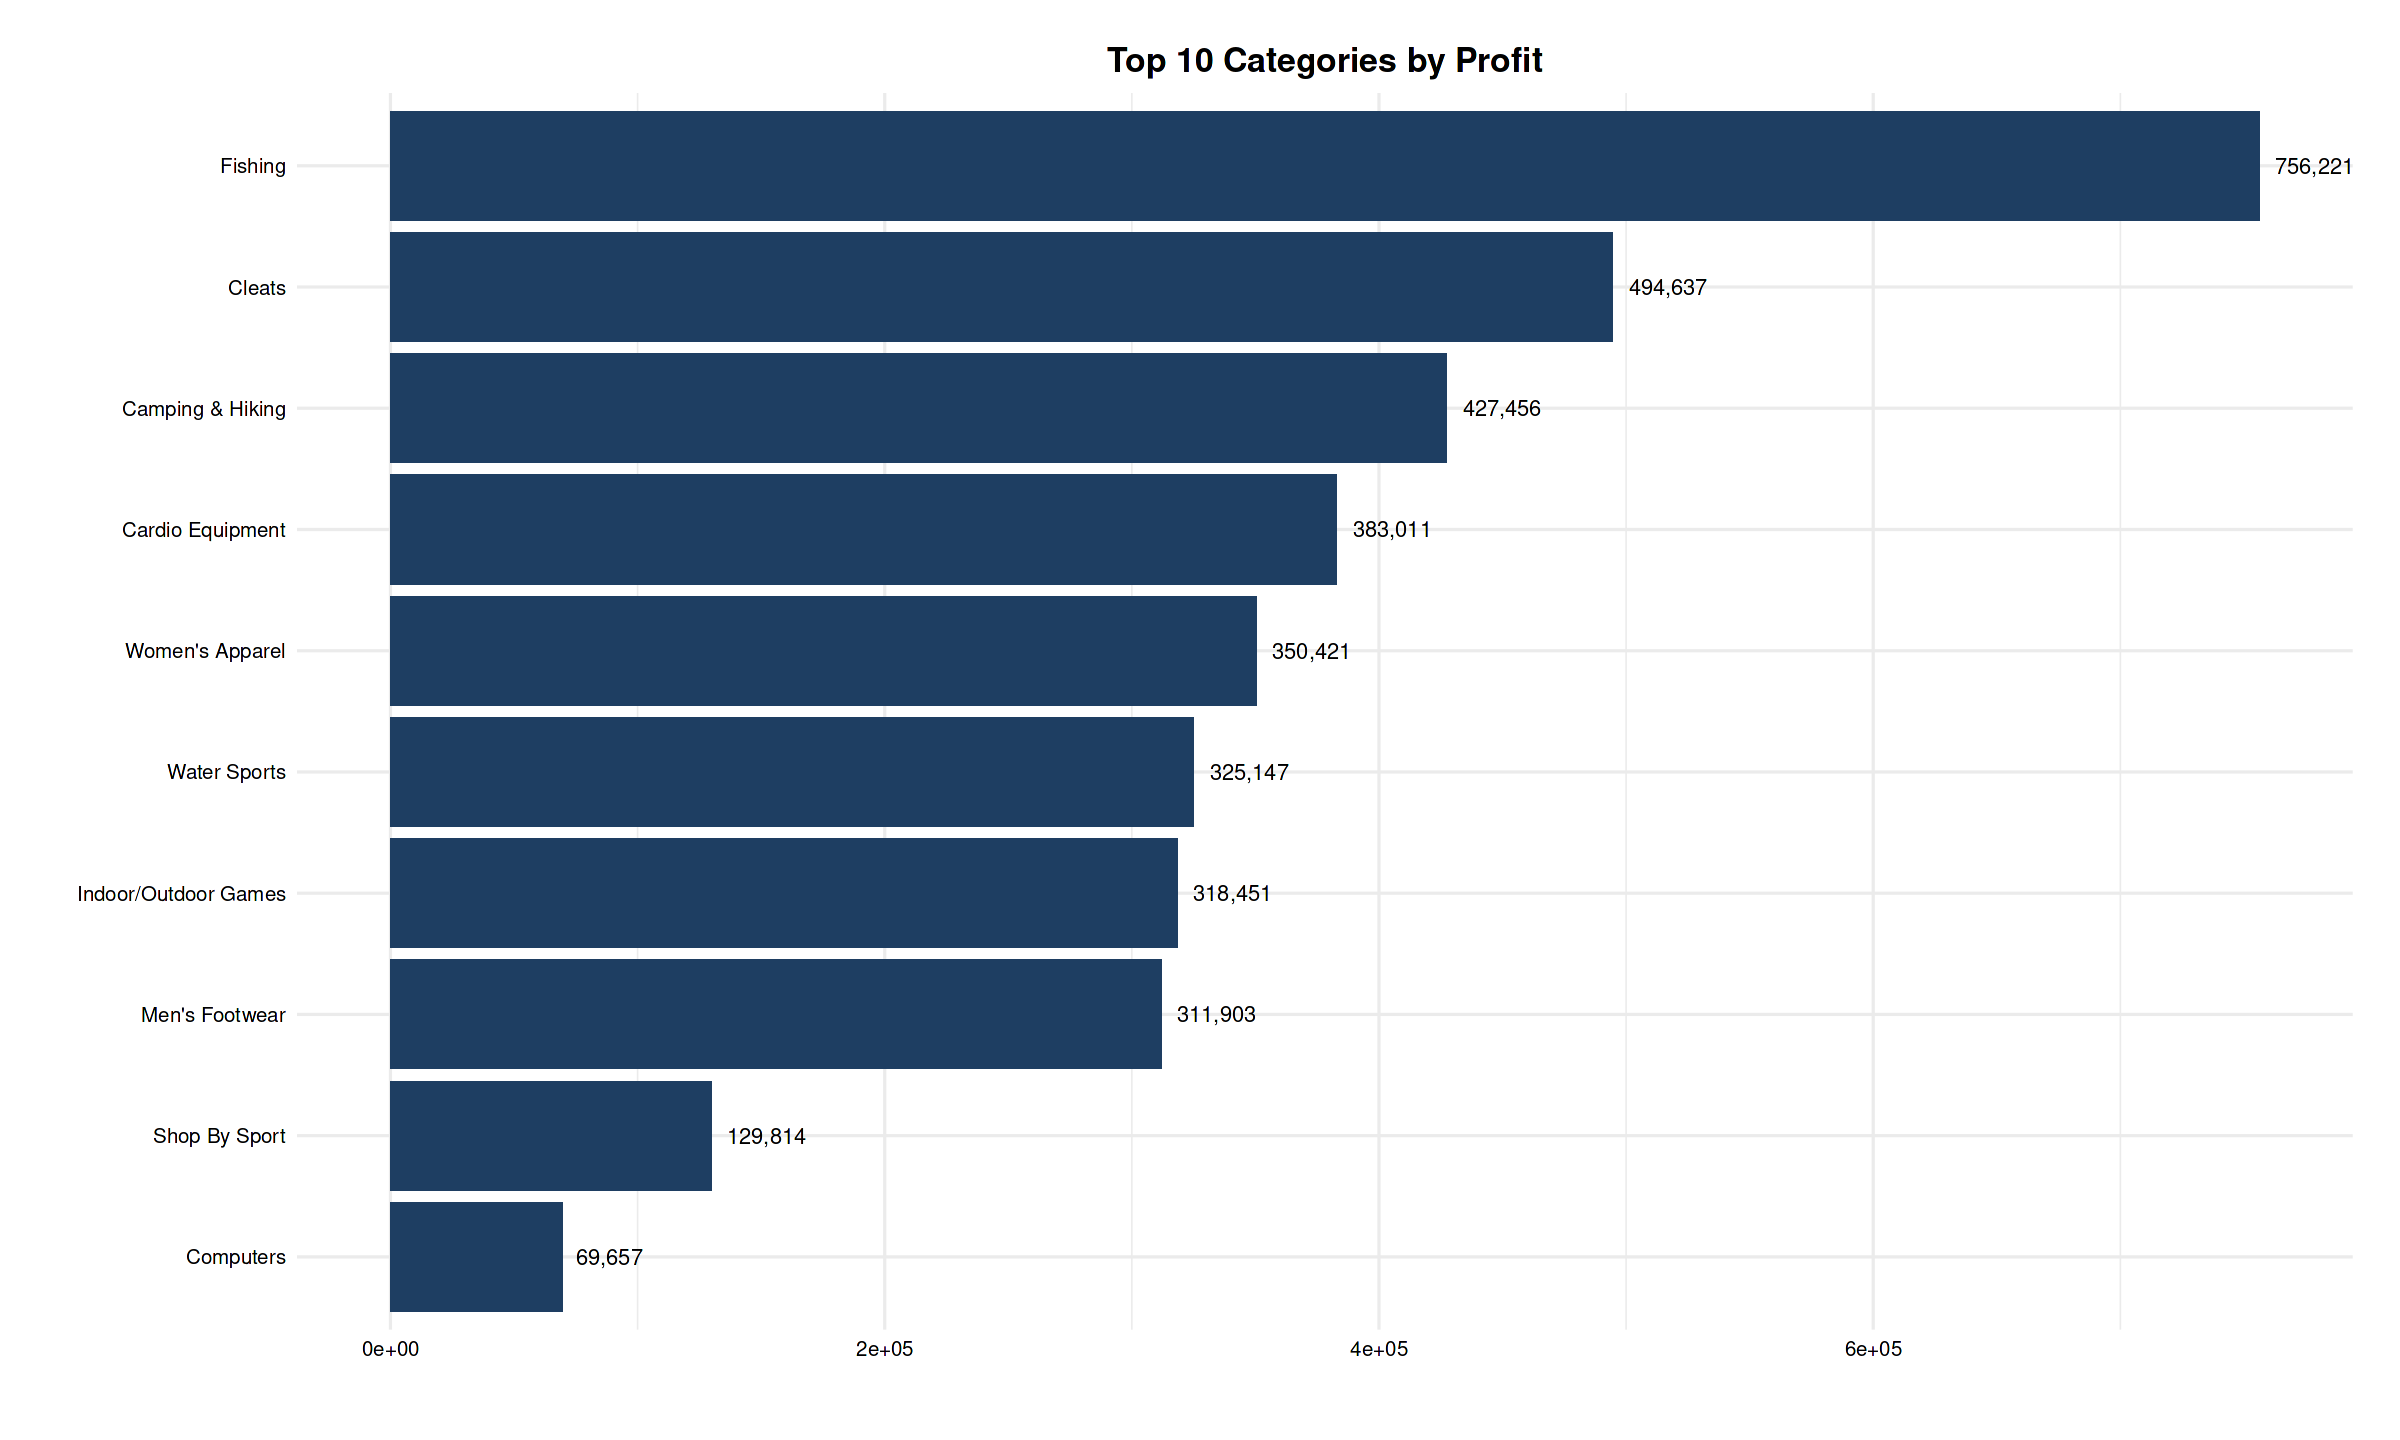

In [86]:
options(repr.plot.width = 20, repr.plot.height = 12)

# Summarize profit by category and limit to top 10
category_profit <- df %>%
  group_by(Category.Name) %>%
  summarize(Total_Profit = sum(Order.Profit.Per.Order, na.rm = TRUE)) %>%
  arrange(desc(Total_Profit)) %>%
  head(10)  # Limit to top 10

# Plot top 10 categories by profit with numbers formatted using scales
ggplot(category_profit, aes(x = reorder(Category.Name, Total_Profit), y = Total_Profit)) +
  geom_bar(stat = "identity", fill = FILL_COLOR) +  # Custom color
  geom_text(aes(label = scales::comma(Total_Profit)), hjust = -0.2, size = 4.5, color = "black") +  # Add numbers
  coord_flip() +
  theme_minimal(base_size = 15) +  # Modern theme with larger text
  labs(title = "Top 10 Categories by Profit",
       x = "", 
       y = "") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
        axis.title.x = element_text(face = "bold"),
        axis.title.y = element_text(face = "bold"),
        axis.text = element_text(color = "black"),
        plot.margin = unit(c(1, 1, 1, 1), "cm"))

---
- Top 10 Products by Sales

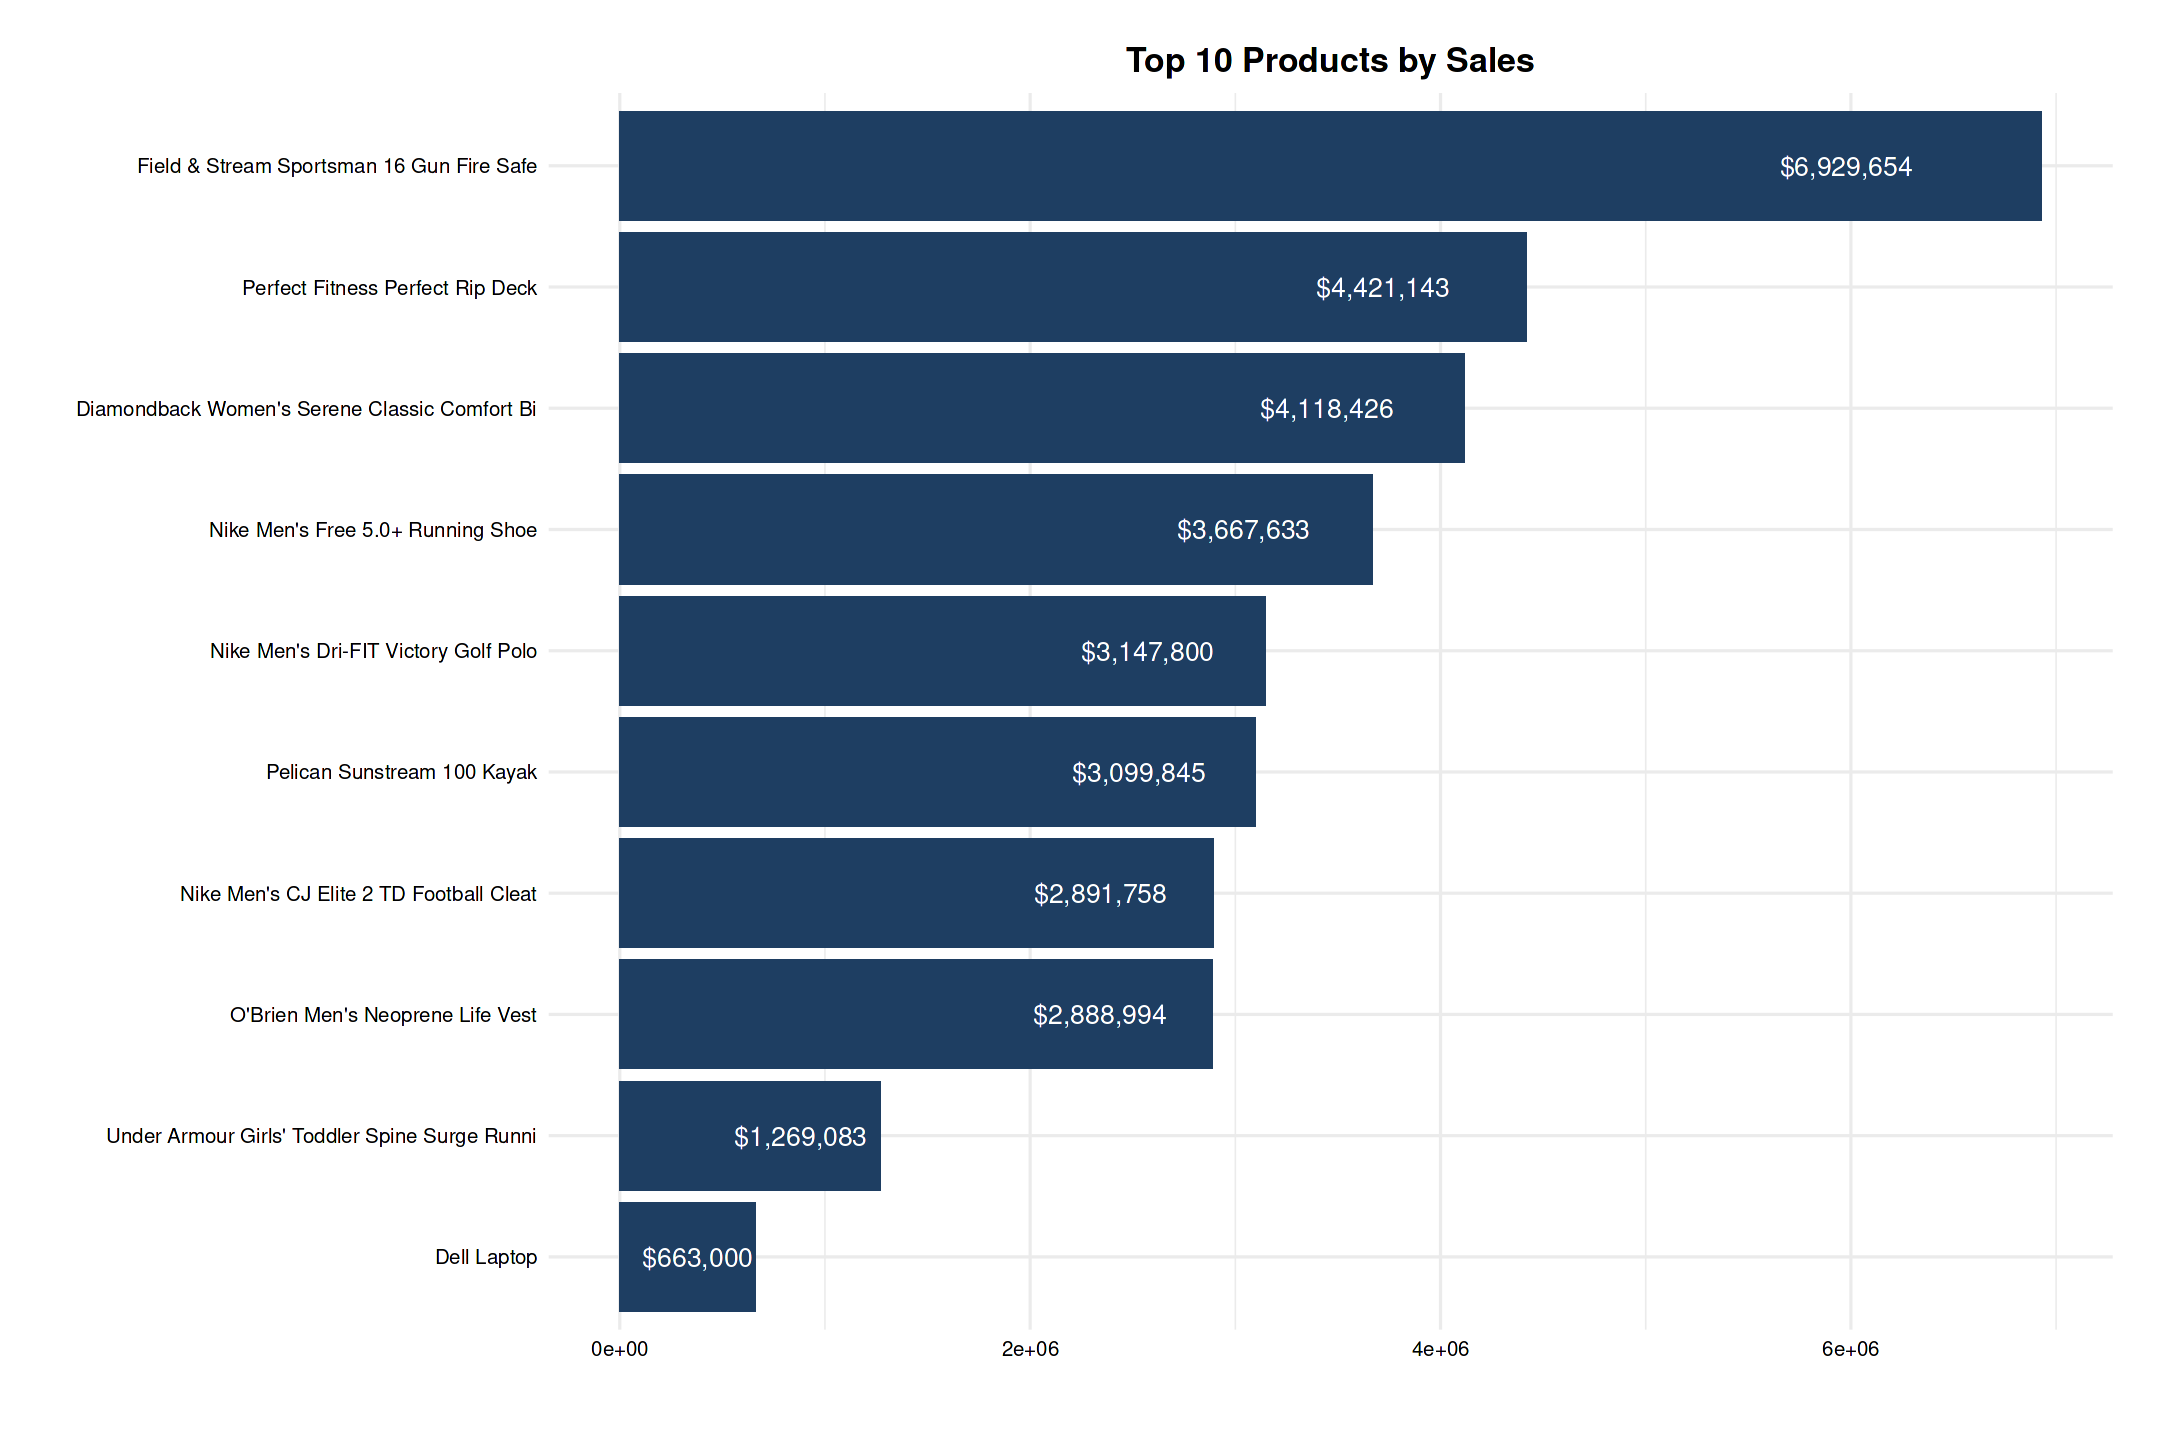

In [87]:
options(repr.plot.width = 18, repr.plot.height = 12)

# Summarize total sales by product and limit to top 10
product_sales <- df %>%
  group_by(Product.Name) %>%
  summarize(Total_Sales = sum(Sales, na.rm = TRUE)) %>%
  arrange(desc(Total_Sales)) %>%
  head(10)  # Limit to top 10

# Plot top 10 products by sales with numbers inside bars
ggplot(product_sales, aes(x = reorder(Product.Name, Total_Sales), y = Total_Sales)) +
  geom_bar(stat = "identity", fill = FILL_COLOR) +  # Custom color
  geom_text(aes(label = scales::dollar(Total_Sales, prefix = "$", accuracy = 1)), hjust = 0.9, size = 5.5, color = "white", position = position_stack(vjust = 0.9)) +  # Labels inside bars
  coord_flip() +
  theme_minimal(base_size = 15) +  # Modern theme
  labs(title = "Top 10 Products by Sales",
       x = "", 
       y = "") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
        axis.title.x = element_text(face = "bold"),
        axis.title.y = element_text(face = "bold"),
        axis.text = element_text(color = "black"),
        plot.margin = unit(c(1, 1, 1, 1), "cm"))


---
- Total Profit by Customer City

In [88]:
library(leaflet)

# Prepare the customer location data
location_data <- df %>%
  select(Customer.City, Customer.Country, Latitude, Longitude, Order.Profit.Per.Order) %>%
  group_by(Customer.City, Customer.Country, Latitude, Longitude) %>%
  summarize(Total_Profit = sum(Order.Profit.Per.Order, na.rm = TRUE)) %>%
  ungroup()

# Create a color palette based on profit bins
mybins <- quantile(location_data$Total_Profit, probs = seq(0, 1, by = 0.2), na.rm = TRUE)
mypalette <- colorBin(palette = "YlOrBr", domain = location_data$Total_Profit, na.color = "transparent", bins = mybins)

# Prepare the text for the tooltips
mytext <- paste(
  "City: ", location_data$Customer.City, "<br/>",
  "Country: ", location_data$Customer.Country, "<br/>",
  "Total Profit: $", round(location_data$Total_Profit, 2), sep=""
) %>% lapply(htmltools::HTML)

# Create the leaflet map
interactive_map <- leaflet(location_data) %>%
  addTiles() %>%
  setView(lat = mean(location_data$Latitude, na.rm = TRUE), 
          lng = mean(location_data$Longitude, na.rm = TRUE), 
          zoom = 2) %>%
  addProviderTiles("Esri.WorldImagery") %>%
  addCircleMarkers(~Longitude, ~Latitude,
    fillColor = ~mypalette(Total_Profit), fillOpacity = 0.7, color = "white", radius = 8, stroke = FALSE,
    label = mytext,
    labelOptions = labelOptions(style = list("font-weight" = "normal", padding = "3px 8px"), textsize = "13px", direction = "auto")
  ) %>%
  addLegend(pal = mypalette, values = ~Total_Profit, opacity = 0.9, title = "Total Profit", position = "bottomright")

`summarise()` has grouped output by 'Customer.City', 'Customer.Country',
'Latitude'. You can override using the `.groups` argument.


In [89]:
# Display the interactive map
# interactive_map

---
- Top 10 Products by Quantity Ordered

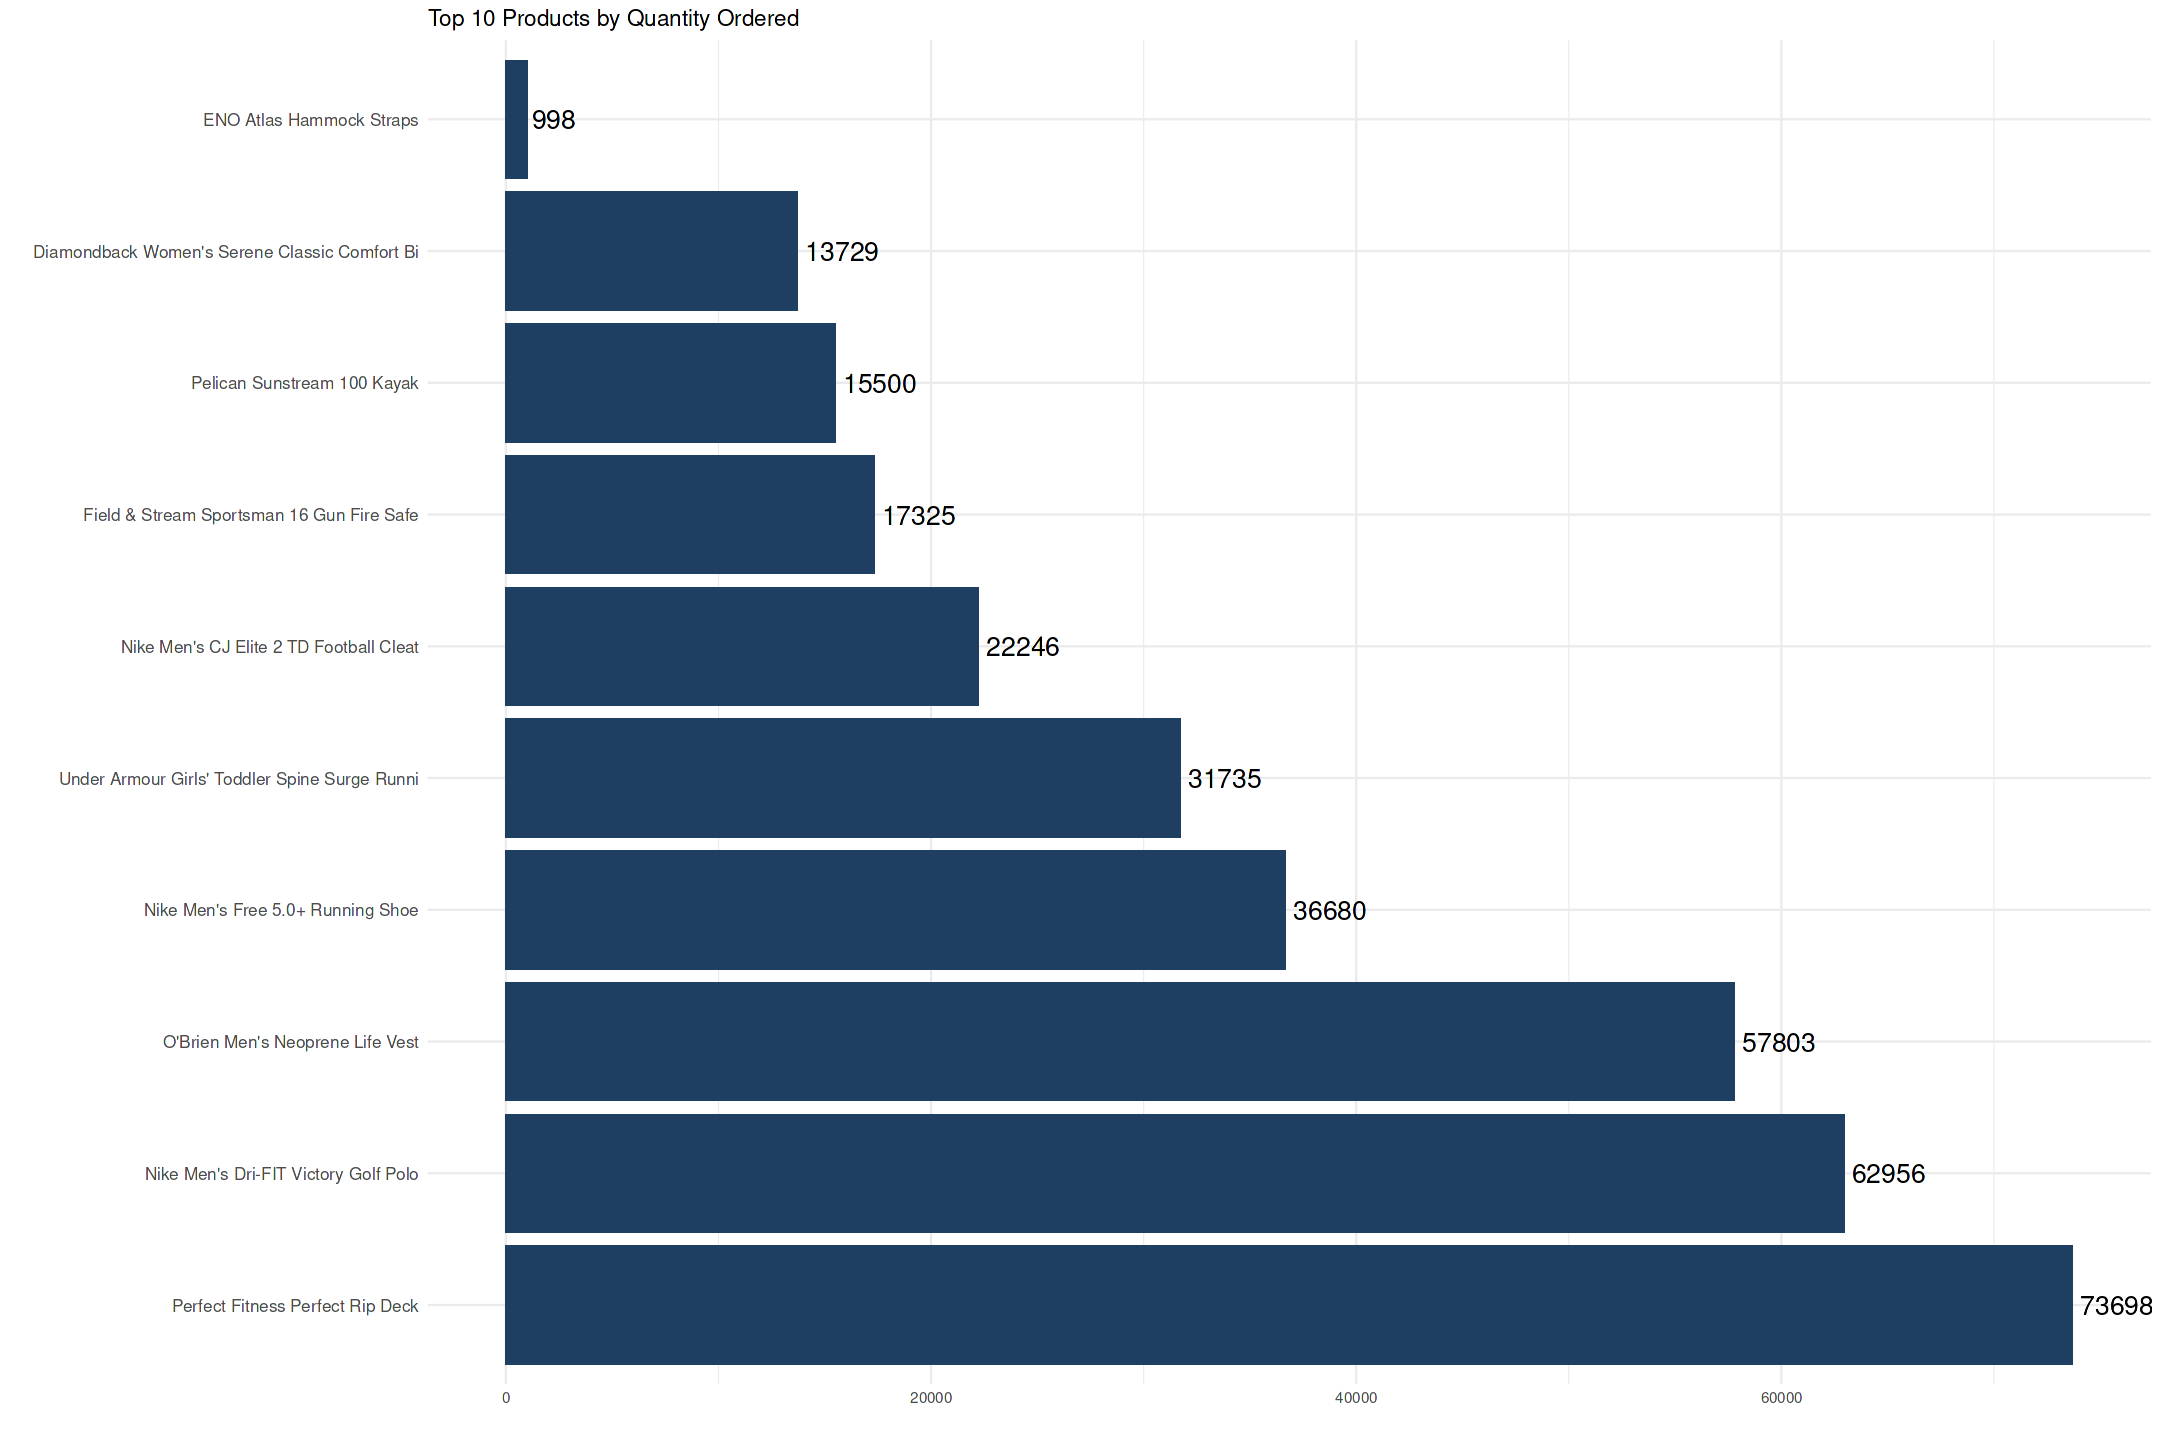

In [90]:
# Group by Product.Name and calculate total quantity for each product
top_products <- df %>%
  group_by(Product.Name) %>%
  summarise(Total.Quantity = sum(Order.Item.Quantity)) %>%
  arrange(desc(Total.Quantity)) %>%
  head(10)  # Keep only the top 10 products

# Create a bar plot using ggplot2
ggplot(top_products, aes(x = reorder(Product.Name, -Total.Quantity), y = Total.Quantity)) +
  geom_bar(stat = "identity", fill = FILL_COLOR) +
  geom_text(aes(label = Total.Quantity), hjust = -0.1, size = 5.5, color = "black", position = position_stack(vjust = 1.0)) +  # Labels inside bars
  coord_flip() +  # Flip coordinates to make it easier to read
  labs(title = "Top 10 Products by Quantity Ordered",
       x = "",
       y = "") +
  theme_minimal() +
  theme(axis.text.y = element_text(hjust = 1, size = 10))

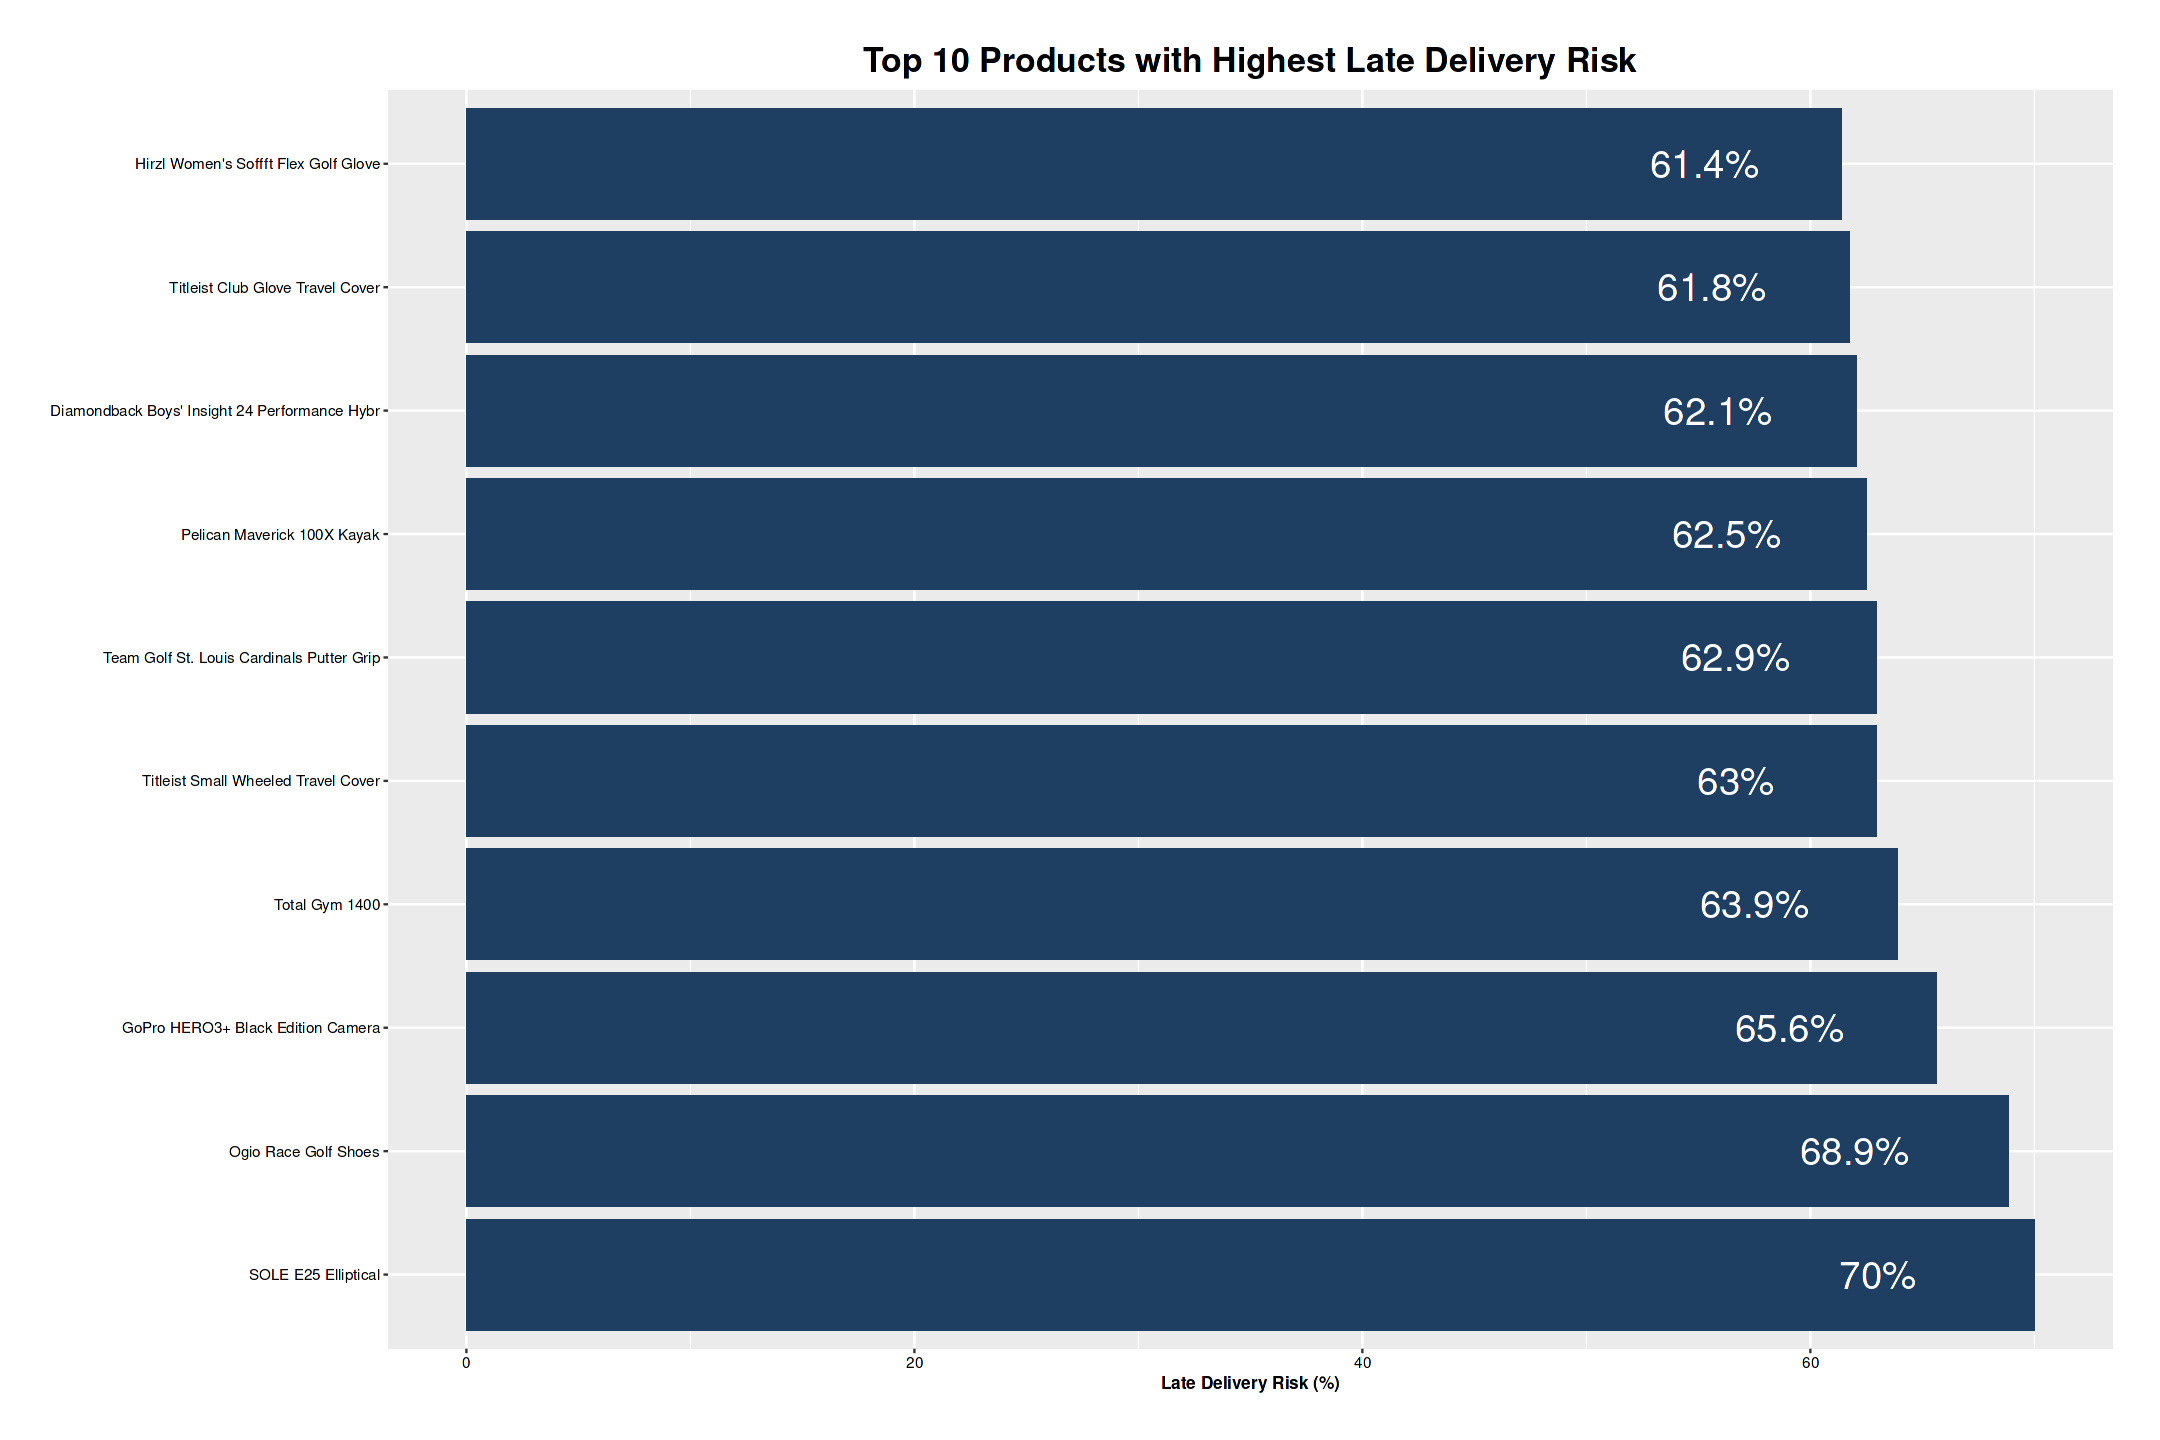

In [91]:
# Group by Product.Name and calculate total orders and late delivery risks
top_risk_products <- df %>%
  group_by(Product.Name) %>%
  summarise(Total.Orders = n(),
            Late.Orders = sum(Late_delivery_risk)) %>%
  mutate(Percent.Late.Risk = (Late.Orders / Total.Orders) * 100) %>%
  arrange(desc(Percent.Late.Risk)) %>%
  head(10)  # Select top 10 products with highest late risk percentage

# Visualize the top products with percentage of late delivery risk and show percentages inside the bars
ggplot(top_risk_products, aes(x = reorder(Product.Name, -Percent.Late.Risk), y = Percent.Late.Risk)) +
  geom_bar(stat = "identity", fill = FILL_COLOR) +
  geom_text(aes(label = paste0(round(Percent.Late.Risk, 1), "%")), 
            position = position_stack(vjust = 0.9), size = 8, color = "white") +  # Display percentage inside the bars
  coord_flip() +  # Flip coordinates for readability
  labs(title = "Top 10 Products with Highest Late Delivery Risk",
       x = "",
       y = "Late Delivery Risk (%)") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
        axis.title.x = element_text(face = "bold", size = 10),
        axis.title.y = element_text(face = "bold", size = 10),
        axis.text = element_text(color = "black"),
        plot.margin = unit(c(1, 1, 1, 1), "cm"))

---
- The most shipping duration of products

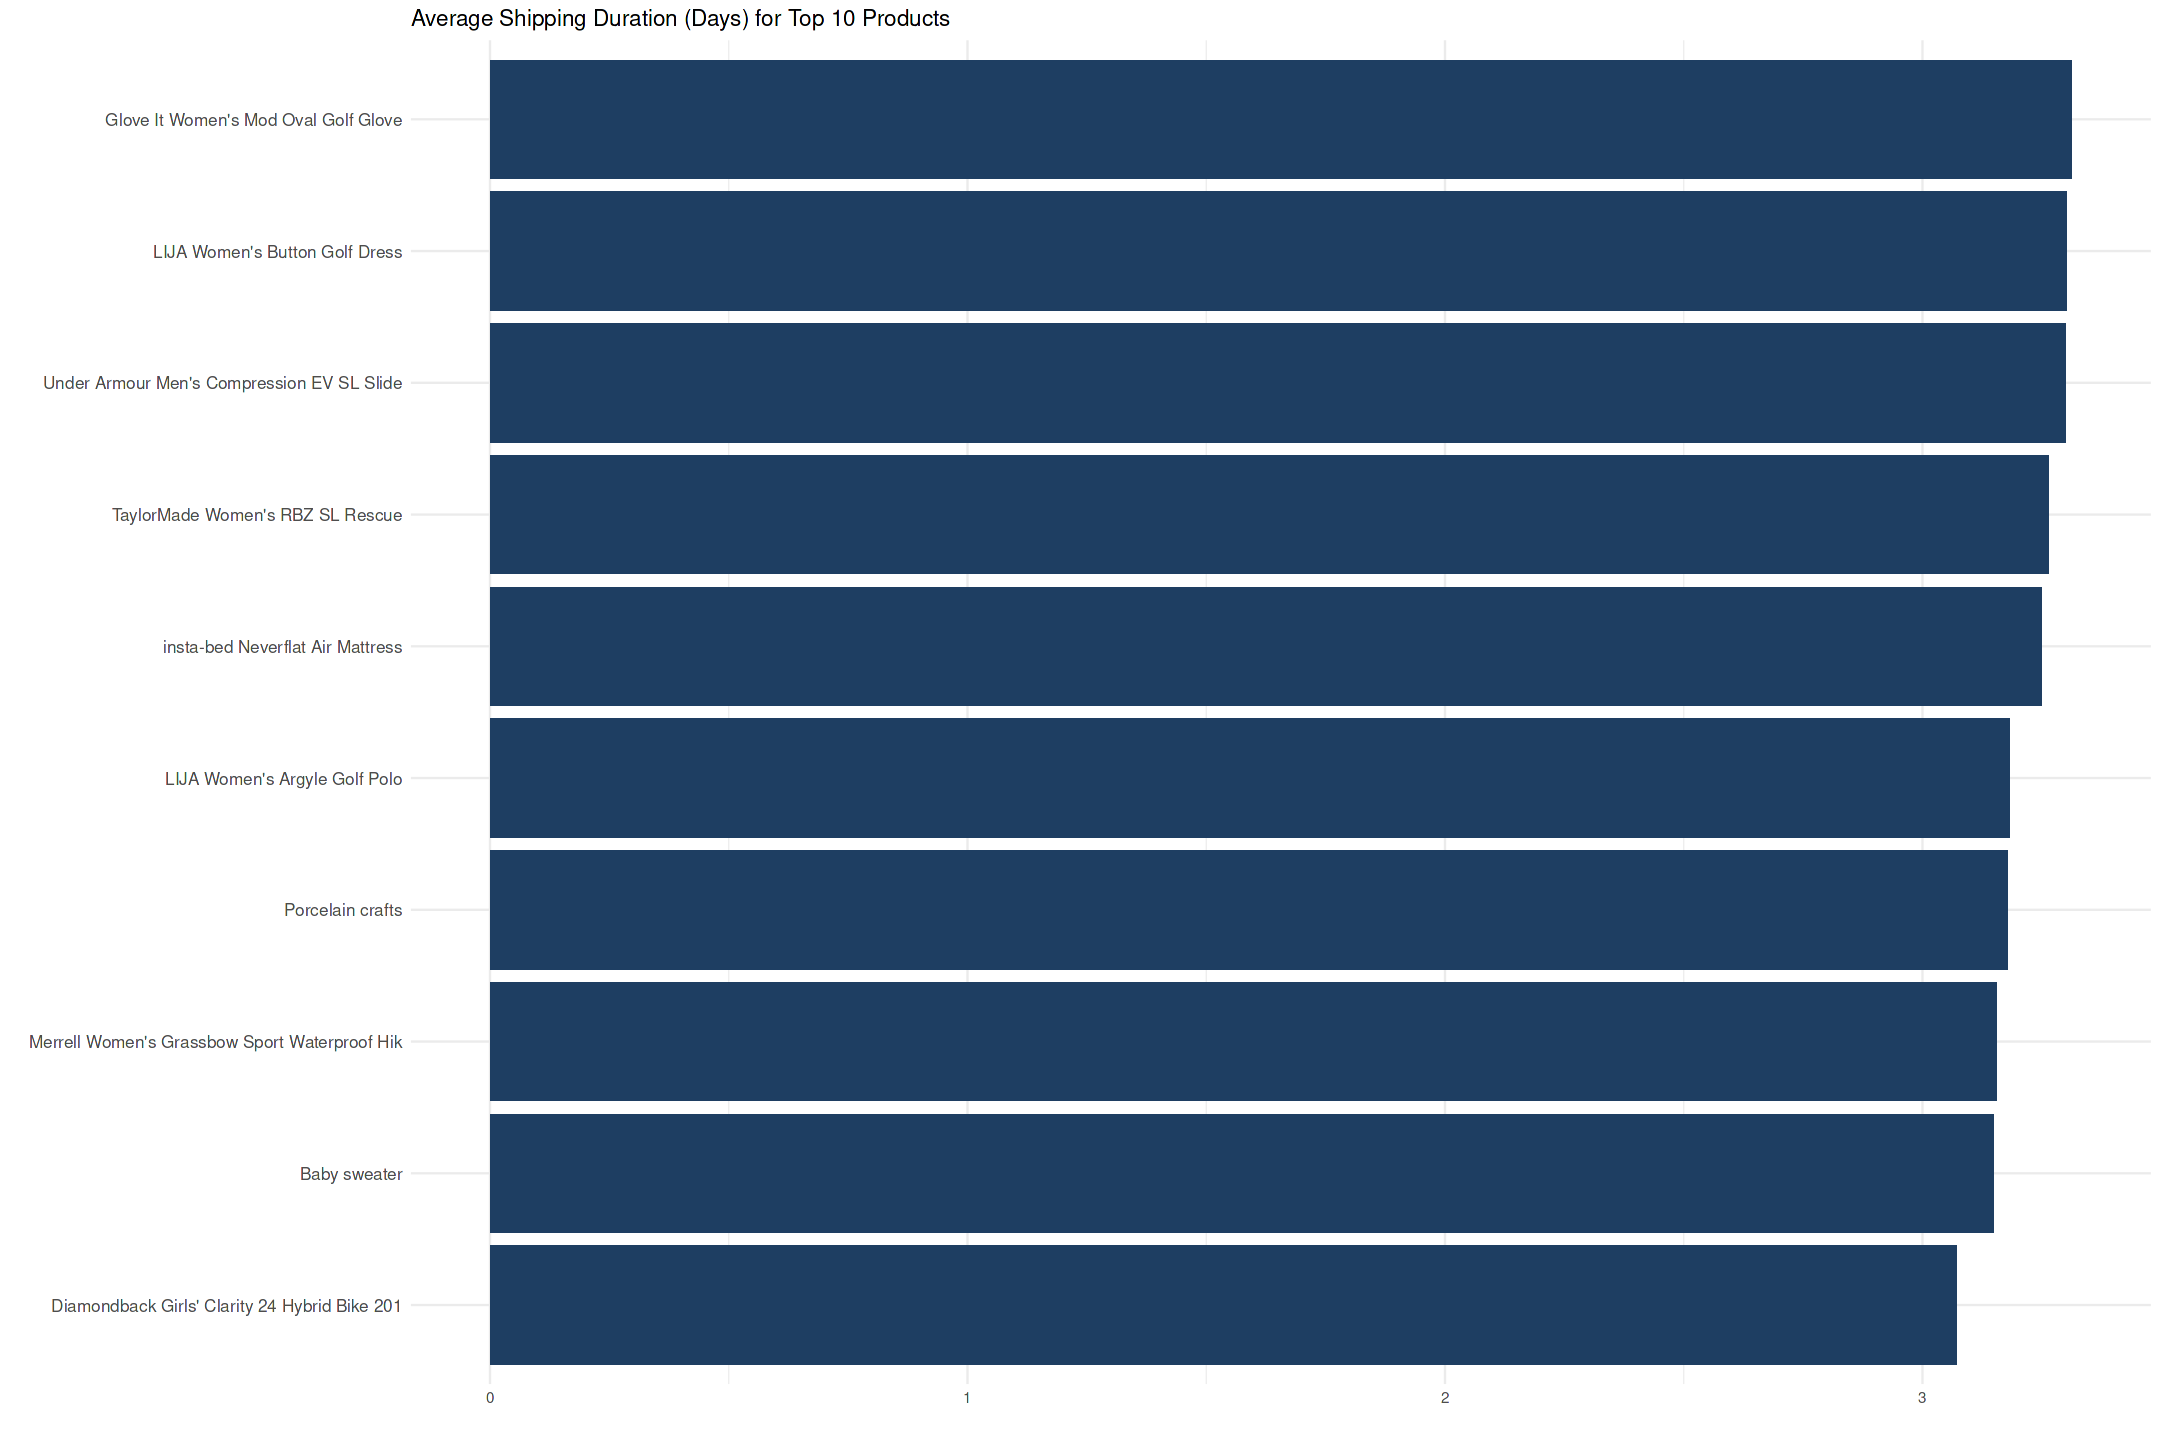

In [92]:
df <- df %>% filter(shipping_duration >= 0)


top_shipping_duration <- filtered_df %>%
  group_by(Product.Name) %>%
  summarise(Avg.Shipping.Duration = mean(shipping_duration, na.rm = TRUE)) %>%
  arrange(Avg.Shipping.Duration) %>%
  head(10)

# Visualize the average shipping duration for the top products
ggplot(top_shipping_duration, aes(x = reorder(Product.Name, Avg.Shipping.Duration), y = Avg.Shipping.Duration)) +
  geom_bar(stat = "identity", fill = FILL_COLOR) +
  coord_flip() +  # Flip coordinates for readability
  labs(title = "Average Shipping Duration (Days) for Top 10 Products",
       x = "",
       y = "") +
  theme_minimal() +
theme(axis.text.y = element_text(hjust = 1, size = 10))

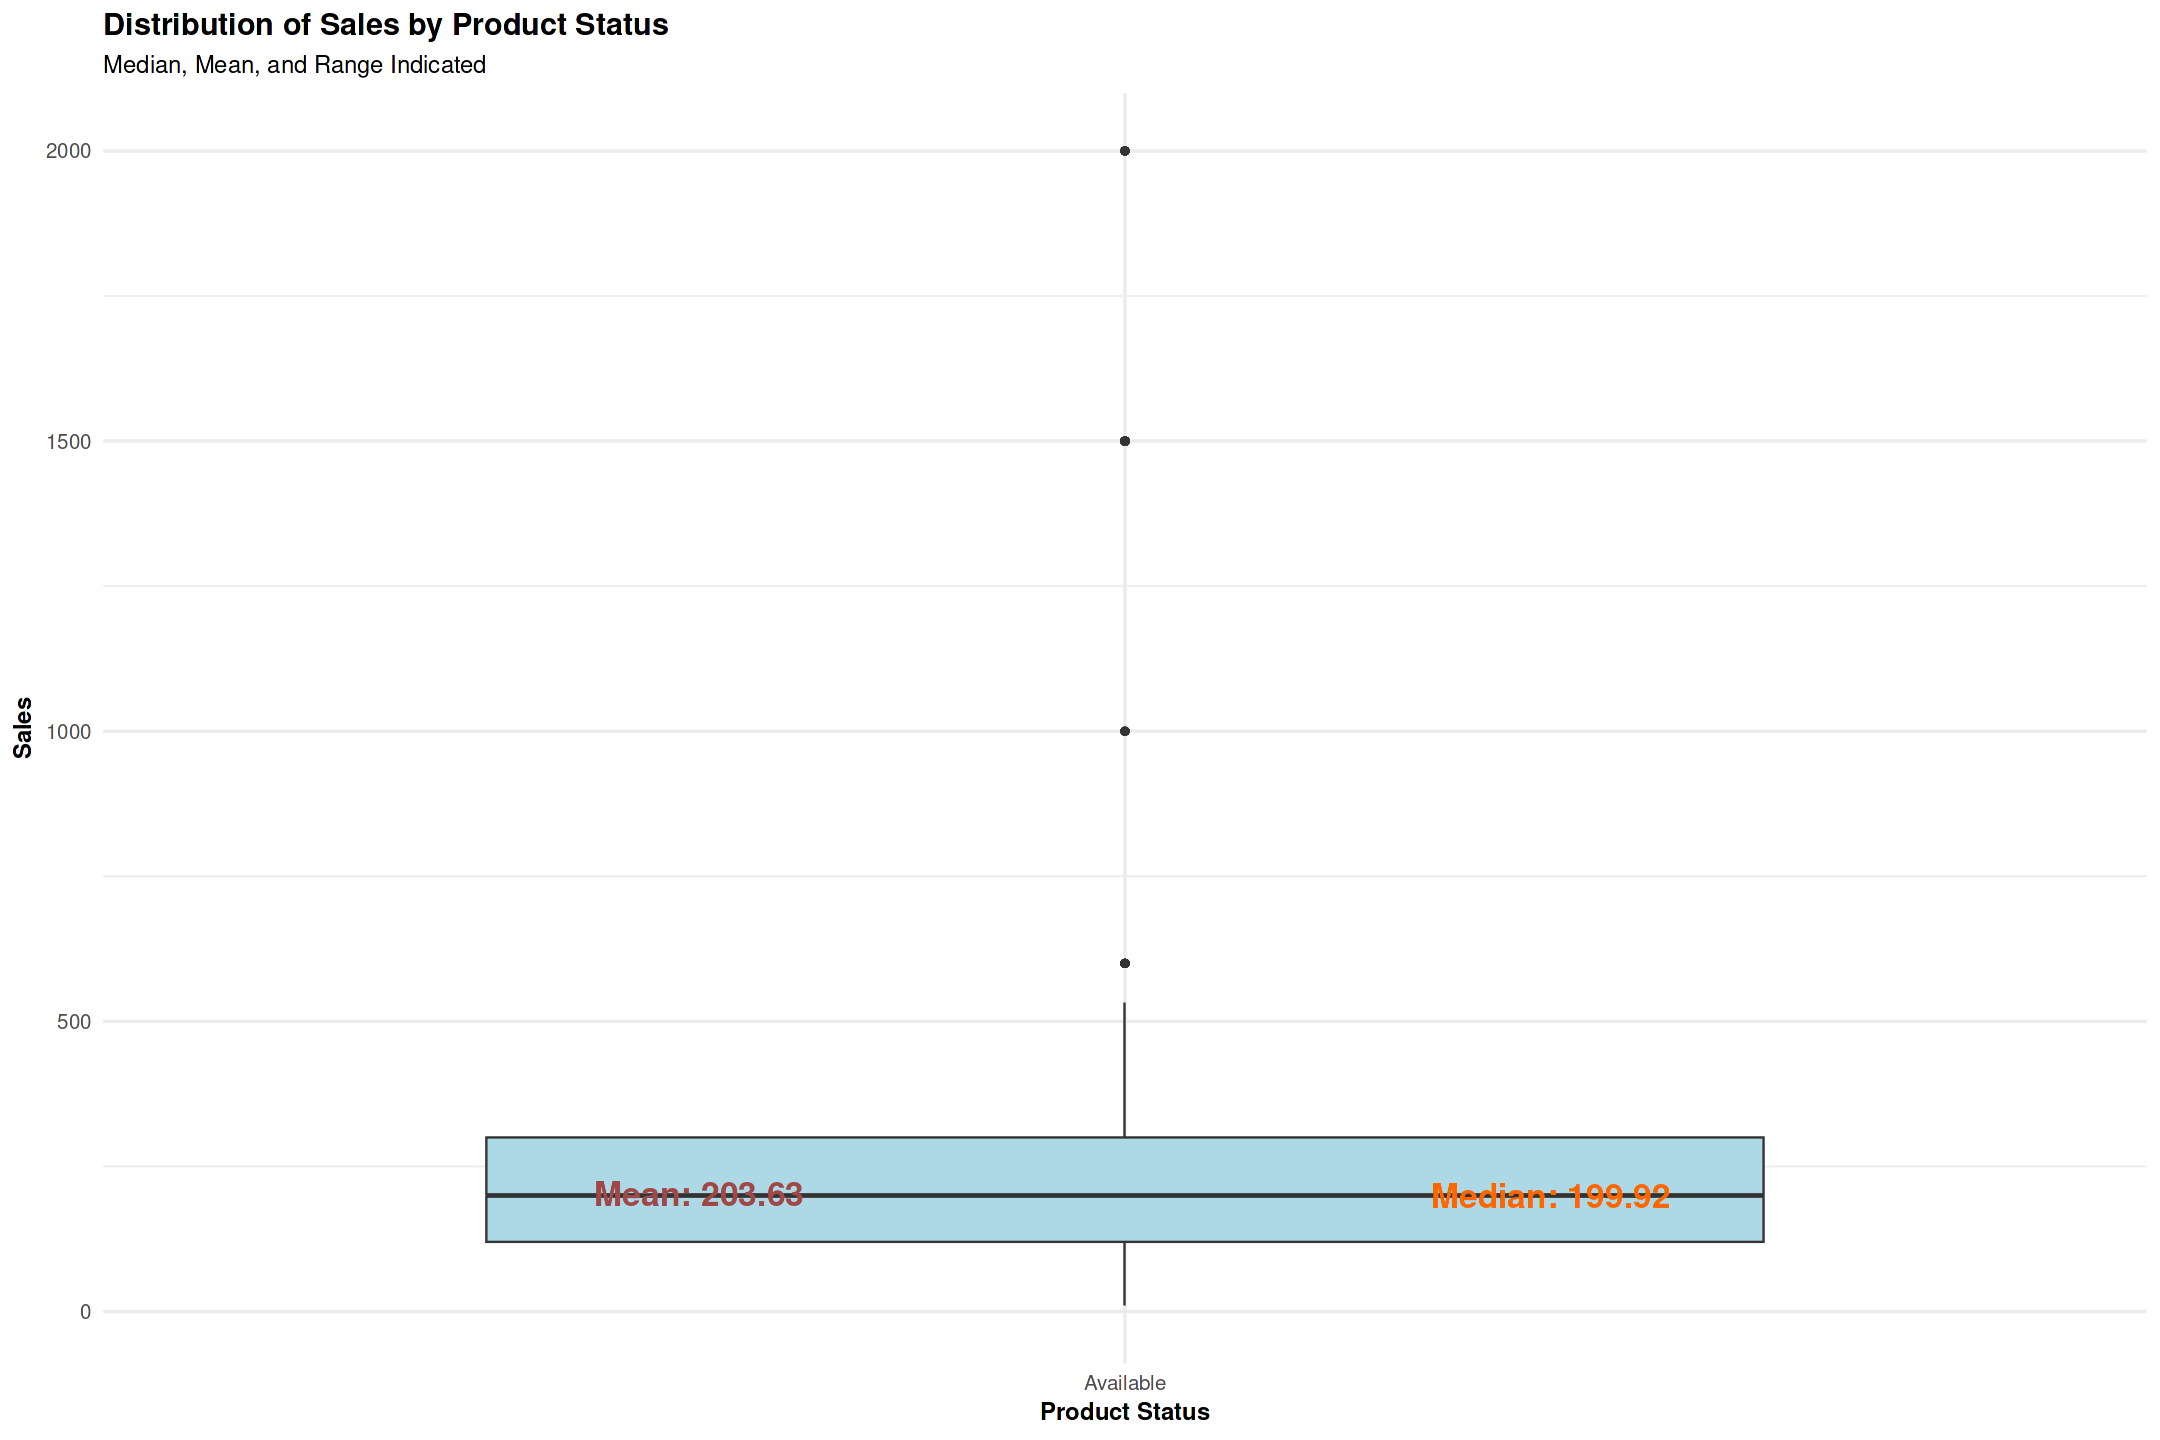

In [106]:
# Create a boxplot with larger and clearer labels
ggplot(df, aes(x = Product.Status, y = Sales)) +
  geom_boxplot(fill = "lightblue") +
  
  # Add median labels with larger font
  stat_summary(fun = median, geom = "text", aes(label = paste("Median:", round(..y.., 2))),
               position = position_nudge(x = 0.25), size = 7, color = "#FF6600", fontface = "bold") +
  
  # Add mean labels with larger font and a different color for contrast
  stat_summary(fun = mean, geom = "text", aes(label = paste("Mean:", round(..y.., 2))),
               position = position_nudge(x = -0.25), size = 7, color = "#A04747", fontface = "bold") +
  
  # Add whisker labels (min and max values) with distinct positioning and color
  stat_summary(fun.min = min, fun.max = max, geom = "text",
               aes(label = round(..y.., 2)),
               position = position_nudge(x = 0.35), size = 4, color = "blue", fontface = "italic") +
  
  # Add titles and labels
  labs(title = "Distribution of Sales by Product Status",
       subtitle = "Median, Mean, and Range Indicated",
       x = "Product Status",
       y = "Sales") +
  
  # Customize theme for larger text and better readability
  theme_minimal(base_size = 16) +
  theme(plot.title = element_text(face = "bold", size = 18),
        plot.subtitle = element_text(size = 14),
        axis.title.x = element_text(face = "bold", size = 14),
        axis.title.y = element_text(face = "bold", size = 14),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12))

# **Order Regions Analysis**

we can explore various questions related to order regions **(Order.Region)**, profit, sales, and delivery risk.

---
- Sales and Profit by Region

In [188]:
region_summary <- df %>%
  group_by(Order.Region) %>%
  summarise(
    Total_Sales = sum(Sales, na.rm = TRUE),
    Avg_Profit_Per_Order = mean(Order.Profit.Per.Order, na.rm = TRUE),
    Total_Late_Delivery_Risk = sum(Late_delivery_risk, na.rm = TRUE)
  )

# View the summary table
region_summary

Order.Region    Total_Sales Avg_Profit_Per_Order Total_Late_Delivery_Risk
1  Canada           183131.4   24.88179               458                   
2  Caribbean       1651019.3   20.65709              4415                   
3  Central Africa   317848.9   20.89522               940                   
4  Central America 5665712.1   21.74735             15518                   
5  Central Asia     107510.3   23.40565               296                   
6  East Africa      367815.8   23.83027              1008                   
7  East of USA     1371112.0   22.59773              3849                   
8  Eastern Asia    1440475.7   20.43763              3835                   
9  Eastern Europe   759065.4   20.02227              2143                   
10 North Africa     620190.1   20.25192              1706                   
11 Northern Europe 2155830.6   23.84095              5292                   
12 Oceania         1964354.4   20.00364              5336                   
13 South America   2960881.4   22.44087              8111                   
14 South Asia      1503933.2   20.99436              4234                   
15 South of  USA    785783.9   21.78365              2256                   
16 Southeast Asia  1864930.0   21.97137              5075                   
17 Southern Africa  223012.3   26.39865               597                   
18 Southern Europe 2047918.8   24.47558              5129                   
19 US Center       1151355.8   22.26843              3252                   
20 West Africa      704597.7   22.02077              1874                   
21 West Asia       1145444.1   19.70821              3261                   
22 West of USA     1571416.0   20.63564              4313                   
23 Western Europe  5892670.9   23.06363             15133

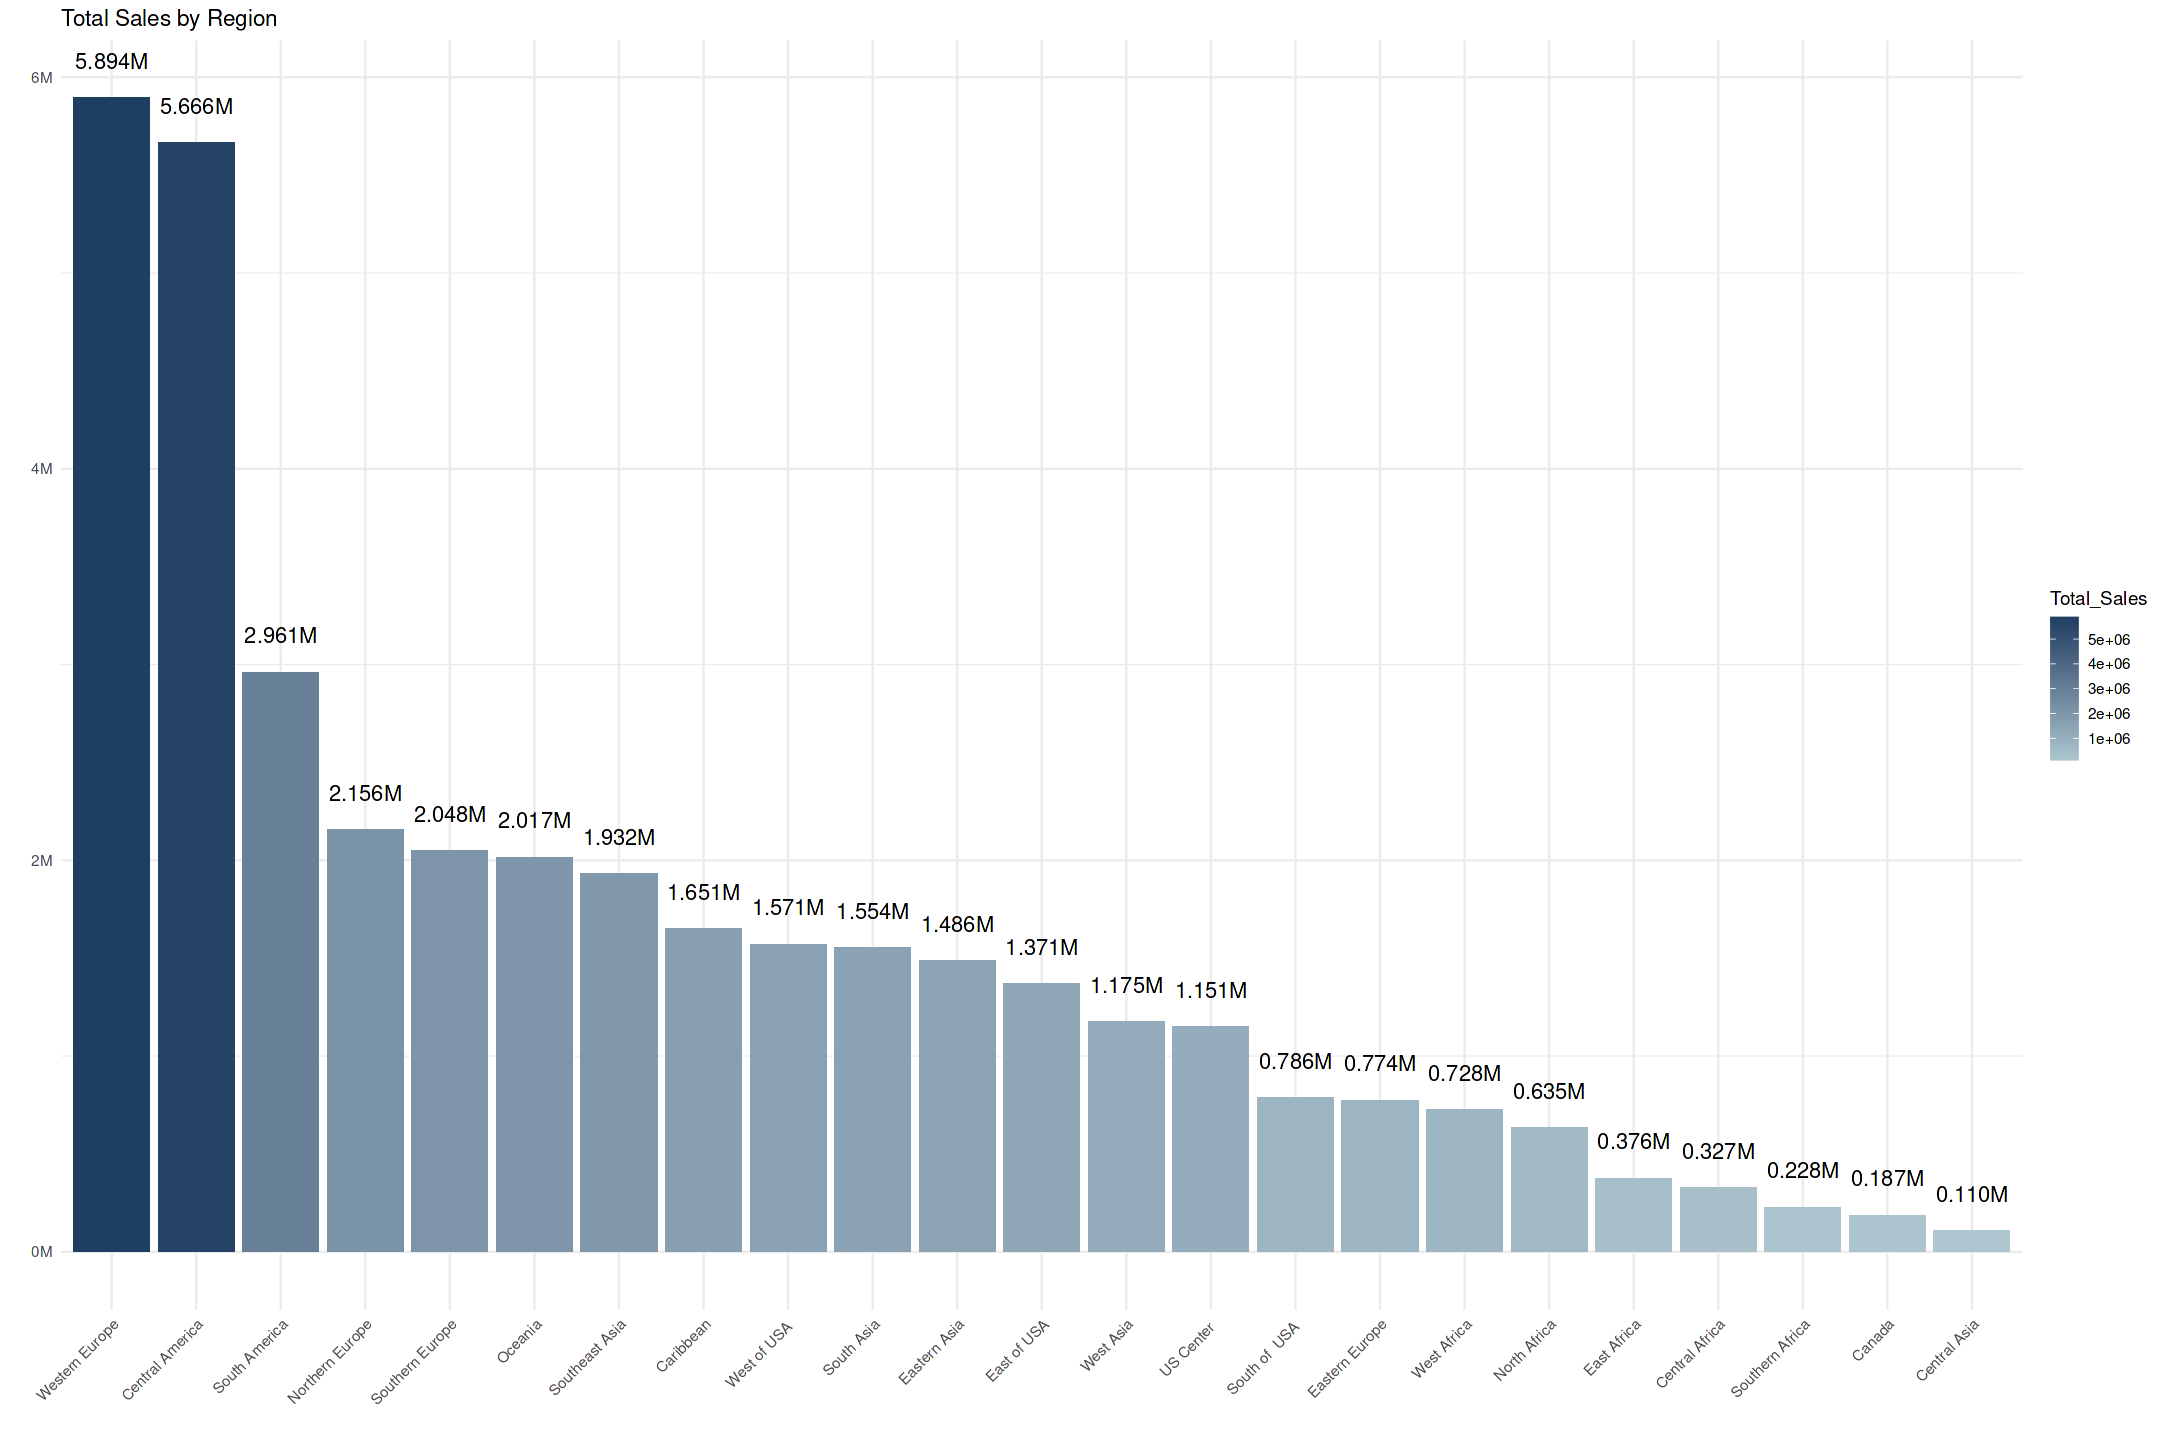

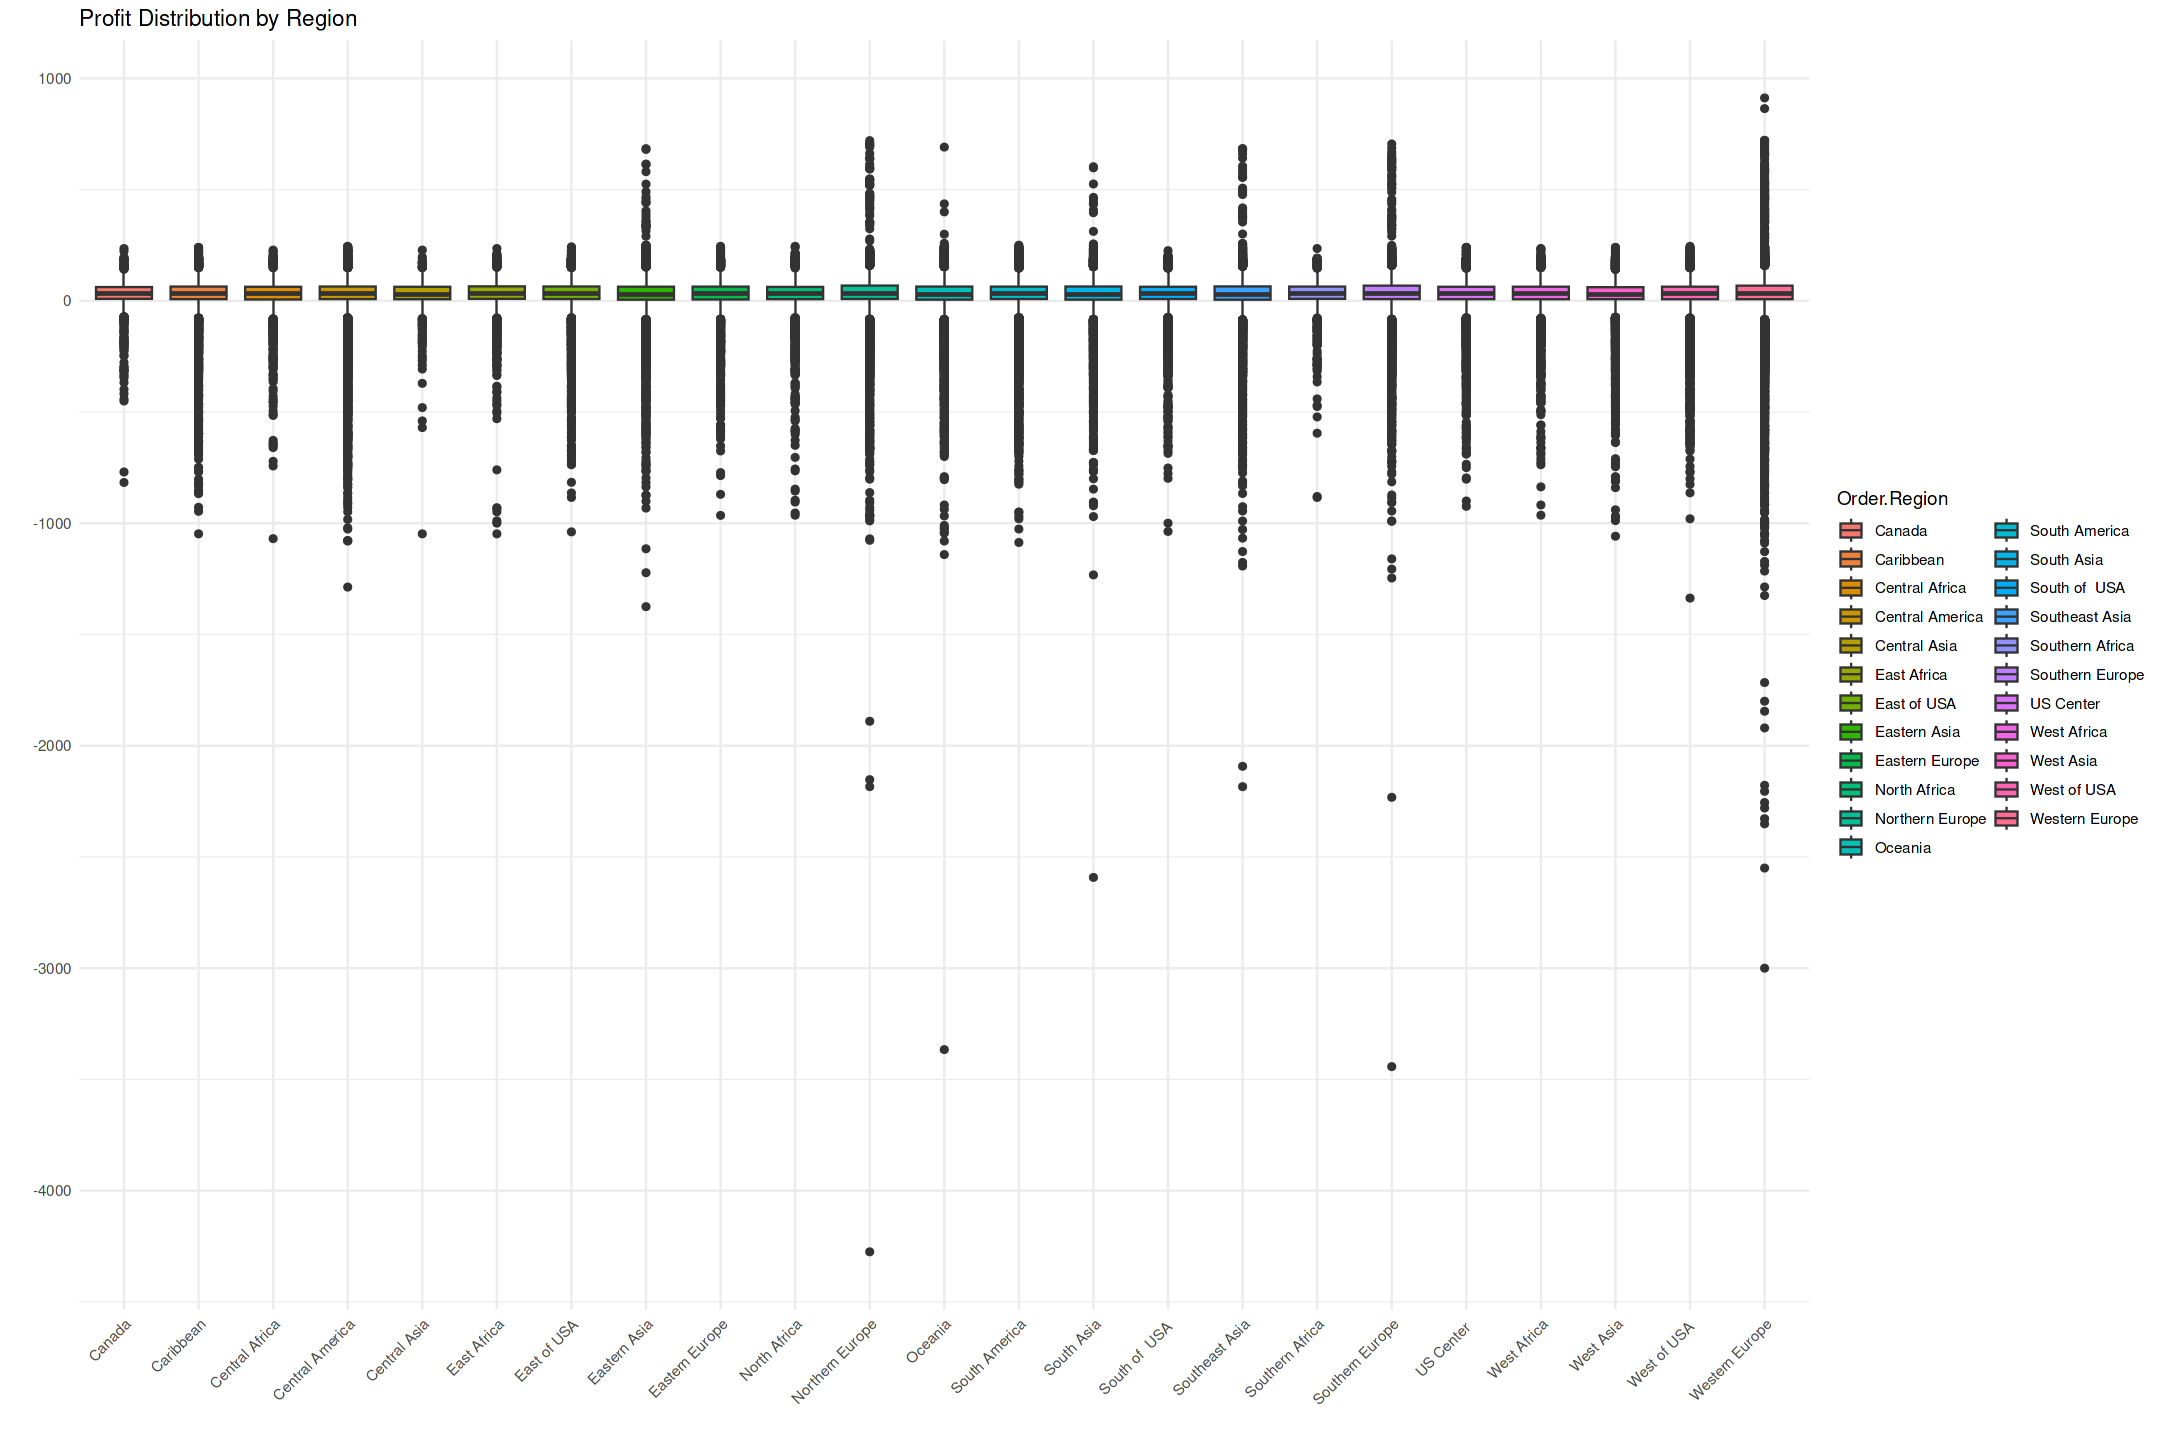

In [176]:
ggplot(region_summary, aes(x = reorder(Order.Region, -Total_Sales), y = Total_Sales, fill = Total_Sales)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = label_number(scale = 1e-6, suffix = "M")(Total_Sales)), hjust = 0.5, vjust = -1.8, size = 4.5, color = "black") + 
  scale_fill_gradient(low = "#AEC6CF", high = base_color) +
  scale_y_continuous(labels = label_number(scale = 1e-6, suffix = "M")) +
  theme_minimal() +
  labs(title = "Total Sales by Region", x = "", y = "") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


# Boxplot for Profit Distribution by Region
ggplot(df, aes(x = Order.Region, y = Order.Profit.Per.Order, fill = Order.Region)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Profit Distribution by Region", x = "", y = "") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

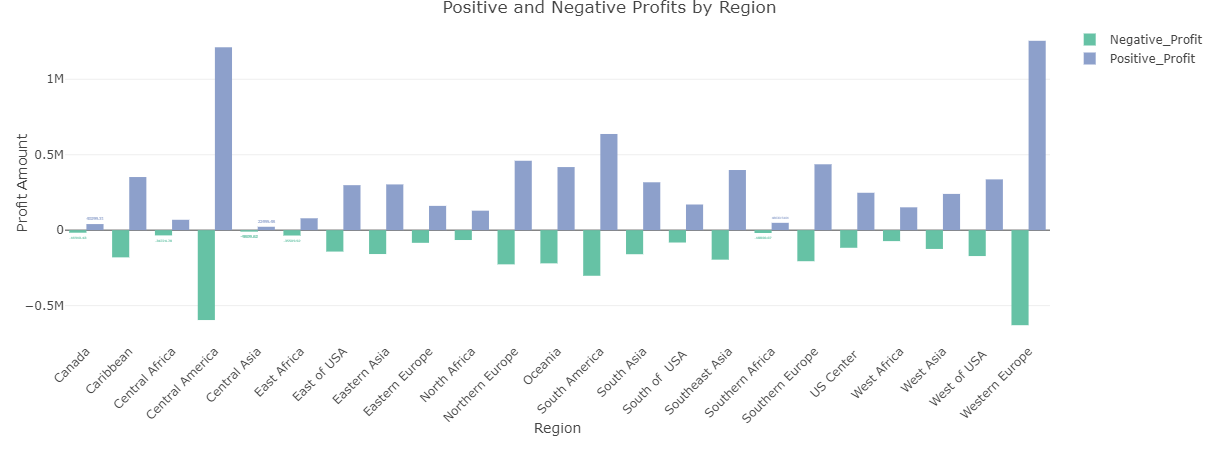

In [185]:
# Grouping the data by region and calculating positive and negative profits
profit_summary <- df %>%
  group_by(Order.Region) %>%
  summarise(
    Positive_Profit = sum(Order.Profit.Per.Order[Order.Profit.Per.Order > 0], na.rm = TRUE),
    Negative_Profit = sum(Order.Profit.Per.Order[Order.Profit.Per.Order < 0], na.rm = TRUE)
  )

# Reshaping the data for plotting
profit_long <- profit_summary %>%
  pivot_longer(cols = c(Positive_Profit, Negative_Profit), names_to = "Profit_Type", values_to = "Amount")

# Creating the interactive bar plot
fig <- plot_ly(profit_long, x = ~Order.Region, y = ~Amount, color = ~Profit_Type, type = 'bar', 
               text = ~Amount, textposition = 'auto') %>%
  layout(title = 'Positive and Negative Profits by Region',
         xaxis = list(title = 'Region', tickangle = -45),
         yaxis = list(title = 'Profit Amount'))

fig

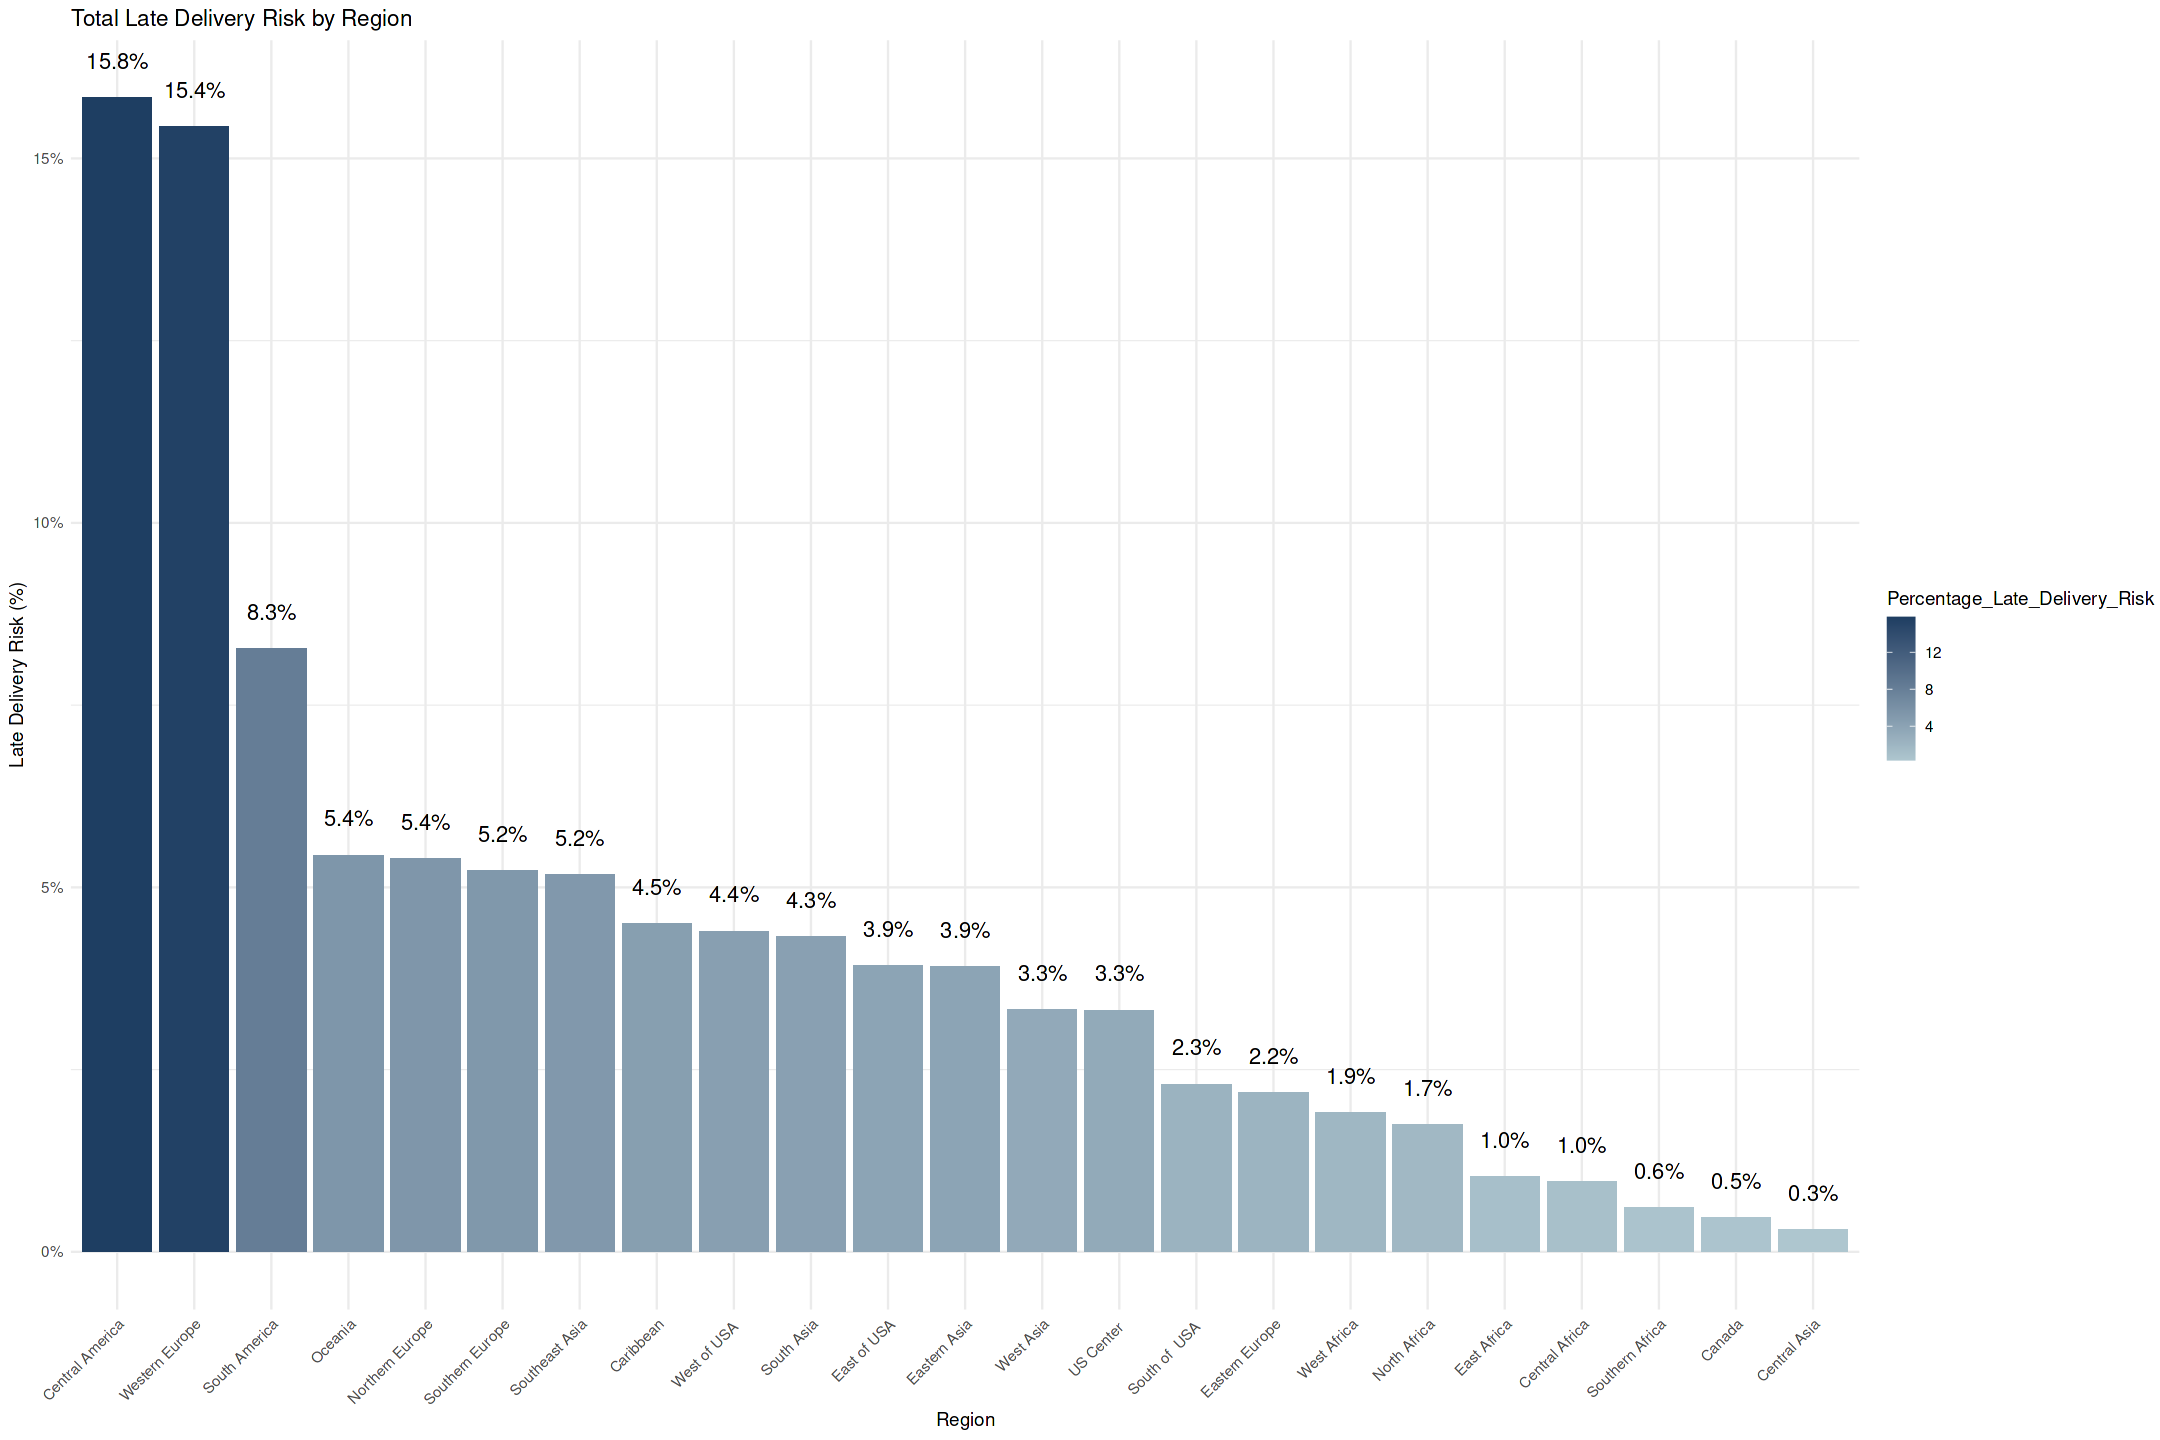

In [202]:
# Calculate the total late delivery risk
total_risk <- sum(region_summary$Total_Late_Delivery_Risk)

# Calculate percentage for each region correctly
region_summary <- region_summary %>%
  mutate(Percentage_Late_Delivery_Risk = (Total_Late_Delivery_Risk / total_risk) * 100)


ggplot(region_summary, aes(x = reorder(Order.Region, -Percentage_Late_Delivery_Risk), 
                            y = Percentage_Late_Delivery_Risk, 
                            fill = Percentage_Late_Delivery_Risk)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = label_percent(accuracy = 0.1)(Percentage_Late_Delivery_Risk / 100)), 
            hjust = 0.5, vjust = -1.8, size = 4.5, color = "black") + 
  scale_fill_gradient(low = "#AEC6CF", high = base_color) +
  scale_y_continuous(labels = label_percent(scale = 1)) +
  theme_minimal() +
  labs(title = "Total Late Delivery Risk by Region", 
       x = "Region", 
       y = "Late Delivery Risk (%)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# **Additional Analysis**

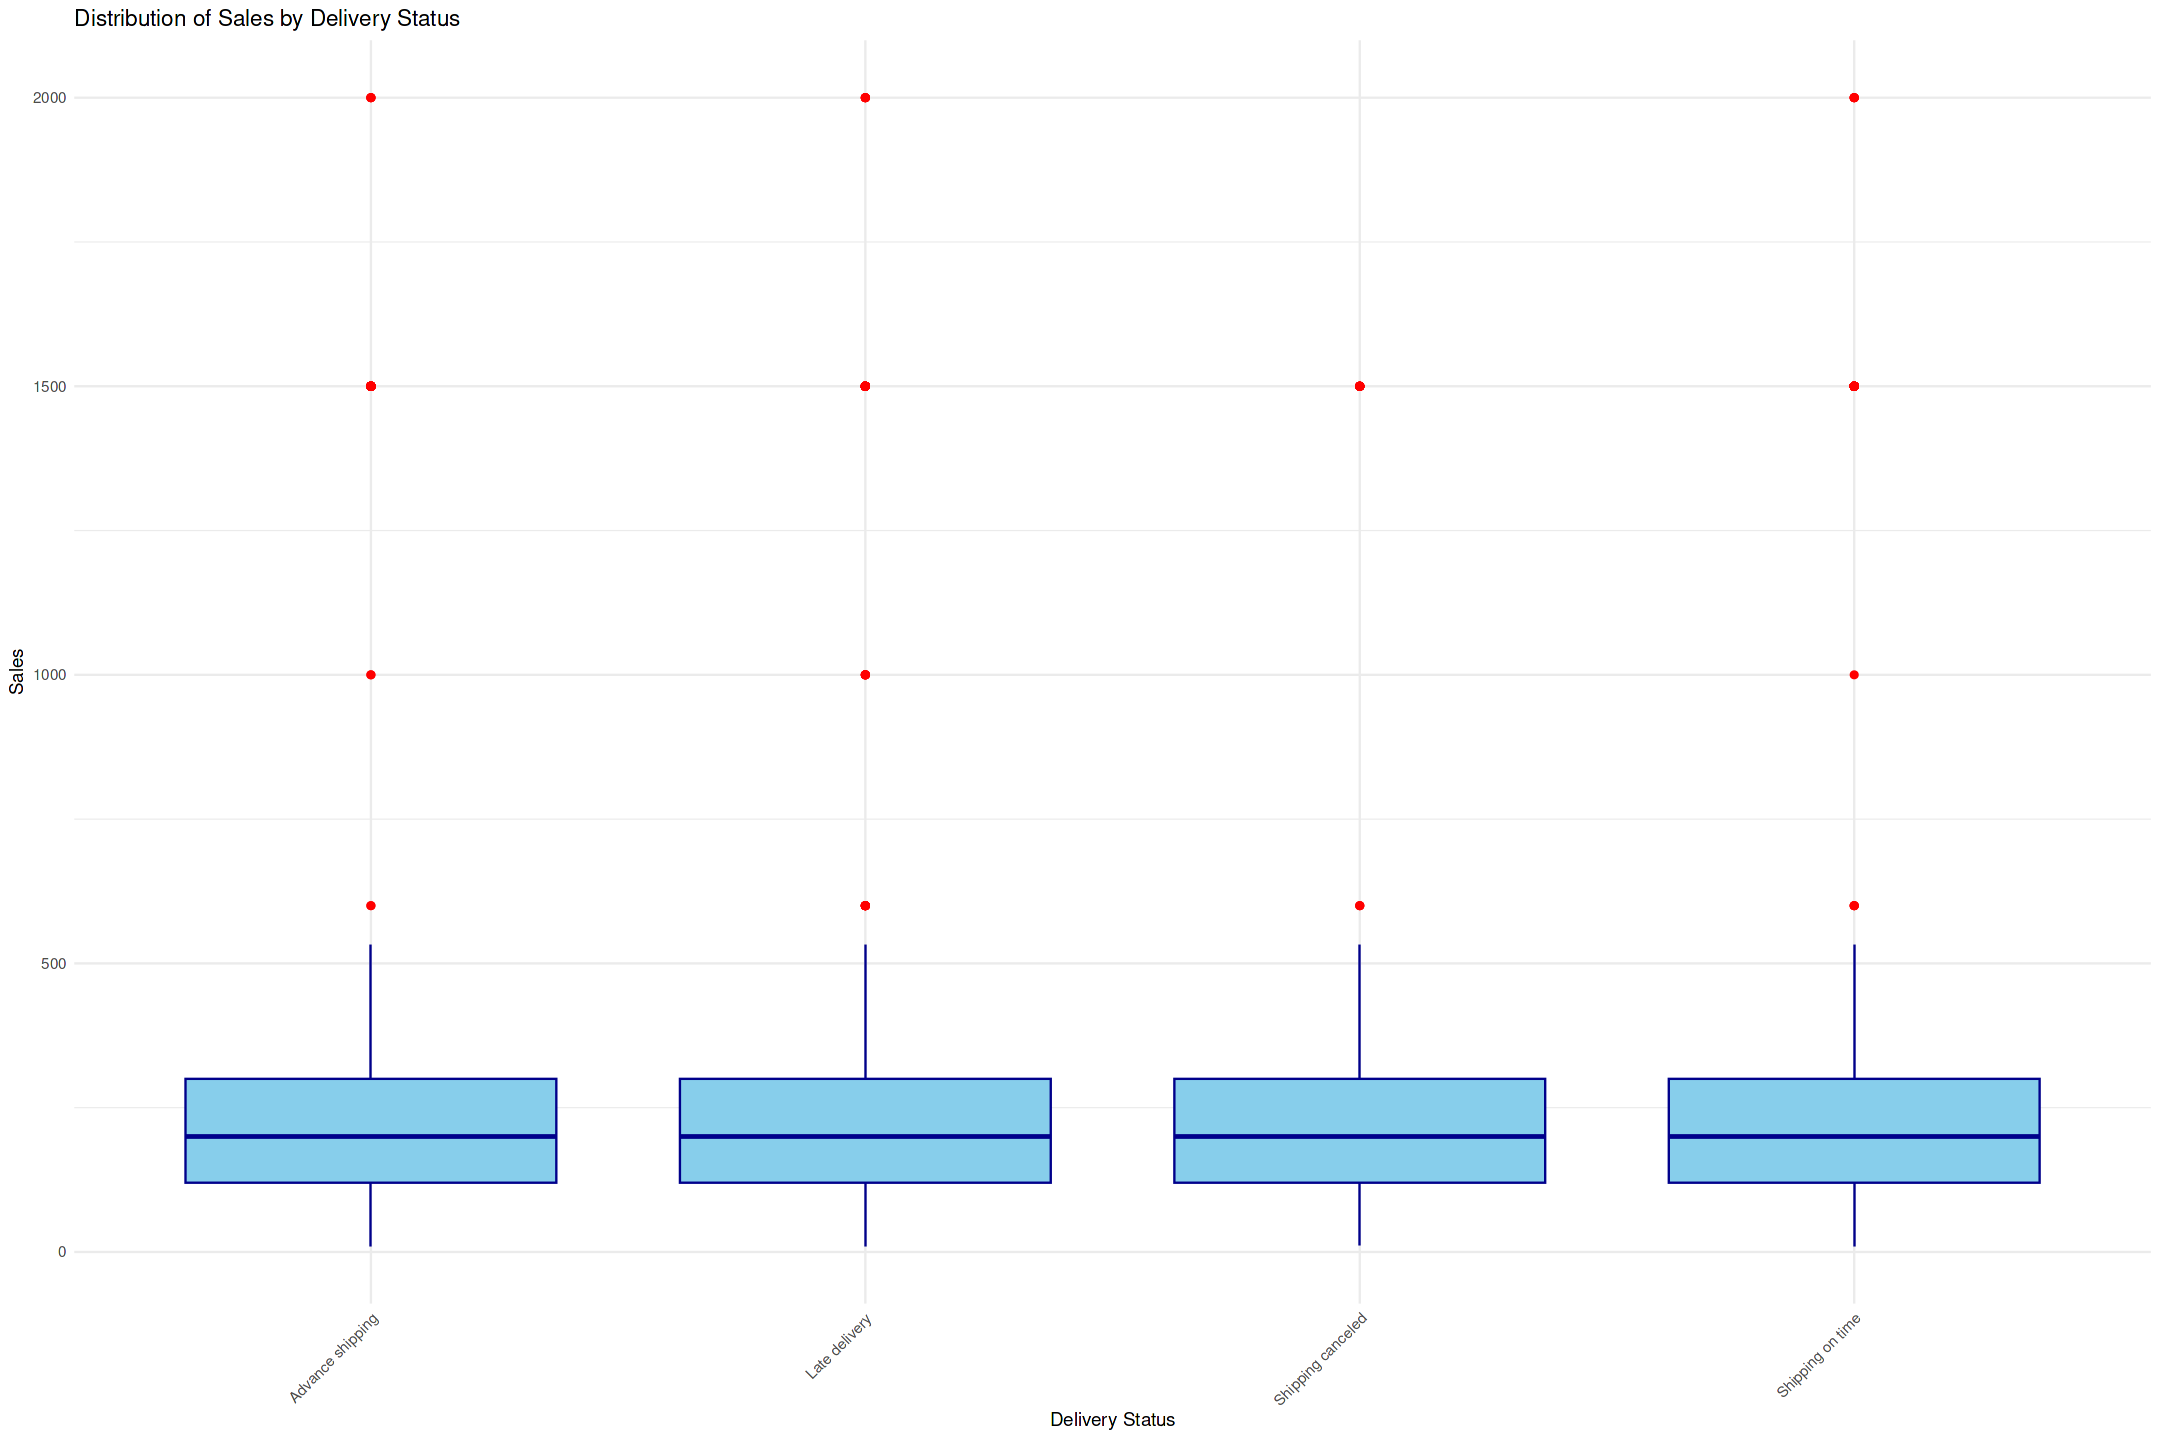

In [210]:
ggplot(df, aes(x = Delivery.Status, y = Sales)) +
  geom_boxplot(fill = "skyblue", color = "darkblue", outlier.colour = "red") +
  labs(title = "Distribution of Sales by Delivery Status",
       x = "Delivery Status",
       y = "Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

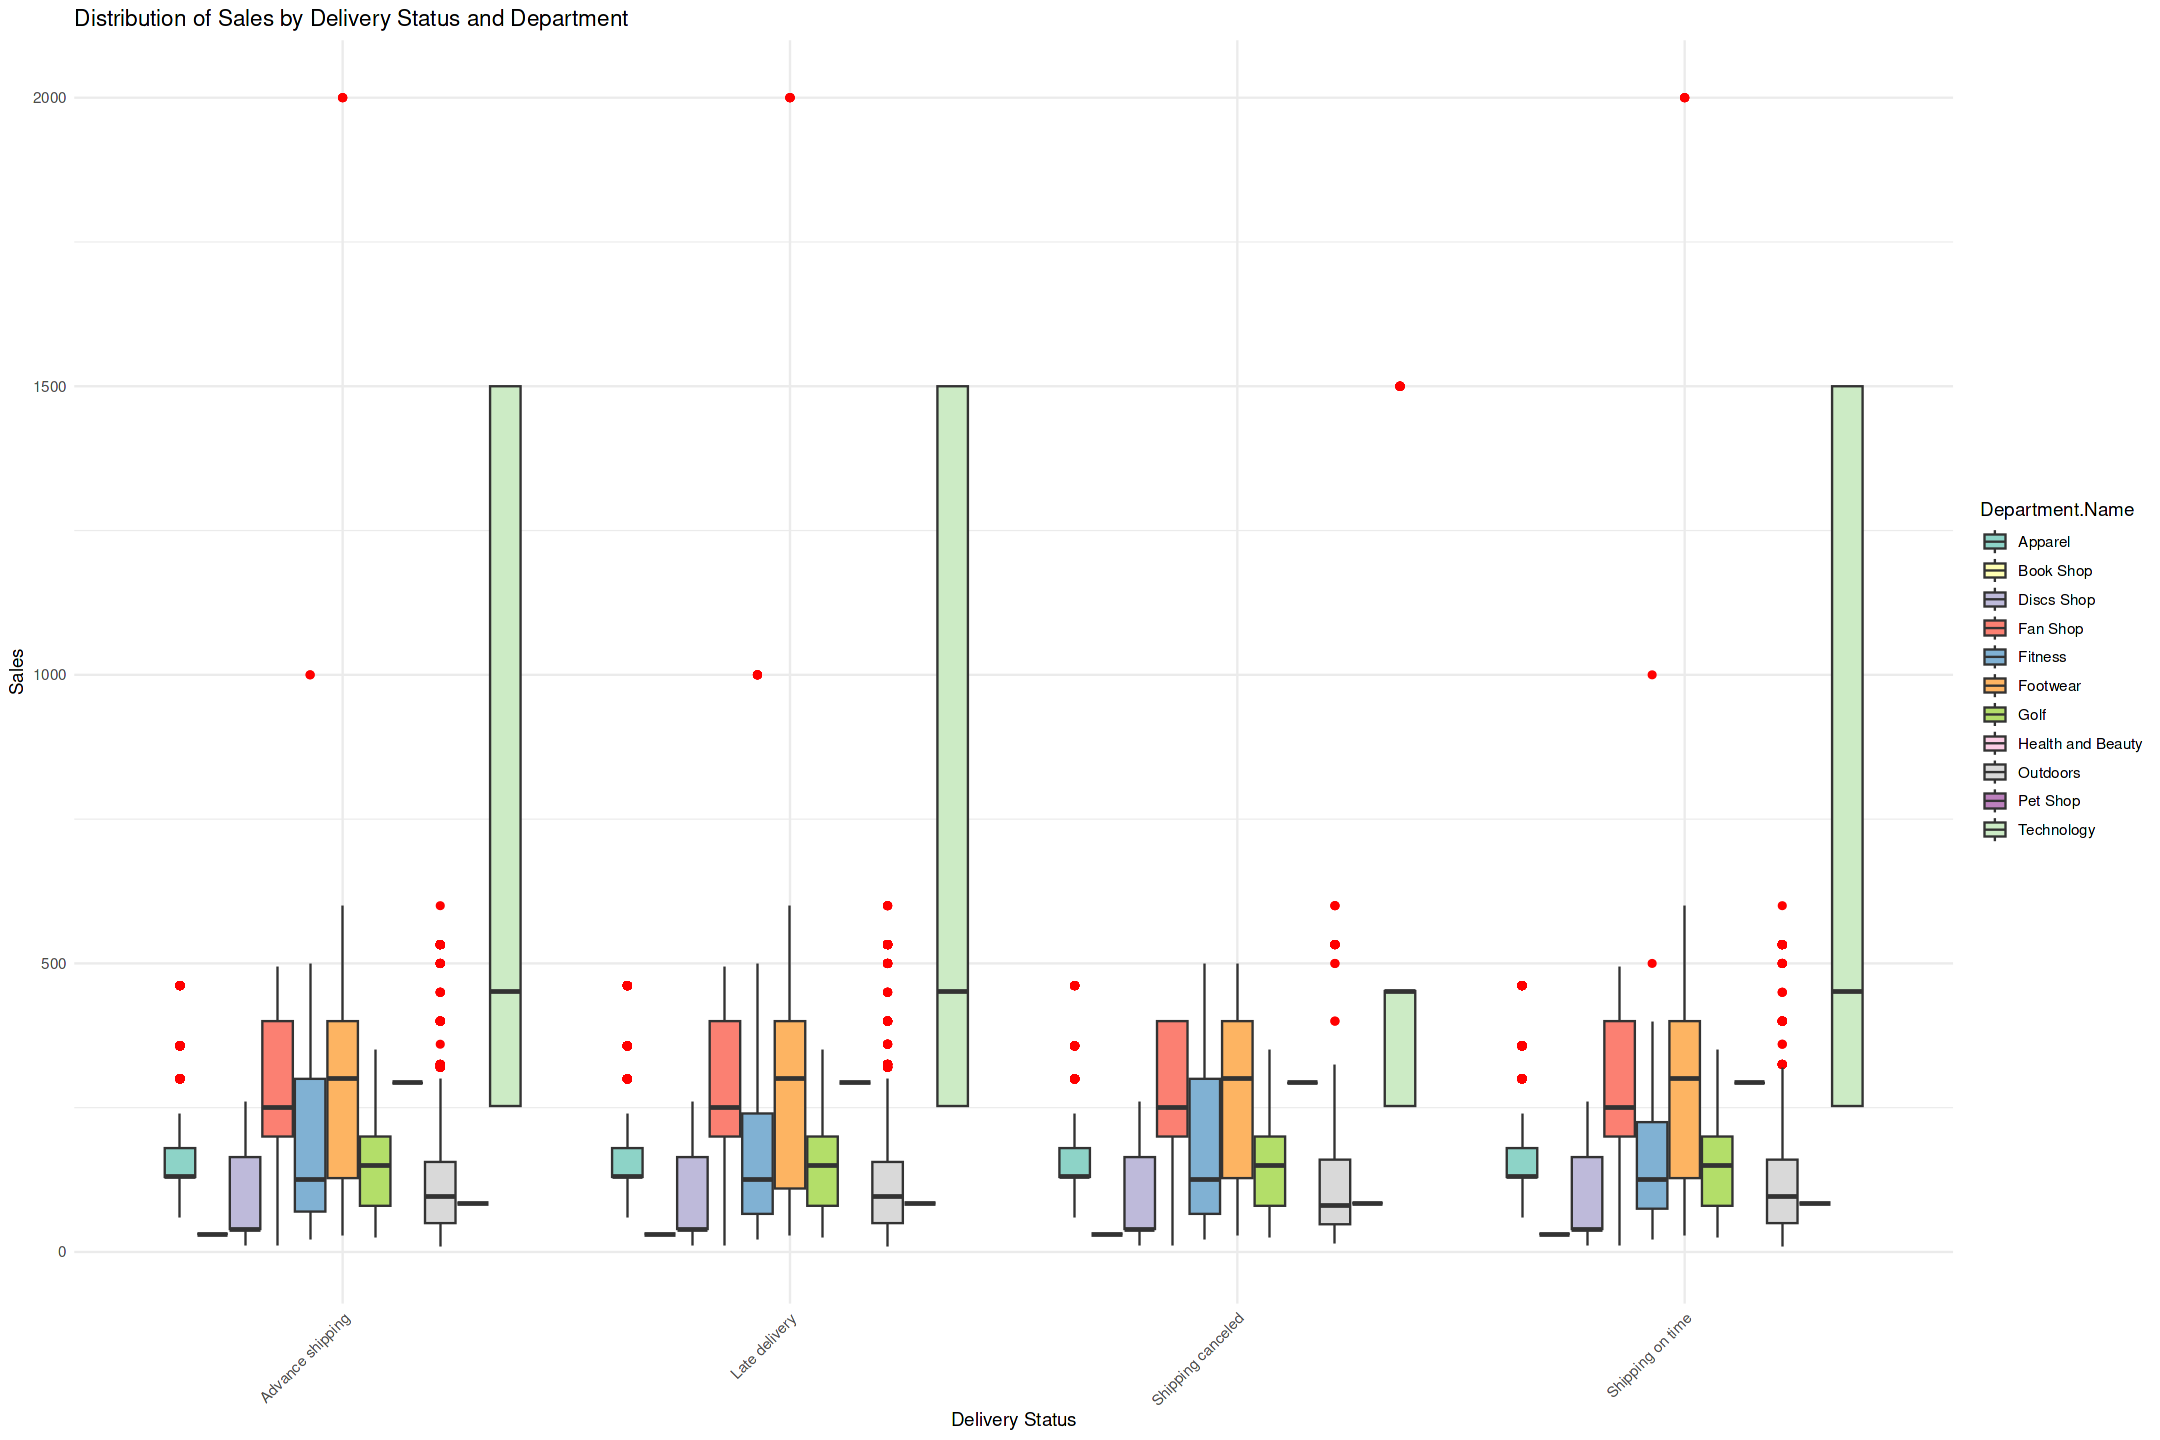

In [212]:
ggplot(df, aes(x = Delivery.Status, y = Sales, fill = Department.Name)) +
  geom_boxplot(outlier.colour = "red", position = position_dodge(0.8)) +
  labs(title = "Distribution of Sales by Delivery Status and Department",
       x = "Delivery Status",
       y = "Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set3")

# **Thanks for your Time! <br><br> I hope you enjoyed the notebook**